In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

In [2]:
# 1. 데이터 로드
identities = pd.read_csv('./csv/Identities.csv')
level_stats = pd.read_csv('./csv/Levelstats.csv')
uptie_stats = pd.read_csv('./csv/Uptiestats.csv')
identities_skills = pd.read_csv('./csv/IdentitiesSkills.csv')
uptie_stats[['MinSpeed','MaxSpeed']] = uptie_stats['Speed'].str.split('-', expand=True).astype(int)
uptie_stats = uptie_stats.drop(columns=['Speed'])

In [16]:
identities_df = identities
level_stats_df = level_stats
uptie_stats_df = uptie_stats
identities_skills_df = identities_skills

In [4]:
open_date = datetime.strptime("2023-02-27", "%Y-%m-%d")
identities_df['Release_Date'] = pd.to_datetime(identities_df['Release_Date'], format='%Y-%m-%d')
identities_df["Open_Day_After_Release_Date"] = (identities_df["Release_Date"] - open_date).dt.days
#identities_df['Release_Year'] = identities_df['Release_Date'].dt.year
#identities_df['Release_Month'] = identities_df['Release_Date'].dt.month
#identities_df['Release_Day'] = identities_df['Release_Date'].dt.day

In [5]:
identities_df = identities_df.drop(columns=['Defense_Type','Defense_Sin_Affinity'])

In [6]:
merged_data_df = (
    identities_df
    .merge(uptie_stats_df, left_on='ID', right_on='Identity_ID', how='left')
)
merged_data_df = merged_data_df.drop(columns=['Release_Date'])

In [7]:
# Identity_ID를 첫 번째 열로 이동
cols = ['Identity_ID'] + [col for col in merged_data_df.columns if col != 'Identity_ID']
reordered_df = merged_data_df[cols]
reordered_df = reordered_df.drop(columns=['ID'])

In [81]:
reordered_df

Identity_ID                                    Name  Rarity Skill_1_Type  \
0          10101                    [LCB Sinner] Yi Sang       1        SLASH   
1          10101                    [LCB Sinner] Yi Sang       1        SLASH   
2          10101                    [LCB Sinner] Yi Sang       1        SLASH   
3          10101                    [LCB Sinner] Yi Sang       1        SLASH   
4          10102  [Seven Assoc. South Section 6] Yi Sang       2    PENETRATE   
..           ...                                     ...     ...          ...   
499        11209              [Edgar Family Heir] Gregor       3        SLASH   
500        11210    [The Priest of La Manchaland] Gregor       3          HIT   
501        11210    [The Priest of La Manchaland] Gregor       3          HIT   
502        11210    [The Priest of La Manchaland] Gregor       3          HIT   
503        11210    [The Priest of La Manchaland] Gregor       3          HIT   

    Skill_1_Sin_Affinity Skill_2_Type Skill_2_Sin_Affinity Skill_3_Type  \
0                  Gloom    PENETRATE                 Envy        SLASH   
1                  Gloom    PENETRATE                 Envy        SLASH   
2                  Gloom    PENETRATE                 Envy        SLASH   
3                  Gloom    PENETRATE                 Envy        SLASH   
4                  Gloom    PENETRATE             Gluttony          HIT   
..                   ...          ...                  ...          ...   
499                 Envy        SLASH                Gloom        SLASH   
500             Gluttony          HIT                Pride          HIT   
501             Gluttony          HIT                Pride          HIT   
502             Gluttony          HIT                Pride          HIT   
503             Gluttony          HIT                Pride          HIT   

    Skill_3_Sin_Affinity  Open_Day_After_Release_Date  Uptie  MinSpeed  \
0                  Sloth                            0      1         4   
1                  Sloth                            0      2         4   
2                  Sloth                            0      3         4   
3                  Sloth                            0      4         4   
4                  Sloth                            0      1         5   
..                   ...                          ...    ...       ...   
499                 Lust                          402      4         3   
500                 Lust                          612      1         3   
501                 Lust                          612      2         3   
502                 Lust                          612      3         4   
503                 Lust                          612      4         4   

     MaxSpeed Character_Name  
0           6        Yi Sang  
1           7        Yi Sang  
2           8        Yi Sang  
3           8        Yi Sang  
4           6        Yi Sang  
..        ...            ...  
499         8         Gregor  
500         5         Gregor  
501         5         Gregor  
502         6         Gregor  
503         6         Gregor  

[504 rows x 14 columns]

In [9]:
import re

# 'Name' 컬럼에서 ']' 뒤에 있는 첫 번째 단어 추출 (공백을 무시하고 단어 추출)
reordered_df['Character_Name'] = reordered_df['Name'].apply(
    lambda x: re.search(r'\](.*)', x).group(1) if re.search(r'\](.*)', x) else None
)

In [23]:
level_stats_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6300 entries, 0 to 6299
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Identity_ID   6300 non-null   int64 
 1   Level         6300 non-null   int64 
 2   HP            6300 non-null   int64 
 3   Defense       6300 non-null   int64 
 4   Skill_Levels  6300 non-null   object
dtypes: int64(4), object(1)
memory usage: 246.2+ KB


In [17]:
df = pd.DataFrame(level_stats_df)

In [63]:
# 스킬 코드 중복 여부를 추적하기 위한 딕셔너리 생성
skill_code_seen_per_identity = {}

# Skill_Code 값을 업데이트할 새로운 리스트 생성
updated_rows = []

# 기존 데이터프레임 순회
for _, row in level_stats_expanded_df.iterrows():
    identity_id = row['Identity_ID']
    skill_code = row['Skill_Code']
    
    # Identity_ID별로 스킬 코드 추적용 딕셔너리 초기화
    if identity_id not in skill_code_seen_per_identity:
        skill_code_seen_per_identity[identity_id] = set()  # 스킬 코드 추적
    
    # 첫 등장 스킬 코드 처리
    if skill_code not in skill_code_seen_per_identity[identity_id]:
        skill_code_seen_per_identity[identity_id].add(skill_code)
        updated_rows.append(row.to_dict())
    else:
        # 동일한 Identity_ID 내에서 스킬 코드 중복 시 'Awaked {Skill_Code}'로 변경
        updated_row = row.copy()
        updated_row['Skill_Code'] = f"Awaked {skill_code}"
        updated_rows.append(updated_row.to_dict())

# 업데이트된 데이터프레임 생성
updated_level_stats_df = pd.DataFrame(updated_rows)

# 결과 출력
print(updated_level_stats_df)

       Identity_ID  Level   HP  Defense      Skill_Code  Skill_Level
0            10101      1   74        1         SKILL 1            1
1            10101      1   74        1         SKILL 2            1
2            10101      1   74        1         SKILL 3            1
3            10101      1   74        1         DEFENSE            1
4            10101      2   77        1  Awaked SKILL 1            2
...            ...    ...  ...      ...             ...          ...
26195        11210     49  275       54  Awaked DEFENSE           54
26196        11210     50  279       55  Awaked SKILL 1           51
26197        11210     50  279       55  Awaked SKILL 2           51
26198        11210     50  279       55  Awaked SKILL 3           53
26199        11210     50  279       55  Awaked DEFENSE           55

[26200 rows x 6 columns]


In [68]:
# 스킬 코드 중복 여부를 추적하기 위한 딕셔너리 생성
skill_code_seen_per_level_and_identity = {}

# Skill_Code 값을 업데이트할 새로운 리스트 생성
updated_rows = []

# 기존 데이터프레임 순회
for _, row in level_stats_expanded_df.iterrows():
    identity_id = row['Identity_ID']
    level = row['Level']
    skill_code = row['Skill_Code']
    
    # Level과 Identity_ID를 기준으로 키 생성
    key = (identity_id, level)
    
    # Level과 Identity_ID별로 스킬 코드 추적용 딕셔너리 초기화
    if key not in skill_code_seen_per_level_and_identity:
        skill_code_seen_per_level_and_identity[key] = set()  # 스킬 코드 추적
    
    # 첫 등장 스킬 코드 처리
    if skill_code not in skill_code_seen_per_level_and_identity[key]:
        skill_code_seen_per_level_and_identity[key].add(skill_code)
        updated_rows.append(row.to_dict())
    else:
        # 동일한 Level과 Identity_ID 내에서 스킬 코드 중복 시 'Awaked {Skill_Code}'로 변경
        updated_row = row.copy()
        updated_row['Skill_Code'] = f"AWAKED {skill_code}"
        updated_rows.append(updated_row.to_dict())

# 업데이트된 데이터프레임 생성
updated_level_stats_df = pd.DataFrame(updated_rows)

# 결과 출력
print(updated_level_stats_df)

       Identity_ID  Level   HP  Defense Skill_Code  Skill_Level
0            10101      1   74        1    SKILL 1            1
1            10101      1   74        1    SKILL 2            1
2            10101      1   74        1    SKILL 3            1
3            10101      1   74        1    DEFENSE            1
4            10101      2   77        1    SKILL 1            2
...            ...    ...  ...      ...        ...          ...
26195        11210     49  275       54    DEFENSE           54
26196        11210     50  279       55    SKILL 1           51
26197        11210     50  279       55    SKILL 2           51
26198        11210     50  279       55    SKILL 3           53
26199        11210     50  279       55    DEFENSE           55

[26200 rows x 6 columns]


In [21]:
merged_data_df = (
    uptie_stats_df
    .merge(level_stats_expanded_df, left_on='Identity_ID', right_on='Identity_ID', how='left')
)
merged_data_df

Identity_ID  Uptie  MinSpeed  MaxSpeed  Level   HP  Defense  \
0             10101      1         4         6      1   74        1   
1             10101      1         4         6      1   74        1   
2             10101      1         4         6      1   74        1   
3             10101      1         4         6      1   74        1   
4             10101      1         4         6      2   77        1   
...             ...    ...       ...       ...    ...  ...      ...   
104795        11210      4         4         6     49  275       54   
104796        11210      4         4         6     50  279       55   
104797        11210      4         4         6     50  279       55   
104798        11210      4         4         6     50  279       55   
104799        11210      4         4         6     50  279       55   

       Skill_Code  Skill_Level  
0         SKILL 1            1  
1         SKILL 2            1  
2         SKILL 3            1  
3         DEFENSE            1  
4         SKILL 1            2  
...           ...          ...  
104795    DEFENSE           54  
104796    SKILL 1           51  
104797    SKILL 2           51  
104798    SKILL 3           53  
104799    DEFENSE           55  

[104800 rows x 9 columns]

In [70]:
identities_skills_df['Skill_Code'] = identities_skills_df['Skill_Code'].str.upper()

In [74]:
identities_skills_df = identities_skills_df.drop(columns=['Max_Level', 'processed'])

In [77]:
identities_skills_df_no_effect = identities_skills_df.drop(columns=['Effect_Data'])

In [79]:
df = pd.DataFrame(identities_skills_df)

# 스킬 코드 중복 여부를 추적하기 위한 딕셔너리 생성
skill_code_seen_per_identity_and_uptie = {}

# Skill_Code 값을 업데이트할 새로운 리스트 생성
updated_rows = []

# 기존 데이터프레임 순회
for _, row in df.iterrows():
    identity_id = row['Identity_ID']
    skill_code = row['Skill_Code']
    uptie_level = row['Uptie_Level']
    
    # Identity_ID와 Uptie_Level을 기준으로 키 생성
    key = (identity_id, skill_code)
    
    # Identity_ID와 Skill_Code별로 Uptie_Level 추적용 딕셔너리 초기화
    if key not in skill_code_seen_per_identity_and_uptie:
        skill_code_seen_per_identity_and_uptie[key] = set()
    
    # 첫 등장 Uptie_Level 또는 새로운 Uptie_Level 처리
    if uptie_level not in skill_code_seen_per_identity_and_uptie[key]:
        skill_code_seen_per_identity_and_uptie[key].add(uptie_level)
        updated_rows.append(row.to_dict())
    else:
        # 동일한 Identity_ID와 Skill_Code에서 Uptie_Level 반복 시 'Awaked {Skill_Code}'로 변경
        updated_row = row.copy()
        updated_row['Skill_Code'] = f"AWAKED {skill_code}"
        updated_rows.append(updated_row.to_dict())

# 업데이트된 데이터프레임 생성
identities_skills_updated_df = pd.DataFrame(updated_rows)

# 결과 출력
print(identities_skills_updated_df)

      Identity_ID Skill_Code Skill_Type Sin_Affinity            Skill_Name  \
0           10101    SKILL 1      SLASH        Gloom               Deflect   
1           10101    SKILL 1      SLASH        Gloom               Deflect   
2           10101    SKILL 1      SLASH        Gloom               Deflect   
3           10101    SKILL 1      SLASH        Gloom               Deflect   
4           10101    SKILL 2  PENETRATE         Envy         End-stop Stab   
...           ...        ...        ...          ...                   ...   
1825        11210    SKILL 3        HIT         Lust  The Unforgivable Sin   
1826        11210    DEFENSE      GUARD         Lust        Faded Patience   
1827        11210    DEFENSE      GUARD         Lust        Faded Patience   
1828        11210    DEFENSE      GUARD         Lust        Faded Patience   
1829        11210    DEFENSE      GUARD         Lust        Faded Patience   

      Coin_Count Init_Remain  Atk_Weight  Uptie_Level  Skill_Po

In [42]:
results = []
for level in updated_level_stats_df['Level'].unique():
    #print(level)
    updated_level_stats_df['processed']=False
    level_data = updated_level_stats_df[updated_level_stats_df['Level'] == level]
    #print(level_data)
    for _, row in level_data.iterrows():
        identity_id = row['Identity_ID']
        skill_code = row['Skill_Code']
        skill_level = row['Skill_Level']
        skill_data = updated_identities_skills_df[
            (updated_identities_skills_df['Identity_ID'] == identity_id) &
            (updated_identities_skills_df['Skill_Code'] == skill_code) &
            (~updated_identities_skills_df['processed'])
        ]
        if not skill_data.empty:
            skill_row = skill_data.iloc[0]

            result = {
                'Identity_ID': identity_id,
                'Level': level,
                'Skill_Code': skill_code,
                'Uptie_Level': skill_row['Uptie_Level'],
                'Skill_Level': skill_level,
                'Skill_Power': skill_row['Skill_Power'],
                'Coin_Power': skill_row['Coin_Power'],
            }
            results.append(result)
            skills_df.loc[skill_row.name, 'processed'] = True

processed_df = pd.DataFrame(results)

In [43]:
import pandas as pd

# Uptie_Level 시작 조건에 따라 처리
processed_data = []

for _, skill_row in updated_level_stats_df.iterrows():
    identity_id = skill_row["Identity_ID"]
    level = skill_row["Level"]
    skill_code = skill_row["Skill_Code"]
    skill_level = skill_row["Skill_Level"]
    
    # skills_df에서 해당 Identity_ID와 Skill_Code의 최소 Uptie_Level을 가져옴
    skill_filter = (updated_identities_skills_df["Identity_ID"] == identity_id) & (updated_identities_skills_df["Skill_Code"] == skill_code)
    skill_subset = updated_identities_skills_df[skill_filter]
    
    if skill_subset.empty:
        continue  # 해당 스킬이 없으면 건너뜀
    
    min_uptie_level = skill_subset["Uptie_Level"].min()  # 최소 Uptie_Level 확인
    
    for uptie_level in range(min_uptie_level, 5):  # 최소 Uptie_Level부터 4까지 처리
        filtered_skill = skill_subset[skill_subset["Uptie_Level"] == uptie_level]
        if not filtered_skill.empty:
            sin_affinity = filtered_skill["Sin_Affinity"].values[0]
            skill_type = filtered_skill["Skill_Type"].values[0]
            coin_count = filtered_skill["Coin_Count"].values[0]
            skill_power = filtered_skill["Skill_Power"].values[0]
            atk_weight = filtered_skill["Atk_Weight"].values[0]
            coin_power = filtered_skill["Coin_Power"].values[0]
            
            processed_data.append({
                "Identity_ID": identity_id,
                "Level": level,
                "Sin_Affinity": sin_affinity,
                "Skill_Type": skill_type,
                "Skill_Code": skill_code,
                "Skill_Level": skill_level,
                "Uptie_Level": uptie_level,
                "Skill_Power": skill_power,
                "Atk_Weight": atk_weight,
                "Coin_Count": coin_count,
                "Coin_Power": coin_power,
            })

# 결과를 DataFrame으로 변환
processed_df = pd.DataFrame(processed_data)

# CSV 파일로 저장
output_file_path = "./csv/processed_skills.csv"
processed_df.to_csv(output_file_path, index=False, encoding="utf-8-sig")
print(f"파일이 저장되었습니다: {output_file_path}")

파일이 저장되었습니다: ./csv/processed_skills.csv


In [80]:
# CSV 파일로 저장
output_file_path = "./csv/identities_skills_updated_df.csv"
identities_skills_updated_df.to_csv(output_file_path, index=False, encoding="utf-8-sig")

print(f"파일이 저장되었습니다: {output_file_path}")

파일이 저장되었습니다: ./csv/identities_skills_updated_df.csv


In [69]:
# CSV 파일로 저장
output_file_path = "./csv/level_stats_expanded.csv"
updated_level_stats_df.to_csv(output_file_path, index=False, encoding="utf-8-sig")

print(f"파일이 저장되었습니다: {output_file_path}")

파일이 저장되었습니다: ./csv/level_stats_expanded.csv


In [88]:
reordered_df = reordered_df.drop(columns=['Skill_1_Type','Skill_1_Sin_Affinity','Skill_2_Type','Skill_2_Sin_Affinity','Skill_3_Type','Skill_3_Sin_Affinity'])
reordered_df = reordered_df.drop(columns=['Defense_Type','Defense_Sin_Affinity'])

Identity_ID                                    Name  Rarity  \
0          10101                    [LCB Sinner] Yi Sang       1   
1          10101                    [LCB Sinner] Yi Sang       1   
2          10101                    [LCB Sinner] Yi Sang       1   
3          10101                    [LCB Sinner] Yi Sang       1   
4          10102  [Seven Assoc. South Section 6] Yi Sang       2   
..           ...                                     ...     ...   
499        11209              [Edgar Family Heir] Gregor       3   
500        11210    [The Priest of La Manchaland] Gregor       3   
501        11210    [The Priest of La Manchaland] Gregor       3   
502        11210    [The Priest of La Manchaland] Gregor       3   
503        11210    [The Priest of La Manchaland] Gregor       3   

     Open_Day_After_Release_Date  Uptie  MinSpeed  MaxSpeed Character_Name  
0                              0      1         4         6        Yi Sang  
1                              0      2         4         7        Yi Sang  
2                              0      3         4         8        Yi Sang  
3                              0      4         4         8        Yi Sang  
4                              0      1         5         6        Yi Sang  
..                           ...    ...       ...       ...            ...  
499                          402      4         3         8         Gregor  
500                          612      1         3         5         Gregor  
501                          612      2         3         5         Gregor  
502                          612      3         4         6         Gregor  
503                          612      4         4         6         Gregor  

[504 rows x 8 columns]

In [83]:
# CSV 파일로 저장
output_file_path = "./csv/merged_data.csv"
merged_data_df.to_csv(output_file_path, index=False, encoding="utf-8-sig")

print(f"파일이 저장되었습니다: {output_file_path}")

파일이 저장되었습니다: ./csv/merged_data.csv


In [85]:
merged_data_df = merged_data_df.drop(columns=['Effect_Data'])

In [86]:
# CSV 파일로 저장
output_file_path = "./csv/merged_data.csv"
merged_data_df.to_csv(output_file_path, index=False, encoding="utf-8-sig")

print(f"파일이 저장되었습니다: {output_file_path}")

파일이 저장되었습니다: ./csv/merged_data.csv


In [102]:
merged_data_df = (
    reordered_df
    .merge(updated_level_stats_df, left_on='Identity_ID', right_on='Identity_ID', how='left')
)
merged_data_df

Identity_ID                                  Name  Rarity  \
0             10101                  [LCB Sinner] Yi Sang       1   
1             10101                  [LCB Sinner] Yi Sang       1   
2             10101                  [LCB Sinner] Yi Sang       1   
3             10101                  [LCB Sinner] Yi Sang       1   
4             10101                  [LCB Sinner] Yi Sang       1   
...             ...                                   ...     ...   
104795        11210  [The Priest of La Manchaland] Gregor       3   
104796        11210  [The Priest of La Manchaland] Gregor       3   
104797        11210  [The Priest of La Manchaland] Gregor       3   
104798        11210  [The Priest of La Manchaland] Gregor       3   
104799        11210  [The Priest of La Manchaland] Gregor       3   

        Open_Day_After_Release_Date  Uptie  MinSpeed  MaxSpeed Character_Name  \
0                                 0      1         4         6        Yi Sang   
1                                 0      1         4         6        Yi Sang   
2                                 0      1         4         6        Yi Sang   
3                                 0      1         4         6        Yi Sang   
4                                 0      1         4         6        Yi Sang   
...                             ...    ...       ...       ...            ...   
104795                          612      4         4         6         Gregor   
104796                          612      4         4         6         Gregor   
104797                          612      4         4         6         Gregor   
104798                          612      4         4         6         Gregor   
104799                          612      4         4         6         Gregor   

        Level   HP  Defense Skill_Code  Skill_Level  
0           1   74        1    SKILL 1            1  
1           1   74        1    SKILL 2            1  
2           1   74        1    SKILL 3            1  
3           1   74        1    DEFENSE            1  
4           2   77        1    SKILL 1            2  
...       ...  ...      ...        ...          ...  
104795     49  275       54    DEFENSE           54  
104796     50  279       55    SKILL 1           51  
104797     50  279       55    SKILL 2           51  
104798     50  279       55    SKILL 3           53  
104799     50  279       55    DEFENSE           55  

[104800 rows x 13 columns]

In [90]:
merged_data_df = (
    merged_data_df
    .merge(identities_skills_updated_df, on=['Identity_ID', 'Skill_Code'], how='left')
)
merged_data_df

In [104]:
merged_data_df = merged_data_df.drop(columns=['Skill_Name'])

In [105]:
merged_data_df = merged_data_df.drop(columns=['Effect_Data'])

In [106]:
# CSV 파일로 저장
output_file_path = "./csv/merged_data.csv"
merged_data_df.to_csv(output_file_path, index=False, encoding="utf-8-sig")

print(f"파일이 저장되었습니다: {output_file_path}")

파일이 저장되었습니다: ./csv/merged_data.csv


In [107]:
merged_data_df

Identity_ID                                  Name  Rarity  \
0             10101                  [LCB Sinner] Yi Sang       1   
1             10101                  [LCB Sinner] Yi Sang       1   
2             10101                  [LCB Sinner] Yi Sang       1   
3             10101                  [LCB Sinner] Yi Sang       1   
4             10101                  [LCB Sinner] Yi Sang       1   
...             ...                                   ...     ...   
365195        11210  [The Priest of La Manchaland] Gregor       3   
365196        11210  [The Priest of La Manchaland] Gregor       3   
365197        11210  [The Priest of La Manchaland] Gregor       3   
365198        11210  [The Priest of La Manchaland] Gregor       3   
365199        11210  [The Priest of La Manchaland] Gregor       3   

        Open_Day_After_Release_Date  Uptie  MinSpeed  MaxSpeed Character_Name  \
0                                 0      1         4         6        Yi Sang   
1                                 0      1         4         6        Yi Sang   
2                                 0      1         4         6        Yi Sang   
3                                 0      1         4         6        Yi Sang   
4                                 0      1         4         6        Yi Sang   
...                             ...    ...       ...       ...            ...   
365195                          612      4         4         6         Gregor   
365196                          612      4         4         6         Gregor   
365197                          612      4         4         6         Gregor   
365198                          612      4         4         6         Gregor   
365199                          612      4         4         6         Gregor   

        Level   HP  ...  Skill_Code Skill_Level  Skill_Type Sin_Affinity  \
0           1   74  ...     SKILL 1           1       SLASH        Gloom   
1           1   74  ...     SKILL 1           1       SLASH        Gloom   
2           1   74  ...     SKILL 1           1       SLASH        Gloom   
3           1   74  ...     SKILL 1           1       SLASH        Gloom   
4           1   74  ...     SKILL 2           1   PENETRATE         Envy   
...       ...  ...  ...         ...         ...         ...          ...   
365195     50  279  ...     SKILL 3          53         HIT         Lust   
365196     50  279  ...     DEFENSE          55       GUARD         Lust   
365197     50  279  ...     DEFENSE          55       GUARD         Lust   
365198     50  279  ...     DEFENSE          55       GUARD         Lust   
365199     50  279  ...     DEFENSE          55       GUARD         Lust   

       Coin_Count  Init_Remain Atk_Weight  Uptie_Level  Skill_Power  \
0               1           3x          1            1            2   
1               1           3x          1            2            2   
2               1           3x          1            3            3   
3               1           3x          1            4            4   
4               2           2x          1            1            3   
...           ...          ...        ...          ...          ...   
365195          3           1x          1            4            5   
365196          1           -1          0            1           15   
365197          1           -1          0            2           15   
365198          1           -1          0            3           15   
365199          1           -1          0            4           15   

        Coin_Power  
0                7  
1                7  
2                7  
3                7  
4                4  
...            ...  
365195           4  
365196           5  
365197           5  
365198           5  
365199           5  

[365200 rows x 21 columns]

In [127]:
onehot_merged_data_df = merged_data_df.copy()

In [128]:
onehot_merged_data_df = onehot_merged_data_df.rename(columns={'Name': 'Identity_Name'})

In [129]:
onehot_merged_data_df

Identity_ID                         Identity_Name  Rarity  \
0             10101                  [LCB Sinner] Yi Sang       1   
1             10101                  [LCB Sinner] Yi Sang       1   
2             10101                  [LCB Sinner] Yi Sang       1   
3             10101                  [LCB Sinner] Yi Sang       1   
4             10101                  [LCB Sinner] Yi Sang       1   
...             ...                                   ...     ...   
365195        11210  [The Priest of La Manchaland] Gregor       3   
365196        11210  [The Priest of La Manchaland] Gregor       3   
365197        11210  [The Priest of La Manchaland] Gregor       3   
365198        11210  [The Priest of La Manchaland] Gregor       3   
365199        11210  [The Priest of La Manchaland] Gregor       3   

        Open_Day_After_Release_Date  Uptie  MinSpeed  MaxSpeed Character_Name  \
0                                 0      1         4         6        Yi Sang   
1                                 0      1         4         6        Yi Sang   
2                                 0      1         4         6        Yi Sang   
3                                 0      1         4         6        Yi Sang   
4                                 0      1         4         6        Yi Sang   
...                             ...    ...       ...       ...            ...   
365195                          612      4         4         6         Gregor   
365196                          612      4         4         6         Gregor   
365197                          612      4         4         6         Gregor   
365198                          612      4         4         6         Gregor   
365199                          612      4         4         6         Gregor   

        Level   HP  ...  Skill_Code Skill_Level  Skill_Type Sin_Affinity  \
0           1   74  ...     SKILL 1           1       SLASH        Gloom   
1           1   74  ...     SKILL 1           1       SLASH        Gloom   
2           1   74  ...     SKILL 1           1       SLASH        Gloom   
3           1   74  ...     SKILL 1           1       SLASH        Gloom   
4           1   74  ...     SKILL 2           1   PENETRATE         Envy   
...       ...  ...  ...         ...         ...         ...          ...   
365195     50  279  ...     SKILL 3          53         HIT         Lust   
365196     50  279  ...     DEFENSE          55       GUARD         Lust   
365197     50  279  ...     DEFENSE          55       GUARD         Lust   
365198     50  279  ...     DEFENSE          55       GUARD         Lust   
365199     50  279  ...     DEFENSE          55       GUARD         Lust   

       Coin_Count  Init_Remain Atk_Weight  Uptie_Level  Skill_Power  \
0               1           3x          1            1            2   
1               1           3x          1            2            2   
2               1           3x          1            3            3   
3               1           3x          1            4            4   
4               2           2x          1            1            3   
...           ...          ...        ...          ...          ...   
365195          3           1x          1            4            5   
365196          1           -1          0            1           15   
365197          1           -1          0            2           15   
365198          1           -1          0            3           15   
365199          1           -1          0            4           15   

        Coin_Power  
0                7  
1                7  
2                7  
3                7  
4                4  
...            ...  
365195           4  
365196           5  
365197           5  
365198           5  
365199           5  

[365200 rows x 21 columns]

In [130]:
onehot_merged_data_df = onehot_merged_data_df.drop(columns=['Init_Remain'])

In [131]:
onehot_merged_data_df

Identity_ID                         Identity_Name  Rarity  \
0             10101                  [LCB Sinner] Yi Sang       1   
1             10101                  [LCB Sinner] Yi Sang       1   
2             10101                  [LCB Sinner] Yi Sang       1   
3             10101                  [LCB Sinner] Yi Sang       1   
4             10101                  [LCB Sinner] Yi Sang       1   
...             ...                                   ...     ...   
365195        11210  [The Priest of La Manchaland] Gregor       3   
365196        11210  [The Priest of La Manchaland] Gregor       3   
365197        11210  [The Priest of La Manchaland] Gregor       3   
365198        11210  [The Priest of La Manchaland] Gregor       3   
365199        11210  [The Priest of La Manchaland] Gregor       3   

        Open_Day_After_Release_Date  Uptie  MinSpeed  MaxSpeed Character_Name  \
0                                 0      1         4         6        Yi Sang   
1                                 0      1         4         6        Yi Sang   
2                                 0      1         4         6        Yi Sang   
3                                 0      1         4         6        Yi Sang   
4                                 0      1         4         6        Yi Sang   
...                             ...    ...       ...       ...            ...   
365195                          612      4         4         6         Gregor   
365196                          612      4         4         6         Gregor   
365197                          612      4         4         6         Gregor   
365198                          612      4         4         6         Gregor   
365199                          612      4         4         6         Gregor   

        Level   HP  Defense Skill_Code  Skill_Level Skill_Type Sin_Affinity  \
0           1   74        1    SKILL 1            1      SLASH        Gloom   
1           1   74        1    SKILL 1            1      SLASH        Gloom   
2           1   74        1    SKILL 1            1      SLASH        Gloom   
3           1   74        1    SKILL 1            1      SLASH        Gloom   
4           1   74        1    SKILL 2            1  PENETRATE         Envy   
...       ...  ...      ...        ...          ...        ...          ...   
365195     50  279       55    SKILL 3           53        HIT         Lust   
365196     50  279       55    DEFENSE           55      GUARD         Lust   
365197     50  279       55    DEFENSE           55      GUARD         Lust   
365198     50  279       55    DEFENSE           55      GUARD         Lust   
365199     50  279       55    DEFENSE           55      GUARD         Lust   

        Coin_Count  Atk_Weight  Uptie_Level  Skill_Power  Coin_Power  
0                1           1            1            2           7  
1                1           1            2            2           7  
2                1           1            3            3           7  
3                1           1            4            4           7  
4                2           1            1            3           4  
...            ...         ...          ...          ...         ...  
365195           3           1            4            5           4  
365196           1           0            1           15           5  
365197           1           0            2           15           5  
365198           1           0            3           15           5  
365199           1           0            4           15           5  

[365200 rows x 20 columns]

In [132]:
onehot_merged_data_df = onehot_merged_data_df.drop(columns=['Identity_Name'])

In [133]:
onehot_merged_data_df

Identity_ID  Rarity  Open_Day_After_Release_Date  Uptie  MinSpeed  \
0             10101       1                            0      1         4   
1             10101       1                            0      1         4   
2             10101       1                            0      1         4   
3             10101       1                            0      1         4   
4             10101       1                            0      1         4   
...             ...     ...                          ...    ...       ...   
365195        11210       3                          612      4         4   
365196        11210       3                          612      4         4   
365197        11210       3                          612      4         4   
365198        11210       3                          612      4         4   
365199        11210       3                          612      4         4   

        MaxSpeed Character_Name  Level   HP  Defense Skill_Code  Skill_Level  \
0              6        Yi Sang      1   74        1    SKILL 1            1   
1              6        Yi Sang      1   74        1    SKILL 1            1   
2              6        Yi Sang      1   74        1    SKILL 1            1   
3              6        Yi Sang      1   74        1    SKILL 1            1   
4              6        Yi Sang      1   74        1    SKILL 2            1   
...          ...            ...    ...  ...      ...        ...          ...   
365195         6         Gregor     50  279       55    SKILL 3           53   
365196         6         Gregor     50  279       55    DEFENSE           55   
365197         6         Gregor     50  279       55    DEFENSE           55   
365198         6         Gregor     50  279       55    DEFENSE           55   
365199         6         Gregor     50  279       55    DEFENSE           55   

       Skill_Type Sin_Affinity  Coin_Count  Atk_Weight  Uptie_Level  \
0           SLASH        Gloom           1           1            1   
1           SLASH        Gloom           1           1            2   
2           SLASH        Gloom           1           1            3   
3           SLASH        Gloom           1           1            4   
4       PENETRATE         Envy           2           1            1   
...           ...          ...         ...         ...          ...   
365195        HIT         Lust           3           1            4   
365196      GUARD         Lust           1           0            1   
365197      GUARD         Lust           1           0            2   
365198      GUARD         Lust           1           0            3   
365199      GUARD         Lust           1           0            4   

        Skill_Power  Coin_Power  
0                 2           7  
1                 2           7  
2                 3           7  
3                 4           7  
4                 3           4  
...             ...         ...  
365195            5           4  
365196           15           5  
365197           15           5  
365198           15           5  
365199           15           5  

[365200 rows x 19 columns]

In [134]:
onehot_merged_data_df = onehot_merged_data_df.drop(columns=['Character_Name'])

In [136]:
onehot_merged_data_df = pd.get_dummies(onehot_merged_data_df, columns=["Sin_Affinity", "Skill_Type", "Skill_Code"])

In [138]:
# CSV 파일로 저장
output_file_path = "./csv/onehot_merged_data_df.csv"
onehot_merged_data_df.to_csv(output_file_path, index=False, encoding="utf-8-sig")

print(f"파일이 저장되었습니다: {output_file_path}")

파일이 저장되었습니다: ./csv/onehot_merged_data_df.csv


In [139]:
onehot_merged_data_df

Identity_ID  Rarity  Open_Day_After_Release_Date  Uptie  MinSpeed  \
0             10101       1                            0      1         4   
1             10101       1                            0      1         4   
2             10101       1                            0      1         4   
3             10101       1                            0      1         4   
4             10101       1                            0      1         4   
...             ...     ...                          ...    ...       ...   
365195        11210       3                          612      4         4   
365196        11210       3                          612      4         4   
365197        11210       3                          612      4         4   
365198        11210       3                          612      4         4   
365199        11210       3                          612      4         4   

        MaxSpeed  Level   HP  Defense  Skill_Level  ...  Skill_Type_PENETRATE  \
0              6      1   74        1            1  ...                 False   
1              6      1   74        1            1  ...                 False   
2              6      1   74        1            1  ...                 False   
3              6      1   74        1            1  ...                 False   
4              6      1   74        1            1  ...                  True   
...          ...    ...  ...      ...          ...  ...                   ...   
365195         6     50  279       55           53  ...                 False   
365196         6     50  279       55           55  ...                 False   
365197         6     50  279       55           55  ...                 False   
365198         6     50  279       55           55  ...                 False   
365199         6     50  279       55           55  ...                 False   

        Skill_Type_SLASH  Skill_Code_AWAKED DEFENSE  \
0                   True                      False   
1                   True                      False   
2                   True                      False   
3                   True                      False   
4                  False                      False   
...                  ...                        ...   
365195             False                      False   
365196             False                      False   
365197             False                      False   
365198             False                      False   
365199             False                      False   

        Skill_Code_AWAKED SKILL 1  Skill_Code_AWAKED SKILL 2  \
0                           False                      False   
1                           False                      False   
2                           False                      False   
3                           False                      False   
4                           False                      False   
...                           ...                        ...   
365195                      False                      False   
365196                      False                      False   
365197                      False                      False   
365198                      False                      False   
365199                      False                      False   

        Skill_Code_AWAKED SKILL 3  Skill_Code_DEFENSE  Skill_Code_SKILL 1  \
0                           False               False                True   
1                           False               False                True   
2                           False               False                True   
3                           False               False                True   
4                           False               False               False   
...                           ...                 ...                 ...   
365195                      False               False               False   
365196                      False                True           

In [10]:
import pandas as pd
merged_data_df = pd.read_csv('./csv/merged_data.csv')

In [6]:
#merged_data_copy_df = merged_data_copy_df.drop(columns=['Character_Name', 'Name', 'Identity_ID', 'Init_Remain'])

In [4]:
merged_data_copy_df = merged_data_df.copy()

In [7]:
skill_type_mapping = {'ATTACK':1,'COUNTER':2,'EVADE':3,'GUARD':4,'HIT':5,'PENETRATE':6,'SLASH':7 }
skill_code_mapping = {'SKILL 1': 1,'SKILL 2' :2,'SKILL 3': 3,'DEFENSE': 4,'AWAKED SKILL 1': 5,'AWAKED SKILL 2': 6,'AWAKED SKILL 3': 7,'AWAKED DEFENSE':8}
sin_affinity_mapping = {'Envy': 1, 'Gloom': 2, 'Gluttony': 3, 'Lust': 4, 'Pride': 5, 'Sloth': 6, 'Wrath': 7}

In [8]:
merged_data_copy_df['Skill_Code'] = merged_data_copy_df['Skill_Code'].replace(skill_code_mapping)
merged_data_copy_df['Sin_Affinity'] = merged_data_copy_df['Sin_Affinity'].replace(sin_affinity_mapping)
merged_data_copy_df['Skill_Type'] = merged_data_copy_df['Skill_Type'].replace(skill_type_mapping)

/var/folders/27/r1qdd08x0fx8nvdhy823ntqw0000gn/T/ipykernel_40248/4282960509.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  merged_data_copy_df['Skill_Code'] = merged_data_copy_df['Skill_Code'].replace(skill_code_mapping)
/var/folders/27/r1qdd08x0fx8nvdhy823ntqw0000gn/T/ipykernel_40248/4282960509.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  merged_data_copy_df['Sin_Affinity'] = merged_data_copy_df['Sin_Affinity'].replace(sin_affinity_mapping)
/var/folders/27/r1qdd08x0fx8nvdhy823ntqw0000gn/T/ipykernel_40248/4282960509.py

In [9]:
merged_data_copy_df


Rarity  Open_Day_After_Release_Date  Uptie  MinSpeed  MaxSpeed  Level  \
0            1                            0      1         4         6      1   
1            1                            0      1         4         6      1   
2            1                            0      1         4         6      1   
3            1                            0      1         4         6      1   
4            1                            0      1         4         6      1   
...        ...                          ...    ...       ...       ...    ...   
365195       3                          612      4         4         6     50   
365196       3                          612      4         4         6     50   
365197       3                          612      4         4         6     50   
365198       3                          612      4         4         6     50   
365199       3                          612      4         4         6     50   

         HP  Defense  Skill_Code  Skill_Level  Skill_Type  Sin_Affinity  \
0        74        1           1            1           7             2   
1        74        1           1            1           7             2   
2        74        1           1            1           7             2   
3        74        1           1            1           7             2   
4        74        1           2            1           6             1   
...     ...      ...         ...          ...         ...           ...   
365195  279       55           3           53           5             4   
365196  279       55           4           55           4             4   
365197  279       55           4           55           4             4   
365198  279       55           4           55           4             4   
365199  279       55           4           55           4             4   

        Coin_Count  Atk_Weight  Uptie_Level  Skill_Power  Coin_Power  
0                1           1            1            2           7  
1                1           1            2            2           7  
2                1           1            3            3           7  
3                1           1            4            4           7  
4                2           1            1            3           4  
...            ...         ...          ...          ...         ...  
365195           3           1            4            5           4  
365196           1           0            1           15           5  
365197           1           0            2           15           5  
365198           1           0            3           15           5  
365199           1           0            4           15           5  

[365200 rows x 17 columns]

In [165]:
grouped = merged_data_copy_df.groupby('Sin_Affinity')['Skill_Level'].mean()
# 역매핑 딕셔너리 생성
sin_affinity_reverse_mapping = {v: k for k, v in sin_affinity_mapping.items()}

# grouped 데이터를 역매핑하여 출력
print(
    grouped.rename(index=sin_affinity_reverse_mapping)
)

Sin_Affinity
Envy        27.401197
Gloom       26.795769
Gluttony    27.077541
Lust        27.165758
Pride       27.203750
Sloth       26.759174
Wrath       27.232066
Name: Skill_Level, dtype: float64


In [166]:
grouped = merged_data_copy_df.groupby('Skill_Type')['Skill_Level'].mean()
# 역매핑 딕셔너리 생성
skill_type_reverse_mapping = {v: k for k, v in skill_type_mapping.items()}

# grouped 데이터를 역매핑하여 출력
print(
    grouped.rename(index=skill_type_reverse_mapping)
)

Skill_Type
ATTACK       27.928571
COUNTER      28.444444
EVADE        25.076250
GUARD        27.009375
HIT          26.695950
PENETRATE    27.478571
SLASH        27.372165
Name: Skill_Level, dtype: float64


In [167]:
grouped = merged_data_copy_df.groupby('Skill_Code')['Skill_Level'].mean()
# 역매핑 딕셔너리 생성
skill_code_reverse_mapping = {v: k for k, v in skill_code_mapping.items()}

# grouped 데이터를 역매핑하여 출력
print(
    grouped.rename(index=skill_code_reverse_mapping)
)

Skill_Code
SKILL 1           26.838730
SKILL 2           27.076190
SKILL 3           27.686984
DEFENSE           26.817778
AWAKED SKILL 1    27.000000
AWAKED SKILL 2    28.500000
AWAKED SKILL 3    30.500000
AWAKED DEFENSE    28.433333
Name: Skill_Level, dtype: float64


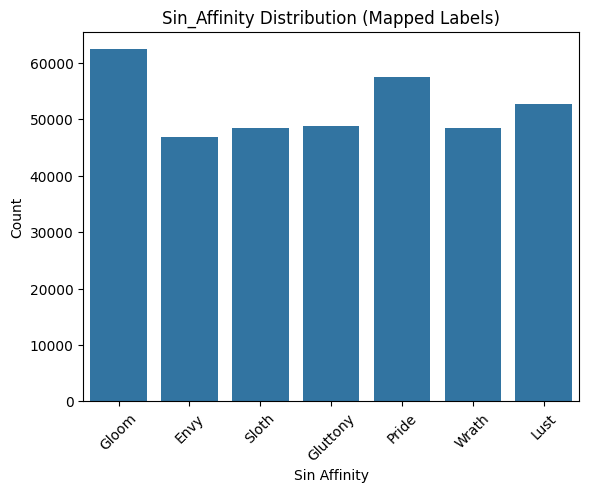

In [170]:
import seaborn as sns
import matplotlib.pyplot as plt

# 일시적으로 역매핑된 값으로 그래프 그리기
sns.countplot(x=merged_data_copy_df['Sin_Affinity'].map(sin_affinity_reverse_mapping))
plt.title('Sin_Affinity Distribution (Mapped Labels)')
plt.xlabel('Sin Affinity')
plt.ylabel('Count')
plt.xticks(rotation=45)  # 필요 시 레이블 회전
plt.show()

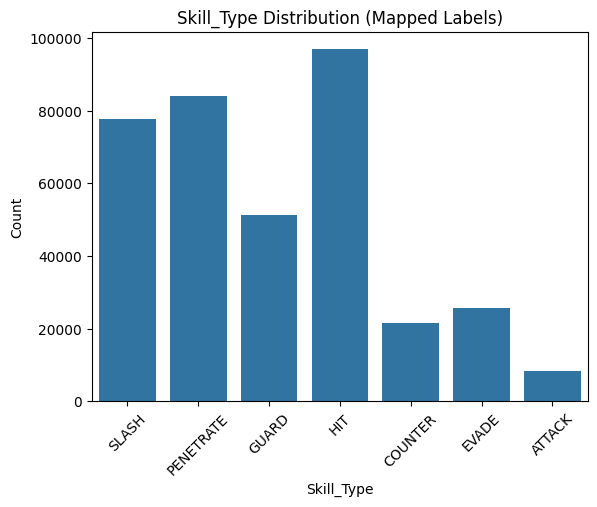

In [171]:
import seaborn as sns
import matplotlib.pyplot as plt

# 일시적으로 역매핑된 값으로 그래프 그리기
sns.countplot(x=merged_data_copy_df['Skill_Type'].map(skill_type_reverse_mapping))
plt.title('Skill_Type Distribution (Mapped Labels)')
plt.xlabel('Skill_Type')
plt.ylabel('Count')
plt.xticks(rotation=45)  # 필요 시 레이블 회전
plt.show()

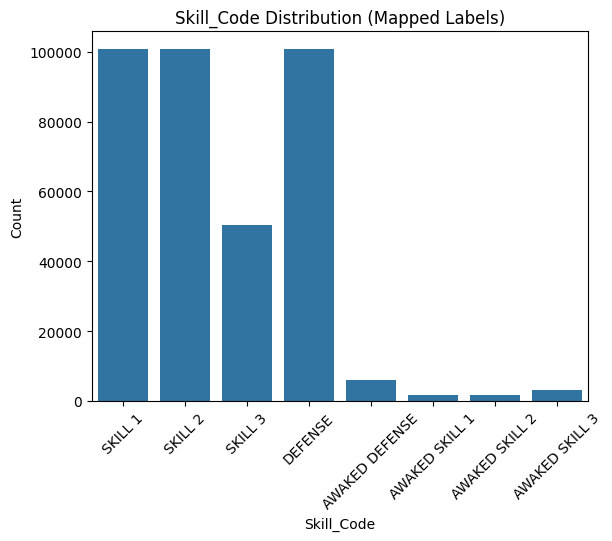

In [172]:
import seaborn as sns
import matplotlib.pyplot as plt

# 일시적으로 역매핑된 값으로 그래프 그리기
sns.countplot(x=merged_data_copy_df['Skill_Code'].map(skill_code_reverse_mapping))
plt.title('Skill_Code Distribution (Mapped Labels)')
plt.xlabel('Skill_Code')
plt.ylabel('Count')
plt.xticks(rotation=45)  # 필요 시 레이블 회전
plt.show()

In [173]:
merged_data_copy_df.sum()

Rarity                           888400
Open_Day_After_Release_Date    84755600
Uptie                            913000
MinSpeed                        1074200
MaxSpeed                        2196700
Level                           9312600
HP                             52159984
Defense                         9363368
Skill_Code                       944800
Skill_Level                     9890280
Skill_Type                      1864400
Sin_Affinity                    1446400
Coin_Count                       690000
Atk_Weight                       260000
Uptie_Level                      965400
Skill_Power                     1877800
Coin_Power                      1778600
dtype: int64

In [174]:
merged_data_copy_df.mean()

Rarity                           2.432640
Open_Day_After_Release_Date    232.079956
Uptie                            2.500000
MinSpeed                         2.941402
MaxSpeed                         6.015060
Level                           25.500000
HP                             142.825805
Defense                         25.639014
Skill_Code                       2.587076
Skill_Level                     27.081818
Skill_Type                       5.105148
Sin_Affinity                     3.960570
Coin_Count                       1.889376
Atk_Weight                       0.711939
Uptie_Level                      2.643483
Skill_Power                      5.141840
Coin_Power                       4.870208
dtype: float64

In [175]:
merged_data_copy_df.describe()

Rarity  Open_Day_After_Release_Date          Uptie  \
count  365200.000000                365200.000000  365200.000000   
mean        2.432640                   232.079956       2.500000   
std         0.655342                   222.840685       1.118036   
min         1.000000                     0.000000       1.000000   
25%         2.000000                     0.000000       1.750000   
50%         3.000000                   178.000000       2.500000   
75%         3.000000                   402.000000       3.250000   
max         3.000000                   682.000000       4.000000   

            MinSpeed       MaxSpeed          Level             HP  \
count  365200.000000  365200.000000  365200.000000  365200.000000   
mean        2.941402       6.015060      25.500000     142.825805   
std         0.861026       1.120136      14.430889      41.528009   
min         1.000000       2.000000       1.000000      62.000000   
25%         2.000000       5.000000      13.000000     109.000000   
50%         3.000000       6.000000      25.500000     141.000000   
75%         3.000000       7.000000      38.000000     173.000000   
max         5.000000       8.000000      50.000000     279.000000   

             Defense     Skill_Code    Skill_Level     Skill_Type  \
count  365200.000000  365200.000000  365200.000000  365200.000000   
mean       25.639014       2.587076      27.081818       5.105148   
std        14.594080       1.446881      14.561515       1.545906   
min         1.000000       1.000000       1.000000       1.000000   
25%        13.000000       1.000000      15.000000       4.000000   
50%        26.000000       2.000000      27.000000       5.000000   
75%        38.000000       4.000000      40.000000       6.000000   
max        55.000000       8.000000      56.000000       7.000000   

        Sin_Affinity     Coin_Count     Atk_Weight    Uptie_Level  \
count  365200.000000  365200.000000  365200.000000  365200.000000   
mean        3.960570       1.889376       0.711939       2.643483   
std         1.962013       0.921823       0.464796       1.108790   
min         1.000000       1.000000       0.000000       1.000000   
25%         2.000000       1.000000       0.000000       2.000000   
50%         4.000000       2.000000       1.000000       3.000000   
75%         6.000000       2.000000       1.000000       4.000000   
max         7.000000       5.000000       3.000000       4.000000   

         Skill_Power     Coin_Power  
count  365200.000000  365200.000000  
mean        5.141840       4.870208  
std         3.331479       3.274273  
min         1.000000     -13.000000  
25%         3.000000       3.000000  
50%         4.000000       4.000000  
75%         6.000000       6.000000  
max        31.000000      25.000000

In [176]:
merged_data_copy_df.isna().sum()

Rarity                         0
Open_Day_After_Release_Date    0
Uptie                          0
MinSpeed                       0
MaxSpeed                       0
Level                          0
HP                             0
Defense                        0
Skill_Code                     0
Skill_Level                    0
Skill_Type                     0
Sin_Affinity                   0
Coin_Count                     0
Atk_Weight                     0
Uptie_Level                    0
Skill_Power                    0
Coin_Power                     0
dtype: int64

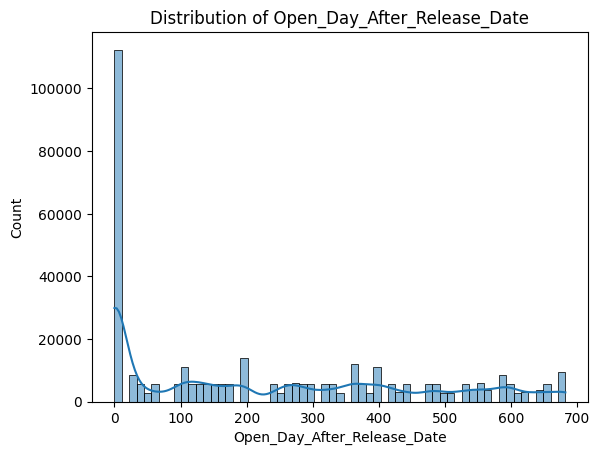

In [177]:
# 히스토그램
sns.histplot(merged_data_copy_df['Open_Day_After_Release_Date'], kde=True)
plt.title('Distribution of Open_Day_After_Release_Date')
plt.show()

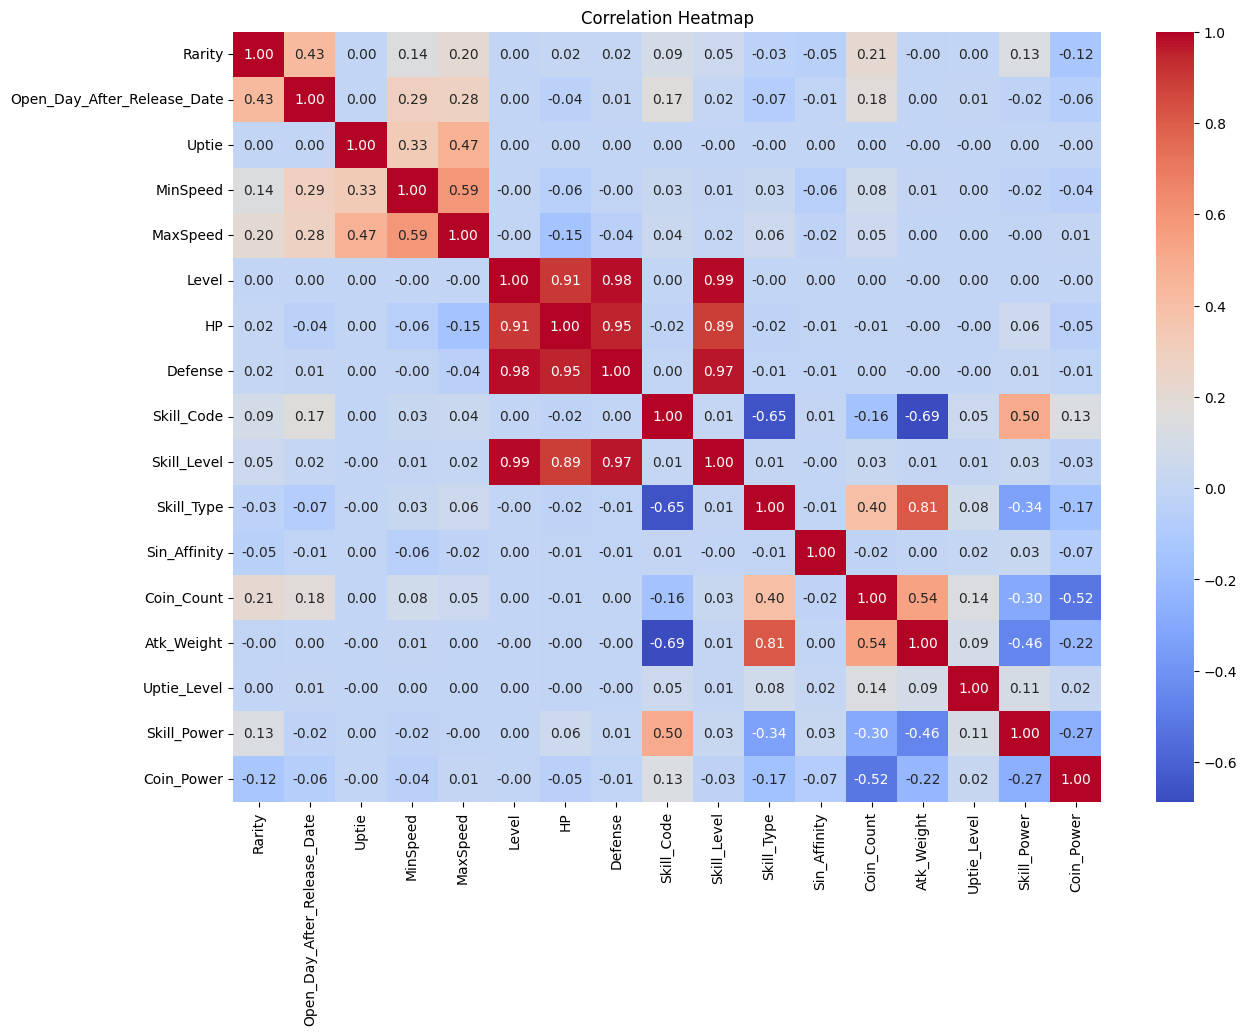

In [180]:
# 상관 행렬 (히트맵)
plt.figure(figsize=(14, 10))
corr_matrix = merged_data_copy_df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

In [14]:
merged_data_df = merged_data_df.copy()

In [12]:
mergerd_decision_df = merged_data_df['Identity_ID', 'Open_Day_After_Release_Date', 'Uptie', 'MinSpeed', 'MaxSpeed', 'Level', 'HP', 'Defense', ]

Identity_ID                                  Name  Rarity  \
0             10101                  [LCB Sinner] Yi Sang       1   
1             10101                  [LCB Sinner] Yi Sang       1   
2             10101                  [LCB Sinner] Yi Sang       1   
3             10101                  [LCB Sinner] Yi Sang       1   
4             10101                  [LCB Sinner] Yi Sang       1   
...             ...                                   ...     ...   
365195        11210  [The Priest of La Manchaland] Gregor       3   
365196        11210  [The Priest of La Manchaland] Gregor       3   
365197        11210  [The Priest of La Manchaland] Gregor       3   
365198        11210  [The Priest of La Manchaland] Gregor       3   
365199        11210  [The Priest of La Manchaland] Gregor       3   

        Open_Day_After_Release_Date  Uptie  MinSpeed  MaxSpeed Character_Name  \
0                                 0      1         4         6        Yi Sang   
1                                 0      1         4         6        Yi Sang   
2                                 0      1         4         6        Yi Sang   
3                                 0      1         4         6        Yi Sang   
4                                 0      1         4         6        Yi Sang   
...                             ...    ...       ...       ...            ...   
365195                          612      4         4         6         Gregor   
365196                          612      4         4         6         Gregor   
365197                          612      4         4         6         Gregor   
365198                          612      4         4         6         Gregor   
365199                          612      4         4         6         Gregor   

        Level   HP  ...  Skill_Code Skill_Level  Skill_Type Sin_Affinity  \
0           1   74  ...     SKILL 1           1       SLASH        Gloom   
1           1   74  ...     SKILL 1           1       SLASH        Gloom   
2           1   74  ...     SKILL 1           1       SLASH        Gloom   
3           1   74  ...     SKILL 1           1       SLASH        Gloom   
4           1   74  ...     SKILL 2           1   PENETRATE         Envy   
...       ...  ...  ...         ...         ...         ...          ...   
365195     50  279  ...     SKILL 3          53         HIT         Lust   
365196     50  279  ...     DEFENSE          55       GUARD         Lust   
365197     50  279  ...     DEFENSE          55       GUARD         Lust   
365198     50  279  ...     DEFENSE          55       GUARD         Lust   
365199     50  279  ...     DEFENSE          55       GUARD         Lust   

       Coin_Count  Init_Remain Atk_Weight  Uptie_Level  Skill_Power  \
0               1           3x          1            1            2   
1               1           3x          1            2            2   
2               1           3x          1            3            3   
3               1           3x          1            4            4   
4               2           2x          1            1            3   
...           ...          ...        ...          ...          ...   
365195          3           1x          1            4            5   
365196          1           -1          0            1           15   
365197          1           -1          0            2           15   
365198          1           -1          0            3           15   
365199          1           -1          0            4           15   

        Coin_Power  
0                7  
1                7  
2                7  
3                7  
4                4  
...            ...  
365195           4  
365196           5  
365197           5  
365198           5  
365199           5  

[365200 rows x 21 columns]

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

In [3]:
identities_df = pd.read_csv('./csv/Identities.csv')
level_stats_df = pd.read_csv('./csv/level_stats_expanded.csv')
uptie_stats_df = pd.read_csv('./csv/Uptiestats.csv')
identities_skills_df = pd.read_csv('./csv/identities_skills_updated_df.csv')
skill_crawl_anlaysis_df = pd.read_csv('./csv/skill_crawl_anlaysis.csv')

In [4]:
decision_data_df = identities_df[['ID', 'Rarity', 'Release_Date']]

In [5]:
decision_data_df.rename(columns={'ID': 'Identity_ID'})

Identity_ID  Rarity Release_Date
0          10101       1   2023-02-27
1          10102       2   2023-02-27
2          10103       3   2023-02-27
3          10104       3   2023-06-15
4          10105       2   2023-09-14
..           ...     ...          ...
121        11206       3   2023-08-10
122        11207       3   2023-11-16
123        11208       2   2024-02-22
124        11209       3   2024-04-04
125        11210       3   2024-10-31

[126 rows x 3 columns]

In [6]:
decision_data_df

ID  Rarity Release_Date
0    10101       1   2023-02-27
1    10102       2   2023-02-27
2    10103       3   2023-02-27
3    10104       3   2023-06-15
4    10105       2   2023-09-14
..     ...     ...          ...
121  11206       3   2023-08-10
122  11207       3   2023-11-16
123  11208       2   2024-02-22
124  11209       3   2024-04-04
125  11210       3   2024-10-31

[126 rows x 3 columns]

In [7]:
decision_data_df = decision_data_df.copy()

reference_date = datetime.strptime("2023-02-27", "%Y-%m-%d")

# Release_Date를 datetime 형식으로 변환
decision_data_df["Release_Date"] = pd.to_datetime(decision_data_df["Release_Date"])

# 기준일로부터 지난 날짜 계산
decision_data_df["Open_After_Day"] = (decision_data_df["Release_Date"] - reference_date).dt.days

In [8]:
# 결과 데이터프레임 확인
decision_data_df = decision_data_df.drop(columns=['Release_Date'])

In [9]:
decision_data_df = decision_data_df.rename(columns={'ID': 'Identity_ID'})

In [10]:
uptie_stats_df[['MinSpeed','MaxSpeed']] = uptie_stats_df['Speed'].str.split('-', expand=True).astype(int)
uptie_stats_df = uptie_stats_df.drop(columns=['Speed'])

In [11]:
decision_data_df

Identity_ID  Rarity  Open_After_Day
0          10101       1               0
1          10102       2               0
2          10103       3               0
3          10104       3             108
4          10105       2             199
..           ...     ...             ...
121        11206       3             164
122        11207       3             262
123        11208       2             360
124        11209       3             402
125        11210       3             612

[126 rows x 3 columns]

In [12]:
uptie_stats_df

Identity_ID  Uptie_Level  MinSpeed  MaxSpeed
0          10101            1         4         6
1          10101            2         4         7
2          10101            3         4         8
3          10101            4         4         8
4          10102            1         5         6
..           ...          ...       ...       ...
499        11209            4         3         8
500        11210            1         3         5
501        11210            2         3         5
502        11210            3         4         6
503        11210            4         4         6

[504 rows x 4 columns]

In [12]:
decision_level_stats_df = level_stats_df.drop(columns=['Skill_Code', 'Skill_Level'])

In [13]:
decision_level_stats_df = decision_level_stats_df.drop_duplicates(subset=['Identity_ID','Level','HP','Defense'])

In [13]:
level_stats_df

Identity_ID  Level   HP  Defense Skill_Code  Skill_Level
0            10101      1   74        1    SKILL 1            1
1            10101      1   74        1    SKILL 2            1
2            10101      1   74        1    SKILL 3            1
3            10101      1   74        1    DEFENSE            1
4            10101      2   77        1    SKILL 1            2
...            ...    ...  ...      ...        ...          ...
26195        11210     49  275       54    DEFENSE           54
26196        11210     50  279       55    SKILL 1           51
26197        11210     50  279       55    SKILL 2           51
26198        11210     50  279       55    SKILL 3           53
26199        11210     50  279       55    DEFENSE           55

[26200 rows x 6 columns]

In [14]:
decision_merged_data_df = (
    decision_data_df
    .merge(uptie_stats_df, left_on='Identity_ID', right_on='Identity_ID', how='left')
    .merge(level_stats_df, left_on='Identity_ID', right_on='Identity_ID', how='left')
)
decision_merged_data_df

Identity_ID  Rarity  Open_After_Day  Uptie_Level  MinSpeed  MaxSpeed  \
0             10101       1               0            1         4         6   
1             10101       1               0            1         4         6   
2             10101       1               0            1         4         6   
3             10101       1               0            1         4         6   
4             10101       1               0            1         4         6   
...             ...     ...             ...          ...       ...       ...   
104795        11210       3             612            4         4         6   
104796        11210       3             612            4         4         6   
104797        11210       3             612            4         4         6   
104798        11210       3             612            4         4         6   
104799        11210       3             612            4         4         6   

        Level   HP  Defense Skill_Code  Skill_Level  
0           1   74        1    SKILL 1            1  
1           1   74        1    SKILL 2            1  
2           1   74        1    SKILL 3            1  
3           1   74        1    DEFENSE            1  
4           2   77        1    SKILL 1            2  
...       ...  ...      ...        ...          ...  
104795     49  275       54    DEFENSE           54  
104796     50  279       55    SKILL 1           51  
104797     50  279       55    SKILL 2           51  
104798     50  279       55    SKILL 3           53  
104799     50  279       55    DEFENSE           55  

[104800 rows x 11 columns]

In [17]:
# 레벨별 데이터를 하나의 행으로 묶기
pivot_df = decision_merged_data_df.pivot_table(
    index='Identity_ID',
    columns=['Level', 'Uptie_Level'],
    values=['Rarity', 'MinSpeed', 'MaxSpeed', 'HP', 'Defense'],
    aggfunc='mean'
)

# 컬럼 구조 확인
print(pivot_df.columns)

# 다중 인덱스를 문자열로 변환
pivot_df.columns = ['_'.join(map(str, col)) for col in pivot_df.columns]

# 인덱스 초기화
pivot_df.reset_index(inplace=True)

print(pivot_df)

MultiIndex([('Defense',  1, 1),
            ('Defense',  1, 2),
            ('Defense',  1, 3),
            ('Defense',  1, 4),
            ('Defense',  2, 1),
            ('Defense',  2, 2),
            ('Defense',  2, 3),
            ('Defense',  2, 4),
            ('Defense',  3, 1),
            ('Defense',  3, 2),
            ...
            ( 'Rarity', 48, 3),
            ( 'Rarity', 48, 4),
            ( 'Rarity', 49, 1),
            ( 'Rarity', 49, 2),
            ( 'Rarity', 49, 3),
            ( 'Rarity', 49, 4),
            ( 'Rarity', 50, 1),
            ( 'Rarity', 50, 2),
            ( 'Rarity', 50, 3),
            ( 'Rarity', 50, 4)],
           names=[None, 'Level', 'Uptie_Level'], length=1000)
     Identity_ID  Defense_1_1  Defense_1_2  Defense_1_3  Defense_1_4  \
0          10101          1.0          1.0          1.0          1.0   
1          10102          3.0          3.0          3.0          3.0   
2          10103          1.0          1.0          1.0          

In [154]:
# Step 2: 클러스터링용 데이터 준비 (필요한 컬럼만 선택)
features_df = pivot_df.drop(columns=['Identity_ID'])  # Identity_ID 제외

In [155]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
# Step 3: 데이터 정규화 (스케일링)
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features_df)

In [156]:
# Step 4: K-means 클러스터링
kmeans = KMeans(n_clusters=3, random_state=42)
pivot_df['Cluster'] = kmeans.fit_predict(scaled_features)

In [157]:
# Step 5: 클러스터링 결과 출력
print(pivot_df[['Identity_ID', 'Cluster']])  # Identity_ID와 클러스터 정보 출력

     Identity_ID  Cluster
0          10101        2
1          10102        0
2          10103        2
3          10104        2
4          10105        2
..           ...      ...
121        11206        0
122        11207        2
123        11208        2
124        11209        2
125        11210        0

[126 rows x 2 columns]


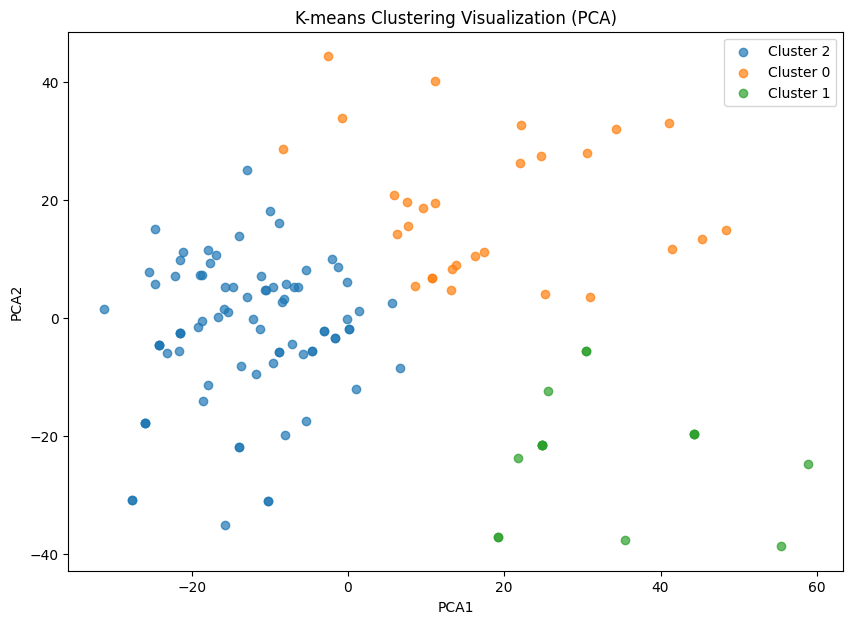

In [158]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Step 1: PCA를 사용해 2D로 차원 축소
pca = PCA(n_components=2)
reduced_features = pca.fit_transform(scaled_features)

# Step 2: 결과를 DataFrame으로 변환 (시각화를 위해)
reduced_df = pd.DataFrame(reduced_features, columns=['PCA1', 'PCA2'])
reduced_df['Cluster'] = pivot_df['Cluster']

# Step 3: 클러스터별로 색상 구분하여 시각화
plt.figure(figsize=(10, 7))
for cluster in reduced_df['Cluster'].unique():
    cluster_data = reduced_df[reduced_df['Cluster'] == cluster]
    plt.scatter(cluster_data['PCA1'], cluster_data['PCA2'], label=f'Cluster {cluster}', alpha=0.7)

plt.title('K-means Clustering Visualization (PCA)')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.legend()
plt.show()

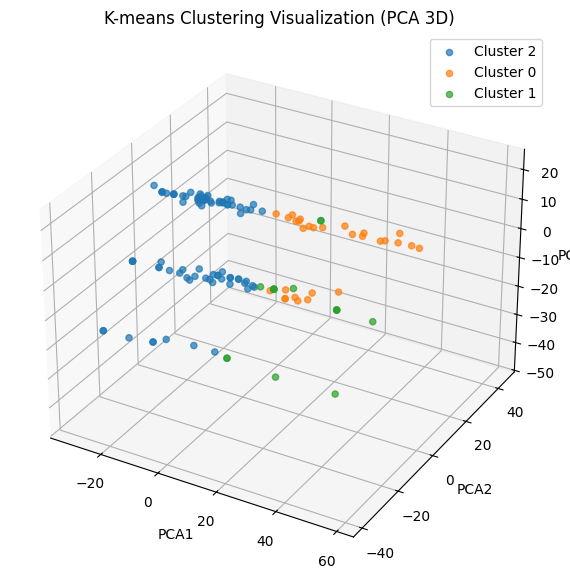

In [74]:
from mpl_toolkits.mplot3d import Axes3D

# Step 1: PCA를 사용해 3D로 차원 축소
pca_3d = PCA(n_components=3)
reduced_features_3d = pca_3d.fit_transform(scaled_features)

# Step 2: 결과를 DataFrame으로 변환
reduced_df_3d = pd.DataFrame(reduced_features_3d, columns=['PCA1', 'PCA2', 'PCA3'])
reduced_df_3d['Cluster'] = pivot_df['Cluster']

# Step 3: 3D 시각화
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

for cluster in reduced_df_3d['Cluster'].unique():
    cluster_data = reduced_df_3d[reduced_df_3d['Cluster'] == cluster]
    ax.scatter(cluster_data['PCA1'], cluster_data['PCA2'], cluster_data['PCA3'], label=f'Cluster {cluster}', alpha=0.7)

ax.set_title('K-means Clustering Visualization (PCA 3D)')
ax.set_xlabel('PCA1')
ax.set_ylabel('PCA2')
ax.set_zlabel('PCA3')
ax.legend()
plt.show()

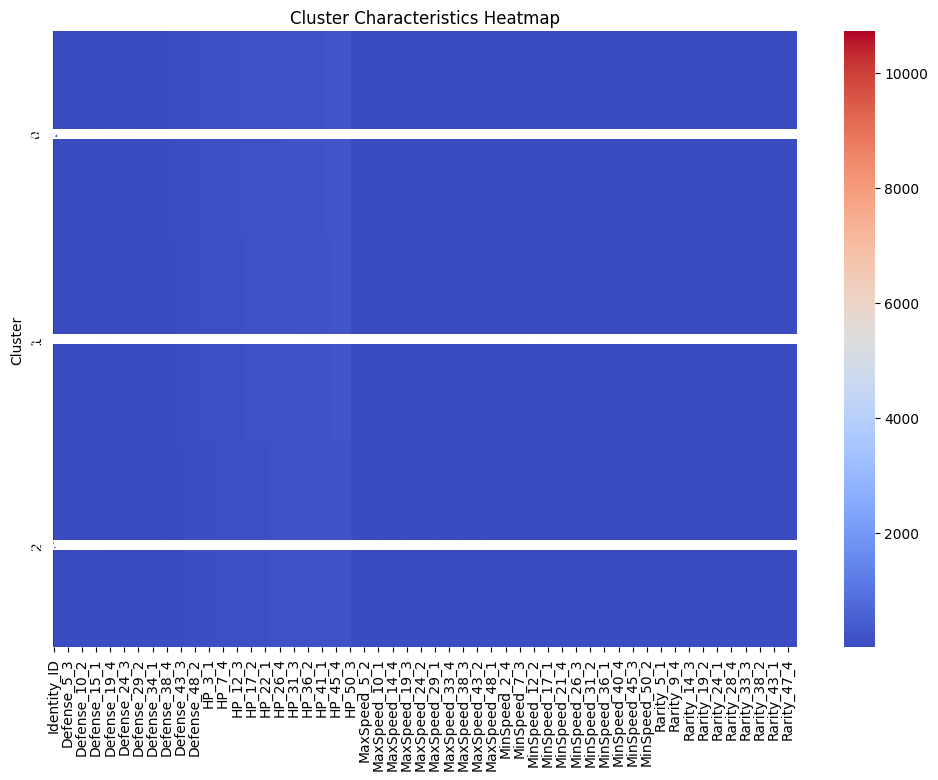

In [75]:
import seaborn as sns

# 클러스터별 평균값 계산
cluster_means = pivot_df.groupby('Cluster').mean()

# 히트맵 그리기
plt.figure(figsize=(12, 8))
sns.heatmap(cluster_means, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Cluster Characteristics Heatmap')
plt.show()


In [76]:
identity_print_df = identities_df.copy()
identity_print_df = identity_print_df.rename(columns={'ID': 'Identity_ID'})

In [77]:
# pivot_df에서 필요한 컬럼 추출
cluster_df = pivot_df[['Identity_ID', 'Cluster']]

# 'Identities_df'와 병합 ('Identity_ID'를 기준으로)
merged_result = pd.merge(cluster_df, identity_print_df[['Identity_ID', 'Name']], on='Identity_ID', how='inner')

# 결과 출력
print(merged_result)

# CSV 파일로 저장
merged_result.to_csv('./csv/clustered_identities.csv', index=False)

     Identity_ID  Cluster                                    Name
0          10101        2                    [LCB Sinner] Yi Sang
1          10102        0  [Seven Assoc. South Section 6] Yi Sang
2          10103        2           [Blade Lineage Salsu] Yi Sang
3          10104        2  [Effloresced E.G.O::Spicebush] Yi Sang
4          10105        2            [Molar Office Fixer] Yi Sang
..           ...      ...                                     ...
121        11206        0    [Zwei Assoc. South Section 4] Gregor
122        11207        2    [Twinhook Pirates First Mate] Gregor
123        11208        2          [Kurokumo Clan Captain] Gregor
124        11209        2              [Edgar Family Heir] Gregor
125        11210        0    [The Priest of La Manchaland] Gregor

[126 rows x 3 columns]


In [78]:
identity_print_df

Identity_ID                                    Name  Rarity Skill_1_Type  \
0          10101                    [LCB Sinner] Yi Sang       1        SLASH   
1          10102  [Seven Assoc. South Section 6] Yi Sang       2    PENETRATE   
2          10103           [Blade Lineage Salsu] Yi Sang       3        SLASH   
3          10104  [Effloresced E.G.O::Spicebush] Yi Sang       3    PENETRATE   
4          10105            [Molar Office Fixer] Yi Sang       2    PENETRATE   
..           ...                                     ...     ...          ...   
121        11206    [Zwei Assoc. South Section 4] Gregor       3        SLASH   
122        11207    [Twinhook Pirates First Mate] Gregor       3    PENETRATE   
123        11208          [Kurokumo Clan Captain] Gregor       2        SLASH   
124        11209              [Edgar Family Heir] Gregor       3        SLASH   
125        11210    [The Priest of La Manchaland] Gregor       3          HIT   

    Skill_1_Sin_Affinity Skill_2_Type Skill_2_Sin_Affinity Skill_3_Type  \
0                  Gloom    PENETRATE                 Envy        SLASH   
1                  Gloom    PENETRATE             Gluttony          HIT   
2                  Pride        SLASH                Wrath        SLASH   
3               Gluttony          HIT                Sloth    PENETRATE   
4                   Lust          HIT                Sloth          HIT   
..                   ...          ...                  ...          ...   
121                Sloth        SLASH             Gluttony        SLASH   
122                Sloth    PENETRATE                Pride    PENETRATE   
123                Sloth          HIT                 Lust        SLASH   
124                 Envy        SLASH                Gloom        SLASH   
125             Gluttony          HIT                Pride          HIT   

    Skill_3_Sin_Affinity Defense_Type Defense_Sin_Affinity Release_Date  
0                  Sloth        GUARD                Gloom   2023-02-27  
1                  Sloth        GUARD             Gluttony   2023-02-27  
2                   Envy      COUNTER                Pride   2023-02-27  
3                  Pride        EVADE                Sloth   2023-06-15  
4                  Wrath        GUARD                Sloth   2023-09-14  
..                   ...          ...                  ...          ...  
121                Gloom        GUARD                Sloth   2023-08-10  
122                Gloom        EVADE                Gloom   2023-11-16  
123                Gloom        GUARD                 Lust   2024-02-22  
124                 Lust        EVADE                Gloom   2024-04-04  
125                 Lust        GUARD                 Lust   2024-10-31  

[126 rows x 12 columns]

In [100]:
# Step 4: K-means 클러스터링
kmeans = KMeans(n_clusters=4, random_state=42)
pivot_df['Cluster'] = kmeans.fit_predict(scaled_features)

In [101]:
# Step 5: 클러스터링 결과 출력
print(pivot_df[['Identity_ID', 'Cluster']])  # Identity_ID와 클러스터 정보 출력

     Identity_ID  Cluster
0          10101        2
1          10102        0
2          10103        1
3          10104        1
4          10105        2
..           ...      ...
121        11206        0
122        11207        1
123        11208        2
124        11209        1
125        11210        0

[126 rows x 2 columns]


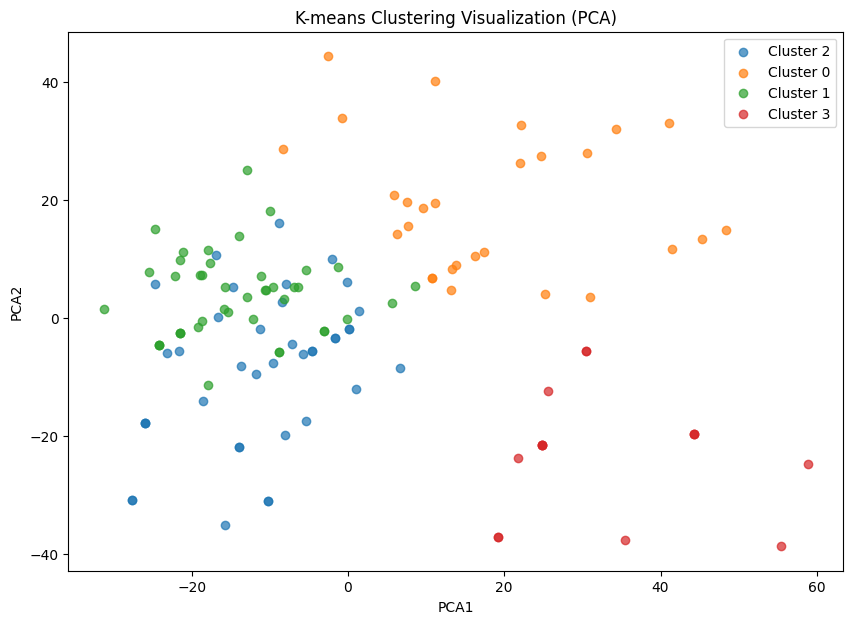

In [81]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Step 1: PCA를 사용해 2D로 차원 축소
pca = PCA(n_components=2)
reduced_features = pca.fit_transform(scaled_features)

# Step 2: 결과를 DataFrame으로 변환 (시각화를 위해)
reduced_df = pd.DataFrame(reduced_features, columns=['PCA1', 'PCA2'])
reduced_df['Cluster'] = pivot_df['Cluster']

# Step 3: 클러스터별로 색상 구분하여 시각화
plt.figure(figsize=(10, 7))
for cluster in reduced_df['Cluster'].unique():
    cluster_data = reduced_df[reduced_df['Cluster'] == cluster]
    plt.scatter(cluster_data['PCA1'], cluster_data['PCA2'], label=f'Cluster {cluster}', alpha=0.7)

plt.title('K-means Clustering Visualization (PCA)')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.legend()
plt.show()

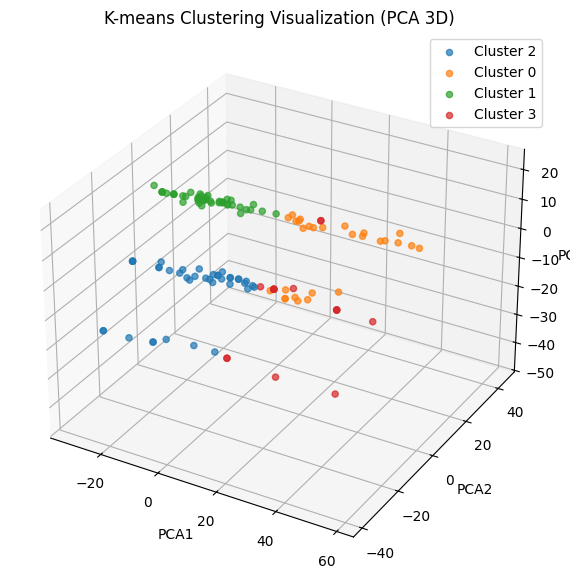

In [82]:
from mpl_toolkits.mplot3d import Axes3D

# Step 1: PCA를 사용해 3D로 차원 축소
pca_3d = PCA(n_components=3)
reduced_features_3d = pca_3d.fit_transform(scaled_features)

# Step 2: 결과를 DataFrame으로 변환
reduced_df_3d = pd.DataFrame(reduced_features_3d, columns=['PCA1', 'PCA2', 'PCA3'])
reduced_df_3d['Cluster'] = pivot_df['Cluster']

# Step 3: 3D 시각화
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

for cluster in reduced_df_3d['Cluster'].unique():
    cluster_data = reduced_df_3d[reduced_df_3d['Cluster'] == cluster]
    ax.scatter(cluster_data['PCA1'], cluster_data['PCA2'], cluster_data['PCA3'], label=f'Cluster {cluster}', alpha=0.7)

ax.set_title('K-means Clustering Visualization (PCA 3D)')
ax.set_xlabel('PCA1')
ax.set_ylabel('PCA2')
ax.set_zlabel('PCA3')
ax.legend()
plt.show()

In [83]:
# Step 4: K-means 클러스터링
kmeans = KMeans(n_clusters=5, random_state=42)
pivot_df['Cluster'] = kmeans.fit_predict(scaled_features)

In [84]:
# Step 5: 클러스터링 결과 출력
print(pivot_df[['Identity_ID', 'Cluster']])  # Identity_ID와 클러스터 정보 출력

     Identity_ID  Cluster
0          10101        2
1          10102        4
2          10103        1
3          10104        1
4          10105        2
..           ...      ...
121        11206        0
122        11207        1
123        11208        4
124        11209        1
125        11210        0

[126 rows x 2 columns]


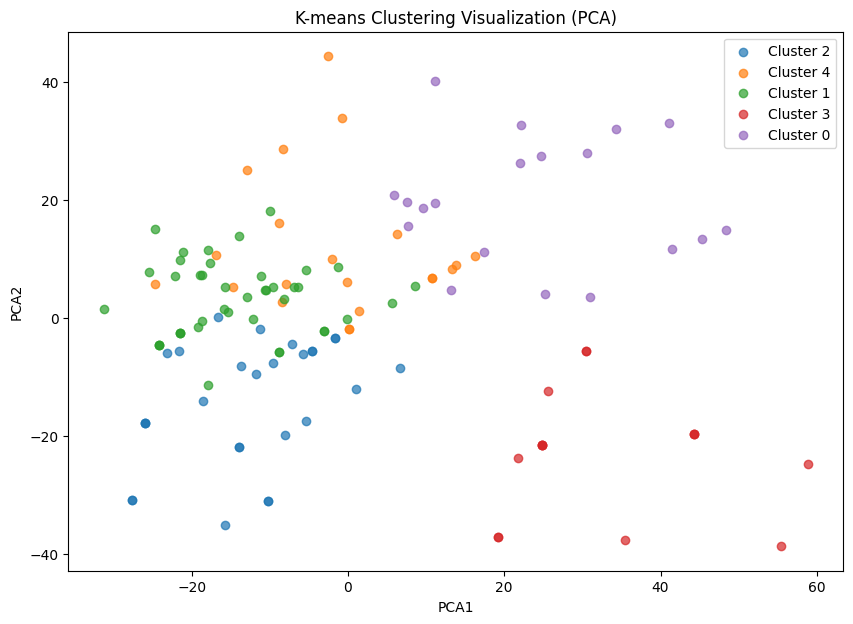

In [85]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Step 1: PCA를 사용해 2D로 차원 축소
pca = PCA(n_components=2)
reduced_features = pca.fit_transform(scaled_features)

# Step 2: 결과를 DataFrame으로 변환 (시각화를 위해)
reduced_df = pd.DataFrame(reduced_features, columns=['PCA1', 'PCA2'])
reduced_df['Cluster'] = pivot_df['Cluster']

# Step 3: 클러스터별로 색상 구분하여 시각화
plt.figure(figsize=(10, 7))
for cluster in reduced_df['Cluster'].unique():
    cluster_data = reduced_df[reduced_df['Cluster'] == cluster]
    plt.scatter(cluster_data['PCA1'], cluster_data['PCA2'], label=f'Cluster {cluster}', alpha=0.7)

plt.title('K-means Clustering Visualization (PCA)')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.legend()
plt.show()

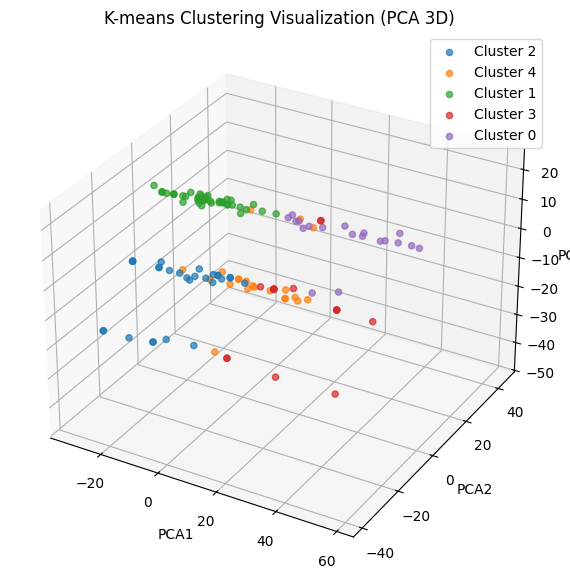

In [86]:
from mpl_toolkits.mplot3d import Axes3D

# Step 1: PCA를 사용해 3D로 차원 축소
pca_3d = PCA(n_components=3)
reduced_features_3d = pca_3d.fit_transform(scaled_features)

# Step 2: 결과를 DataFrame으로 변환
reduced_df_3d = pd.DataFrame(reduced_features_3d, columns=['PCA1', 'PCA2', 'PCA3'])
reduced_df_3d['Cluster'] = pivot_df['Cluster']

# Step 3: 3D 시각화
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

for cluster in reduced_df_3d['Cluster'].unique():
    cluster_data = reduced_df_3d[reduced_df_3d['Cluster'] == cluster]
    ax.scatter(cluster_data['PCA1'], cluster_data['PCA2'], cluster_data['PCA3'], label=f'Cluster {cluster}', alpha=0.7)

ax.set_title('K-means Clustering Visualization (PCA 3D)')
ax.set_xlabel('PCA1')
ax.set_ylabel('PCA2')
ax.set_zlabel('PCA3')
ax.legend()
plt.show()

In [87]:
# Step 4: K-means 클러스터링
kmeans = KMeans(n_clusters=6, random_state=42)
pivot_df['Cluster'] = kmeans.fit_predict(scaled_features)

In [88]:
# Step 5: 클러스터링 결과 출력
print(pivot_df[['Identity_ID', 'Cluster']])  # Identity_ID와 클러스터 정보 출력

     Identity_ID  Cluster
0          10101        4
1          10102        4
2          10103        2
3          10104        2
4          10105        4
..           ...      ...
121        11206        0
122        11207        2
123        11208        4
124        11209        2
125        11210        0

[126 rows x 2 columns]


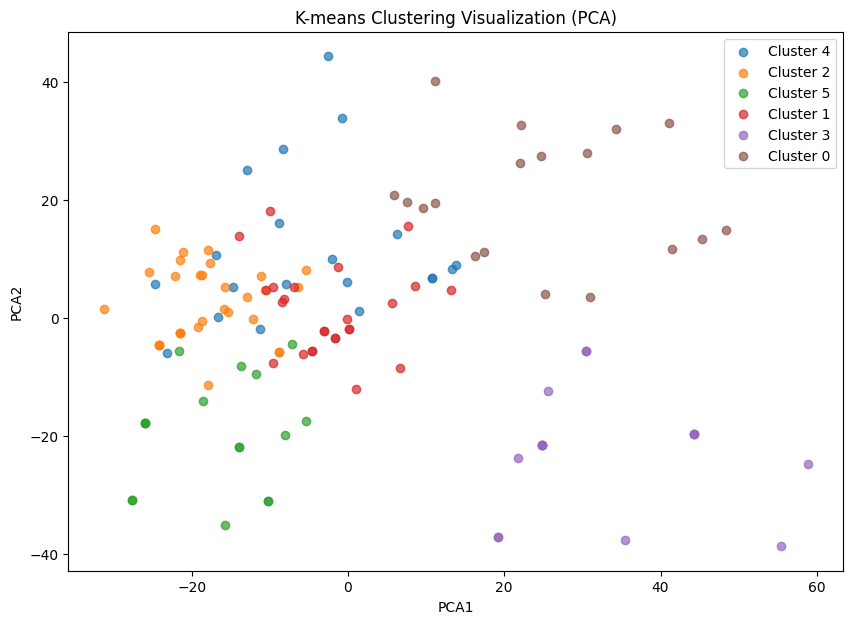

In [89]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Step 1: PCA를 사용해 2D로 차원 축소
pca = PCA(n_components=2)
reduced_features = pca.fit_transform(scaled_features)

# Step 2: 결과를 DataFrame으로 변환 (시각화를 위해)
reduced_df = pd.DataFrame(reduced_features, columns=['PCA1', 'PCA2'])
reduced_df['Cluster'] = pivot_df['Cluster']

# Step 3: 클러스터별로 색상 구분하여 시각화
plt.figure(figsize=(10, 7))
for cluster in reduced_df['Cluster'].unique():
    cluster_data = reduced_df[reduced_df['Cluster'] == cluster]
    plt.scatter(cluster_data['PCA1'], cluster_data['PCA2'], label=f'Cluster {cluster}', alpha=0.7)

plt.title('K-means Clustering Visualization (PCA)')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.legend()
plt.show()

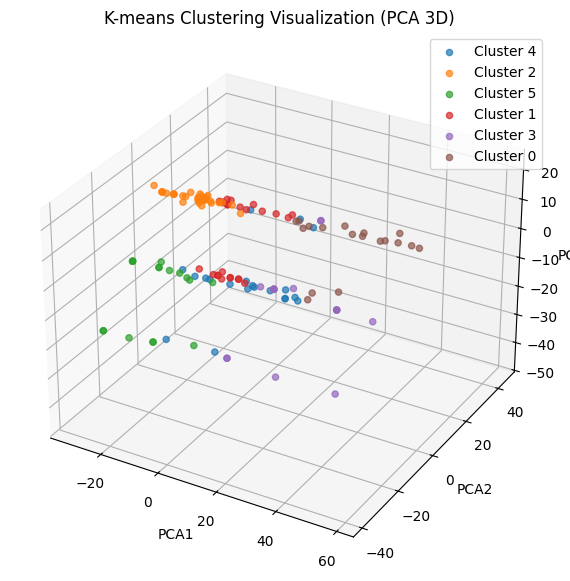

In [90]:
from mpl_toolkits.mplot3d import Axes3D

# Step 1: PCA를 사용해 3D로 차원 축소
pca_3d = PCA(n_components=3)
reduced_features_3d = pca_3d.fit_transform(scaled_features)

# Step 2: 결과를 DataFrame으로 변환
reduced_df_3d = pd.DataFrame(reduced_features_3d, columns=['PCA1', 'PCA2', 'PCA3'])
reduced_df_3d['Cluster'] = pivot_df['Cluster']

# Step 3: 3D 시각화
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

for cluster in reduced_df_3d['Cluster'].unique():
    cluster_data = reduced_df_3d[reduced_df_3d['Cluster'] == cluster]
    ax.scatter(cluster_data['PCA1'], cluster_data['PCA2'], cluster_data['PCA3'], label=f'Cluster {cluster}', alpha=0.7)

ax.set_title('K-means Clustering Visualization (PCA 3D)')
ax.set_xlabel('PCA1')
ax.set_ylabel('PCA2')
ax.set_zlabel('PCA3')
ax.legend()
plt.show()

     Identity_ID  Cluster_DBSCAN
0          10101              -1
1          10102              -1
2          10103              -1
3          10104              -1
4          10105              -1
..           ...             ...
121        11206              -1
122        11207              -1
123        11208              -1
124        11209              -1
125        11210              -1

[126 rows x 2 columns]


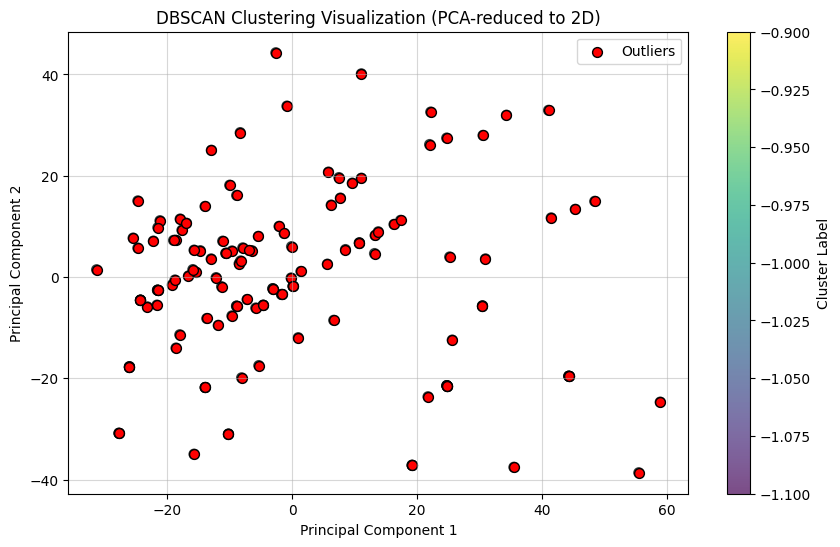

In [92]:
from sklearn.cluster import DBSCAN

# Step 4: DBSCAN 클러스터링
dbscan = DBSCAN(eps=1.5, min_samples=5)  # eps와 min_samples는 데이터에 따라 조정 필요
pivot_df['Cluster_DBSCAN'] = dbscan.fit_predict(scaled_features)

# Step 5: 클러스터링 결과 출력
print(pivot_df[['Identity_ID', 'Cluster_DBSCAN']])

from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Step 1: PCA로 차원 축소 (2차원)
pca = PCA(n_components=2)
pca_features = pca.fit_transform(scaled_features)

# Step 2: DBSCAN 클러스터링 (이미 적용된 결과 사용)
clusters = pivot_df['Cluster_DBSCAN']

# Step 3: 시각화
plt.figure(figsize=(10, 6))
scatter = plt.scatter(
    pca_features[:, 0], pca_features[:, 1], 
    c=clusters, cmap='viridis', s=50, edgecolor='k', alpha=0.7
)
plt.colorbar(scatter, label="Cluster Label")
plt.title("DBSCAN Clustering Visualization (PCA-reduced to 2D)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")

# 이상치(outlier) 강조 (Cluster = -1)
outliers = (clusters == -1)
plt.scatter(
    pca_features[outliers, 0], pca_features[outliers, 1], 
    c='red', label='Outliers', s=50, edgecolor='k'
)

plt.legend()
plt.grid(alpha=0.5)
plt.show()

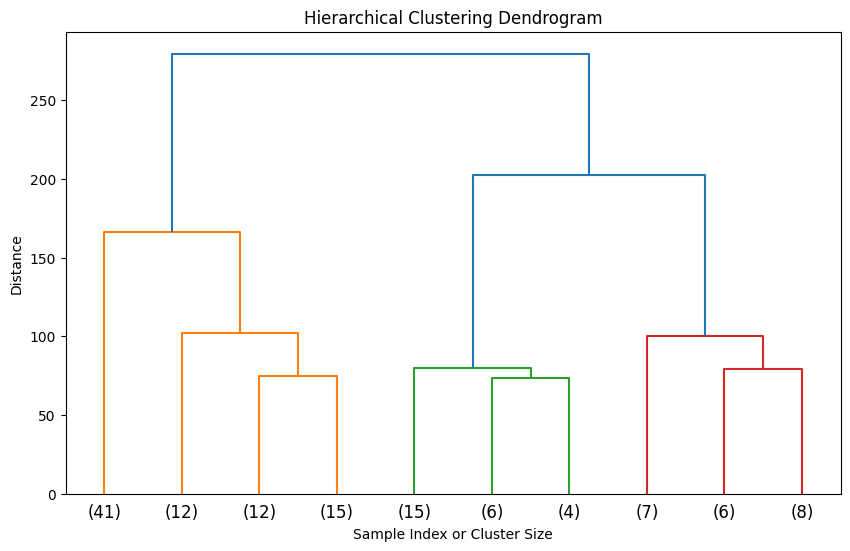

     Identity_ID  Cluster_Hierarchical
0          10101                     1
1          10102                     2
2          10103                     1
3          10104                     1
4          10105                     1
..           ...                   ...
121        11206                     2
122        11207                     1
123        11208                     1
124        11209                     1
125        11210                     2

[126 rows x 2 columns]


In [162]:
from scipy.cluster.hierarchy import linkage, fcluster
from scipy.cluster.hierarchy import dendrogram
import matplotlib.pyplot as plt

# Step 4: Hierarchical Clustering
linkage_matrix = linkage(scaled_features, method='ward')  # Ward 방법 사용
pivot_df['Cluster_Hierarchical'] = fcluster(linkage_matrix, t=3, criterion='maxclust')  # 클러스터 개수 3개 설정

# Step 5: 덴드로그램 시각화
plt.figure(figsize=(10, 6))
dendrogram(linkage_matrix, truncate_mode='lastp', p=10, show_leaf_counts=True)
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Sample Index or Cluster Size")
plt.ylabel("Distance")
plt.show()

# Step 6: 클러스터링 결과 출력
print(pivot_df[['Identity_ID', 'Cluster_Hierarchical']])

In [104]:
# Step 6: 결과 저장
output_df = pivot_df[['Identity_ID', 'Cluster', 'Cluster_Hierarchical']]
output_df = output_df.merge(identity_print_df[['Identity_ID', 'Name']], on='Identity_ID', how='left')  # 이름 추가

# CSV 파일로 저장
output_df.to_csv('./csv/clustering_results.csv', index=False, encoding='utf-8-sig')

print("클러스터링 결과가 'clustering_results.csv' 파일로 저장되었습니다.")

클러스터링 결과가 'clustering_results.csv' 파일로 저장되었습니다.


In [18]:
skill_text_anlaysis_df = identities_skills_df.copy()

In [108]:
import re
# 숫자 추출 함수
def extract_number(value):
    match = re.match(r"(\d+)", value)  # 숫자만 추출
    return int(match.group(1)) if match else int(value)  # 숫자가 없으면 그대로 반환

# Init_Remain에서 숫자만 추출
calculate_standard_power_df["Init_Remain"] = calculate_standard_power_df["Init_Remain"].apply(extract_number)

# AWAKE 접두사가 있는 행 확인
calculate_standard_power_df["Is_Awake"] = calculate_standard_power_df["Skill_Code"].str.startswith("AWAKE")

# `Mean_Power` 계산 함수
def calculate_mean_power(group):
    # 기본 Power 계산
    group["Power"] = (group["Skill_Power"] + group["Coin_Count"] * group["Coin_Power"]) * group["Init_Remain"]
    
    # AWAKE인 경우 계산
    awake_power = group.loc[group["Is_Awake"], "Skill_Power"] + group.loc[group["Is_Awake"], "Coin_Count"] * group.loc[group["Is_Awake"], "Coin_Power"]
    total_remain = group["Init_Remain"].sum() + group["Is_Awake"].sum()  # AWAKE가 있을 경우 total_remain에 +1
    
    mean_power = (group["Power"].sum() + awake_power.sum()) / total_remain if total_remain > 0 else 0
    return mean_power

# Grouping과 계산
mean_power_results = (
    calculate_standard_power_df[calculate_standard_power_df["Init_Remain"] > 0]  # Init_Remain이 양수인 경우만 사용
    .groupby(["Identity_ID", "Uptie_Level"])
    .apply(calculate_mean_power)
    .reset_index(name="Mean_Power")
)

# 결과 출력
print(mean_power_results)

     Identity_ID  Uptie_Level  Mean_Power
0          10101            1    9.800000
1          10101            2    9.800000
2          10101            3   10.500000
3          10101            4   11.500000
4          10102            1    8.600000
..           ...          ...         ...
499        11209            4   13.500000
500        11210            1   11.000000
501        11210            2   11.000000
502        11210            3   13.666667
503        11210            4   13.666667

[504 rows x 3 columns]


/var/folders/27/r1qdd08x0fx8nvdhy823ntqw0000gn/T/ipykernel_44190/2896288086.py:29: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(calculate_mean_power)


In [112]:
merged_df = pd.merge(decision_merged_data_df, mean_power_results, on=["Identity_ID", "Uptie_Level"], how="left")
merged_df

Identity_ID  Rarity  Open_After_Day  Uptie_Level  MinSpeed  MaxSpeed  \
0            10101       1               0            1         4         6   
1            10101       1               0            1         4         6   
2            10101       1               0            1         4         6   
3            10101       1               0            1         4         6   
4            10101       1               0            1         4         6   
...            ...     ...             ...          ...       ...       ...   
25195        11210       3             612            4         4         6   
25196        11210       3             612            4         4         6   
25197        11210       3             612            4         4         6   
25198        11210       3             612            4         4         6   
25199        11210       3             612            4         4         6   

       Level   HP  Defense  Mean_Power  
0          1   74        1    9.800000  
1          2   77        1    9.800000  
2          3   79        1    9.800000  
3          4   82        2    9.800000  
4          5   84        3    9.800000  
...      ...  ...      ...         ...  
25195     46  265       51   13.666667  
25196     47  268       52   13.666667  
25197     48  272       53   13.666667  
25198     49  275       54   13.666667  
25199     50  279       55   13.666667  

[25200 rows x 10 columns]

In [114]:
# 레벨별 데이터를 하나의 행으로 묶기
pivot_df = merged_df.pivot_table(
    index='Identity_ID',
    columns=['Level', 'Uptie_Level'],
    values=['Rarity', 'MinSpeed', 'MaxSpeed', 'HP', 'Defense', 'Mean_Power'],
    aggfunc='mean'
)

# 컬럼 구조 확인
print(pivot_df.columns)

# 다중 인덱스를 문자열로 변환
pivot_df.columns = ['_'.join(map(str, col)) for col in pivot_df.columns]

# 인덱스 초기화
pivot_df.reset_index(inplace=True)

print(pivot_df)

MultiIndex([('Defense',  1, 1),
            ('Defense',  1, 2),
            ('Defense',  1, 3),
            ('Defense',  1, 4),
            ('Defense',  2, 1),
            ('Defense',  2, 2),
            ('Defense',  2, 3),
            ('Defense',  2, 4),
            ('Defense',  3, 1),
            ('Defense',  3, 2),
            ...
            ( 'Rarity', 48, 3),
            ( 'Rarity', 48, 4),
            ( 'Rarity', 49, 1),
            ( 'Rarity', 49, 2),
            ( 'Rarity', 49, 3),
            ( 'Rarity', 49, 4),
            ( 'Rarity', 50, 1),
            ( 'Rarity', 50, 2),
            ( 'Rarity', 50, 3),
            ( 'Rarity', 50, 4)],
           names=[None, 'Level', 'Uptie_Level'], length=1200)
     Identity_ID  Defense_1_1  Defense_1_2  Defense_1_3  Defense_1_4  \
0          10101          1.0          1.0          1.0          1.0   
1          10102          3.0          3.0          3.0          3.0   
2          10103          1.0          1.0          1.0          

In [115]:
# Step 2: 클러스터링용 데이터 준비 (필요한 컬럼만 선택)
features_df = pivot_df.drop(columns=['Identity_ID'])  # Identity_ID 제외

In [116]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
# Step 3: 데이터 정규화 (스케일링)
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features_df)

In [142]:
# Step 4: K-means 클러스터링
kmeans = KMeans(n_clusters=3, random_state=42)
pivot_df['Cluster'] = kmeans.fit_predict(scaled_features)

In [118]:
# Step 5: 클러스터링 결과 출력
print(pivot_df[['Identity_ID', 'Cluster']])  # Identity_ID와 클러스터 정보 출력

     Identity_ID  Cluster
0          10101        1
1          10102        0
2          10103        1
3          10104        1
4          10105        1
..           ...      ...
121        11206        0
122        11207        1
123        11208        0
124        11209        1
125        11210        0

[126 rows x 2 columns]


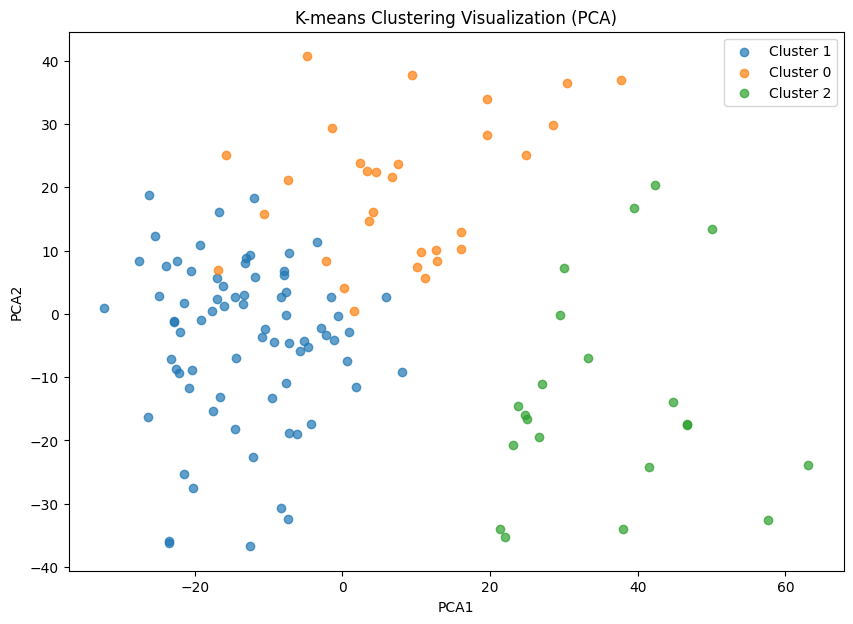

In [119]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Step 1: PCA를 사용해 2D로 차원 축소
pca = PCA(n_components=2)
reduced_features = pca.fit_transform(scaled_features)

# Step 2: 결과를 DataFrame으로 변환 (시각화를 위해)
reduced_df = pd.DataFrame(reduced_features, columns=['PCA1', 'PCA2'])
reduced_df['Cluster'] = pivot_df['Cluster']

# Step 3: 클러스터별로 색상 구분하여 시각화
plt.figure(figsize=(10, 7))
for cluster in reduced_df['Cluster'].unique():
    cluster_data = reduced_df[reduced_df['Cluster'] == cluster]
    plt.scatter(cluster_data['PCA1'], cluster_data['PCA2'], label=f'Cluster {cluster}', alpha=0.7)

plt.title('K-means Clustering Visualization (PCA)')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.legend()
plt.show()

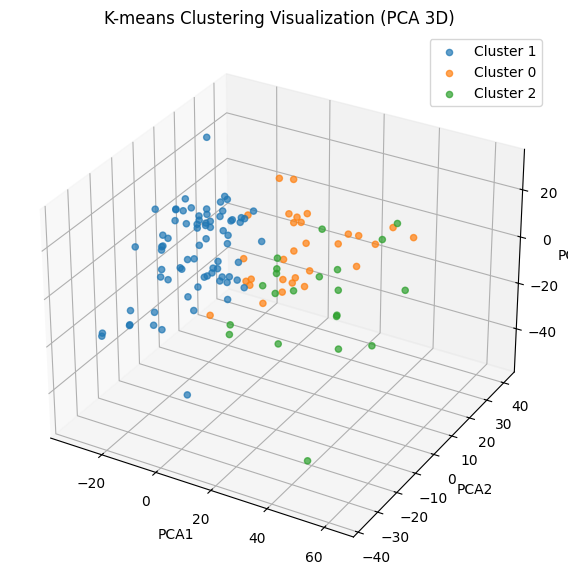

In [120]:
from mpl_toolkits.mplot3d import Axes3D

# Step 1: PCA를 사용해 3D로 차원 축소
pca_3d = PCA(n_components=3)
reduced_features_3d = pca_3d.fit_transform(scaled_features)

# Step 2: 결과를 DataFrame으로 변환
reduced_df_3d = pd.DataFrame(reduced_features_3d, columns=['PCA1', 'PCA2', 'PCA3'])
reduced_df_3d['Cluster'] = pivot_df['Cluster']

# Step 3: 3D 시각화
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

for cluster in reduced_df_3d['Cluster'].unique():
    cluster_data = reduced_df_3d[reduced_df_3d['Cluster'] == cluster]
    ax.scatter(cluster_data['PCA1'], cluster_data['PCA2'], cluster_data['PCA3'], label=f'Cluster {cluster}', alpha=0.7)

ax.set_title('K-means Clustering Visualization (PCA 3D)')
ax.set_xlabel('PCA1')
ax.set_ylabel('PCA2')
ax.set_zlabel('PCA3')
ax.legend()
plt.show()

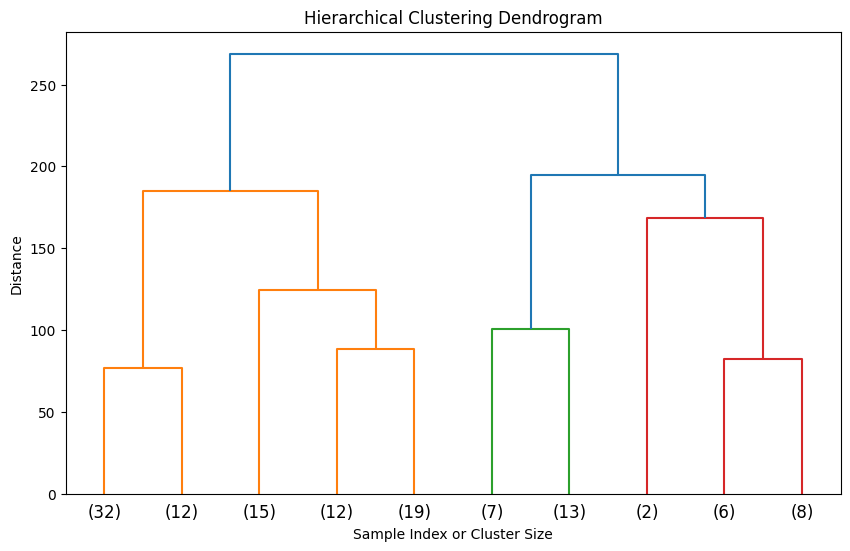

     Identity_ID  Cluster_Hierarchical
0          10101                     1
1          10102                     1
2          10103                     1
3          10104                     1
4          10105                     1
..           ...                   ...
121        11206                     2
122        11207                     1
123        11208                     1
124        11209                     1
125        11210                     2

[126 rows x 2 columns]


In [121]:
from scipy.cluster.hierarchy import linkage, fcluster
from scipy.cluster.hierarchy import dendrogram
import matplotlib.pyplot as plt

# Step 4: Hierarchical Clustering
linkage_matrix = linkage(scaled_features, method='ward')  # Ward 방법 사용
pivot_df['Cluster_Hierarchical'] = fcluster(linkage_matrix, t=3, criterion='maxclust')  # 클러스터 개수 3개 설정

# Step 5: 덴드로그램 시각화
plt.figure(figsize=(10, 6))
dendrogram(linkage_matrix, truncate_mode='lastp', p=10, show_leaf_counts=True)
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Sample Index or Cluster Size")
plt.ylabel("Distance")
plt.show()

# Step 6: 클러스터링 결과 출력
print(pivot_df[['Identity_ID', 'Cluster_Hierarchical']])

In [122]:
# Step 6: 결과 저장
output_df = pivot_df[['Identity_ID', 'Cluster', 'Cluster_Hierarchical']]
output_df = output_df.merge(identity_print_df[['Identity_ID', 'Name']], on='Identity_ID', how='left')  # 이름 추가

# CSV 파일로 저장
output_df.to_csv('./csv/clustering_results_add_std_power.csv', index=False, encoding='utf-8-sig')

print("클러스터링 결과가 'clustering_results_add_std_power.csv' 파일로 저장되었습니다.")

클러스터링 결과가 'clustering_results_add_std_power.csv' 파일로 저장되었습니다.


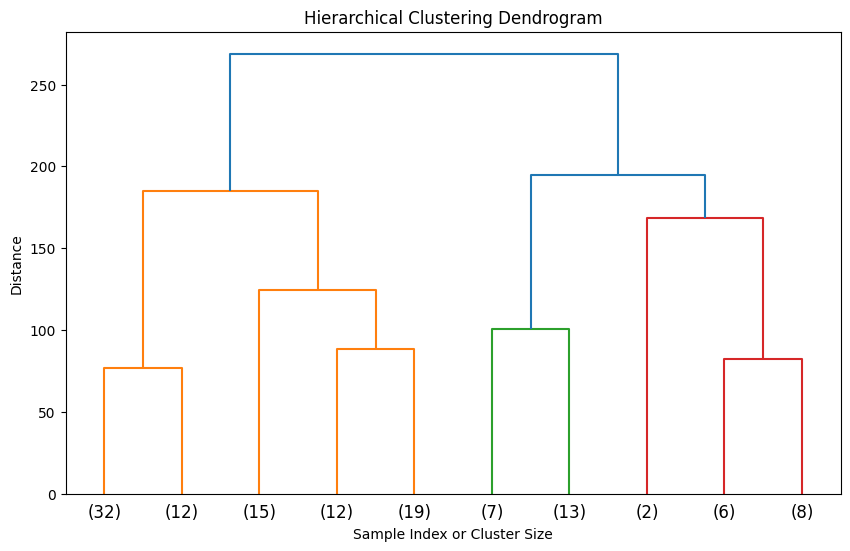

     Identity_ID  Cluster_Hierarchical
0          10101                     1
1          10102                     1
2          10103                     1
3          10104                     1
4          10105                     1
..           ...                   ...
121        11206                     2
122        11207                     1
123        11208                     1
124        11209                     1
125        11210                     2

[126 rows x 2 columns]


In [143]:
from scipy.cluster.hierarchy import linkage, fcluster
from scipy.cluster.hierarchy import dendrogram
import matplotlib.pyplot as plt

# Step 4: Hierarchical Clustering
linkage_matrix = linkage(scaled_features, method='ward')  # Ward 방법 사용
pivot_df['Cluster_Hierarchical'] = fcluster(linkage_matrix, t=3, criterion='maxclust')  # 클러스터 개수 3개 설정

# Step 5: 덴드로그램 시각화
plt.figure(figsize=(10, 6))
dendrogram(linkage_matrix, truncate_mode='lastp', p=10, show_leaf_counts=True)
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Sample Index or Cluster Size")
plt.ylabel("Distance")
plt.show()

# Step 6: 클러스터링 결과 출력
print(pivot_df[['Identity_ID', 'Cluster_Hierarchical']])

In [145]:
# Cluster별 카운트 계산 후 각 행에 추가
Cluster_Count = pivot_df['Cluster'].value_counts()
Cluster_Hierarchical_Count = pivot_df['Cluster_Hierarchical'].value_counts()

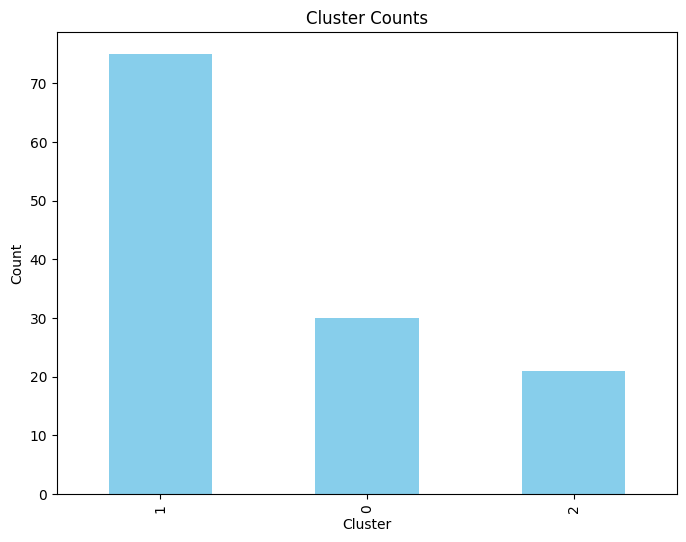

In [131]:
# 막대 그래프 그리기
Cluster_Count.plot(kind='bar', color='skyblue', figsize=(8, 6))
plt.title('Cluster Counts')
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.show()

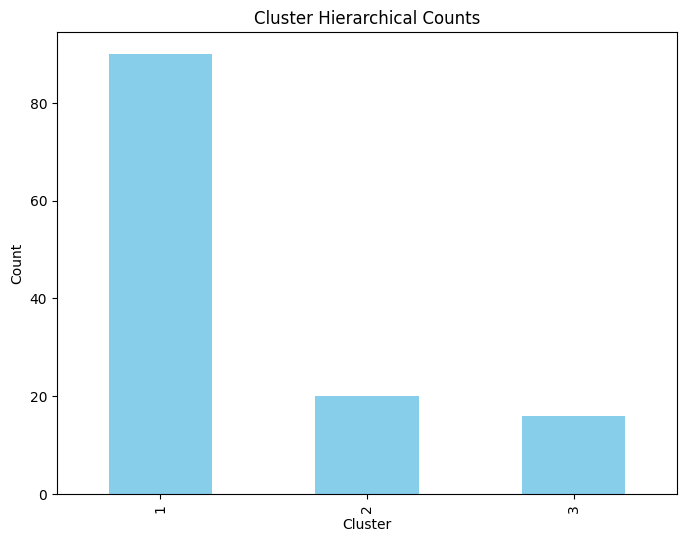

In [146]:
# 막대 그래프 그리기
Cluster_Hierarchical_Count.plot(kind='bar', color='skyblue', figsize=(8, 6))
plt.title('Cluster Hierarchical Counts')
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.show()

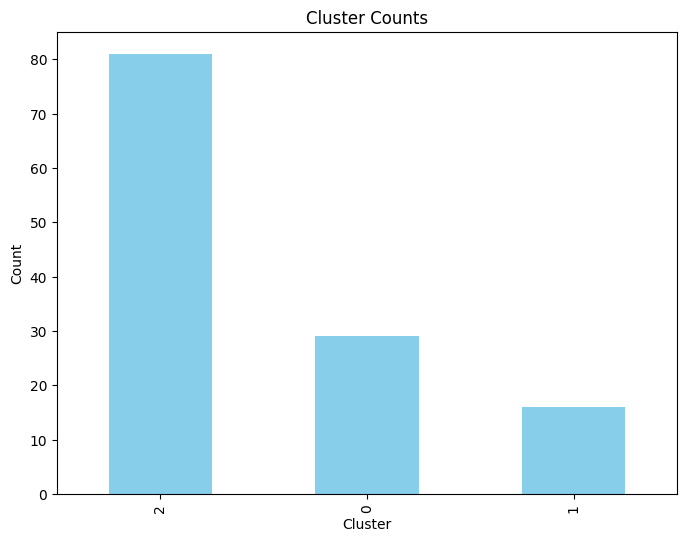

In [159]:
Cluster_Count = pivot_df['Cluster'].value_counts()
# 막대 그래프 그리기
Cluster_Count.plot(kind='bar', color='skyblue', figsize=(8, 6))
plt.title('Cluster Counts')
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.show()

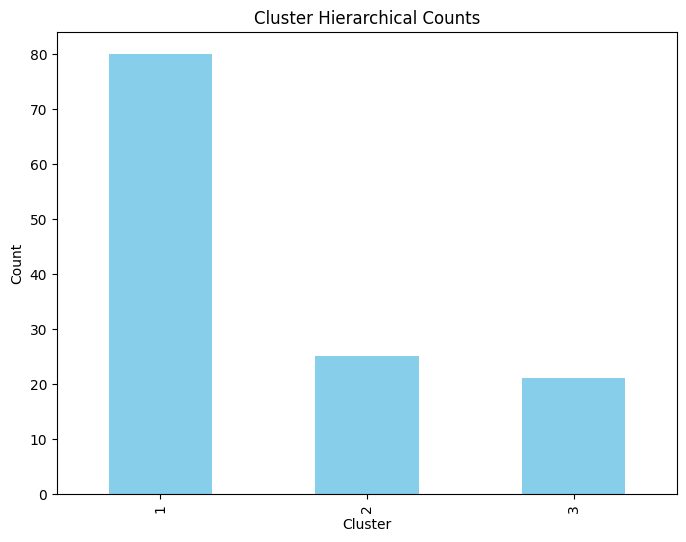

In [163]:
Cluster_Hierarchical_Count = pivot_df['Cluster_Hierarchical'].value_counts()
# 막대 그래프 그리기
Cluster_Hierarchical_Count.plot(kind='bar', color='skyblue', figsize=(8, 6))
plt.title('Cluster Hierarchical Counts')
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.show()

In [19]:
skill_text_anlaysis_df

Identity_ID Skill_Code Skill_Type Sin_Affinity            Skill_Name  \
0           10101    SKILL 1      SLASH        Gloom               Deflect   
1           10101    SKILL 1      SLASH        Gloom               Deflect   
2           10101    SKILL 1      SLASH        Gloom               Deflect   
3           10101    SKILL 1      SLASH        Gloom               Deflect   
4           10101    SKILL 2  PENETRATE         Envy         End-stop Stab   
...           ...        ...        ...          ...                   ...   
1813        11210    SKILL 3        HIT         Lust  The Unforgivable Sin   
1814        11210    DEFENSE      GUARD         Lust        Faded Patience   
1815        11210    DEFENSE      GUARD         Lust        Faded Patience   
1816        11210    DEFENSE      GUARD         Lust        Faded Patience   
1817        11210    DEFENSE      GUARD         Lust        Faded Patience   

      Coin_Count Init_Remain  Atk_Weight  Uptie_Level  Skill_Power  \
0              1          3x           1            1            2   
1              1          3x           1            2            2   
2              1          3x           1            3            3   
3              1          3x           1            4            4   
4              2          2x           1            1            3   
...          ...         ...         ...          ...          ...   
1813           3          1x           1            4            5   
1814           1          -1           0            1           15   
1815           1          -1           0            2           15   
1816           1          -1           0            3           15   
1817           1          -1           0            4           15   

      Coin_Power                                        Effect_Data  
0              7  {"[Coin 1 Heads Hit]": [], "[Heads Hit]": ["In...  
1              7  {"[Coin 1 Heads Hit]": [], "[Heads Hit]": ["In...  
2              7  {"[Coin 1 Heads Hit]": [], "[Heads Hit]": ["In...  
3              7  {"[Coin 1 On Hit]": [], "[On Hit]": ["Inflict ...  
4              4  {"[Coin 2 Heads Hit]": [], "[Heads Hit]": ["In...  
...          ...                                                ...  
1813           4  {"[On Use]": ["Deal + 1 . 5 % more damage for ...  
1814           5  {"[Combat Start]": ["Gain 3 keyword:WornHeartG...  
1815           5  {"[Combat Start]": ["Gain 3 keyword:WornHeartG...  
1816           5  {"[Combat Start]": ["Gain 3 keyword:WornHeartG...  
1817           5  {"[Combat Start]": ["At 40 %+ HP , gain 5 keyw...  

[1818 rows x 12 columns]

In [30]:
# 결과 데이터프레임 확인
skill_crawl_analysis_df = skill_text_analysis_df[['Identity_ID', 'Skill_Code', 'Uptie_Level', 'Effect_Data']]

NameError: name 'skill_text_analysis_df' is not defined

In [29]:
skill_crawl_analysis_df= skill_crawl_anlaysis_df.copy()

In [16]:
# CSV 파일로 저장
#skill_crawl_analaysis_df.to_csv('./csv/skill_crawl_anlaysis.csv', index=False, encoding='utf-8-sig')

#print("클러스터링 결과가 'skill_crawl_anlaysis.csv' 파일로 저장되었습니다.")

In [2]:
keywords_df = pd.read_csv('./csv/Keywords.csv')

In [3]:
keywords_df

Keyword  \
0                       Burst   
1                     Sinking   
2                    WildHunt   
3                ReloadLament   
4                   Paralysis   
..                        ...   
115                  Talisman   
116           SadLamanchaland   
117  DuelDeclaration_Sinclair   
118                  AaCePbBf   
119                 Vibration   

                                               Explain Dispellable  
0    ['When hit by an attack, take fixed damage by ...        True  
1    ['When hit by an attack, take fixed SP damage ...        True  
2    ['- In the same turn this unit gained Wild Hun...         NaN  
3    ['- Effect applied to The Living & The Departe...       False  
4    ['Fix the Power of Coins to 0 for one turn, wi...        True  
..                                                 ...         ...  
115  ['On hit, inflict Rupture by the Count; When h...        True  
116  ['- Max Value: 1', '- Clash Power +1', '- Deal...         NaN  
117  ['- In a Clash between the unit that inflicted...         NaN  
118  ['- Panic', '- Turn Start: Gain 2 Attack Power...       False  
119  ['When attacked by skills that trigger Tremor ...        True  

[120 rows x 3 columns]

In [4]:
keywords_rm_dispell_df = keywords_df.copy()[["Keyword","Explain"]]

In [5]:
keywords_rm_dispell_df

Keyword  \
0                       Burst   
1                     Sinking   
2                    WildHunt   
3                ReloadLament   
4                   Paralysis   
..                        ...   
115                  Talisman   
116           SadLamanchaland   
117  DuelDeclaration_Sinclair   
118                  AaCePbBf   
119                 Vibration   

                                               Explain  
0    ['When hit by an attack, take fixed damage by ...  
1    ['When hit by an attack, take fixed SP damage ...  
2    ['- In the same turn this unit gained Wild Hun...  
3    ['- Effect applied to The Living & The Departe...  
4    ['Fix the Power of Coins to 0 for one turn, wi...  
..                                                 ...  
115  ['On hit, inflict Rupture by the Count; When h...  
116  ['- Max Value: 1', '- Clash Power +1', '- Deal...  
117  ['- In a Clash between the unit that inflicted...  
118  ['- Panic', '- Turn Start: Gain 2 Attack Power...  
119  ['When attacked by skills that trigger Tremor ...  

[120 rows x 2 columns]

In [62]:
!pip install transformers

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.7/9.7 MB 11.3 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 10.7 MB/s eta 0:00:00a 0:00:01


In [31]:
import ast
def parse_effect_data(effect_data):
    try:
        parsed_data = ast.literal_eval(effect_data)
        return parsed_data
    except Exception as e:
        return {}

skill_crawl_analysis_df["Parsed_Effect_Data"] = skill_crawl_analysis_df["Effect_Data"].apply(parse_effect_data)
print(skill_crawl_analysis_df[["Skill_Code", "Uptie_Level", "Parsed_Effect_Data"]])

     Skill_Code  Uptie_Level  \
0       SKILL 1            1   
1       SKILL 1            2   
2       SKILL 1            3   
3       SKILL 1            4   
4       SKILL 2            1   
...         ...          ...   
1812    SKILL 3            4   
1813    DEFENSE            1   
1814    DEFENSE            2   
1815    DEFENSE            3   
1816    DEFENSE            4   

                                     Parsed_Effect_Data  
0     {'[Coin 1 Heads Hit]': ['Inflict 1 keyword:Sin...  
1     {'[Coin 1 Heads Hit]': ['Inflict 2 keyword:Sin...  
2     {'[Coin 1 Heads Hit]': ['Inflict 2 keyword:Sin...  
3     {'[Coin 1 On Hit]': ['Inflict 2 keyword:Sinkin...  
4     {'[Coin 2 Heads Hit]': ['Inflict + 1 keyword:S...  
...                                                 ...  
1812  {'[Pre Setup]': ['On Hit with this Skill: heal...  
1813  {'[Combat Start]': ['Gain 3 keyword:WornHeartG...  
1814  {'[Combat Start]': ['Gain 3 keyword:WornHeartG...  
1815  {'[Combat Start]': ['Gain 3 k

In [34]:
import re

# 조건과 키워드 추출
def extract_conditions_and_keywords(parsed_effect_data):
    conditions_and_keywords = []
    for condition, effects in parsed_effect_data.items():
        for effect in effects:
            # Effect 문자열 내부의 keyword 값도 소문자로 변환
            effect_lowered = re.sub(r"keyword:([a-zA-Z_]+)", lambda m: f"keyword:{m.group(1).lower()}", effect)
            
            # 키워드 추출 후 소문자로 변환
            keywords = [keyword.lower() for keyword in re.findall(r"keyword:([a-zA-Z_]+)", effect)]
            
            # 최종 결과 추가
            conditions_and_keywords.append({
                "Condition": condition, 
                "Effect": effect_lowered, 
                "Keywords": keywords
            })
    return conditions_and_keywords



# 조건-키워드 데이터 확장
skill_crawl_analysis_df["Condition_Keyword_Data"] = skill_crawl_analysis_df["Parsed_Effect_Data"].apply(
    extract_conditions_and_keywords
)

# 확장된 데이터 확인
print(skill_crawl_analysis_df[["Skill_Code", "Uptie_Level", "Condition_Keyword_Data"]])

     Skill_Code  Uptie_Level  \
0       SKILL 1            1   
1       SKILL 1            2   
2       SKILL 1            3   
3       SKILL 1            4   
4       SKILL 2            1   
...         ...          ...   
1812    SKILL 3            4   
1813    DEFENSE            1   
1814    DEFENSE            2   
1815    DEFENSE            3   
1816    DEFENSE            4   

                                 Condition_Keyword_Data  
0     [{'Condition': '[Coin 1 Heads Hit]', 'Effect':...  
1     [{'Condition': '[Coin 1 Heads Hit]', 'Effect':...  
2     [{'Condition': '[Coin 1 Heads Hit]', 'Effect':...  
3     [{'Condition': '[Coin 1 On Hit]', 'Effect': 'I...  
4     [{'Condition': '[Coin 2 Heads Hit]', 'Effect':...  
...                                                 ...  
1812  [{'Condition': '[Pre Setup]', 'Effect': 'On Hi...  
1813  [{'Condition': '[Combat Start]', 'Effect': 'Ga...  
1814  [{'Condition': '[Combat Start]', 'Effect': 'Ga...  
1815  [{'Condition': '[Combat Start

In [35]:
# Condition_Keyword_Data를 행 단위로 확장
expanded_df = skill_crawl_analysis_df.explode("Condition_Keyword_Data")

# 중첩된 딕셔너리를 개별 열로 확장
expanded_df = pd.concat(
    [
        expanded_df.drop(columns=["Condition_Keyword_Data"]),
        expanded_df["Condition_Keyword_Data"].apply(pd.Series)
    ],
    axis=1
)

# 결과 확인
print(expanded_df[["Skill_Code", "Uptie_Level", "Condition", "Effect", "Keywords"]])

     Skill_Code  Uptie_Level           Condition  \
0       SKILL 1            1  [Coin 1 Heads Hit]   
1       SKILL 1            2  [Coin 1 Heads Hit]   
2       SKILL 1            3  [Coin 1 Heads Hit]   
3       SKILL 1            4     [Coin 1 On Hit]   
4       SKILL 2            1  [Coin 2 Heads Hit]   
...         ...          ...                 ...   
1814    DEFENSE            2      [Combat Start]   
1815    DEFENSE            3      [Combat Start]   
1816    DEFENSE            4      [Combat Start]   
1816    DEFENSE            4      [Combat Start]   
1816    DEFENSE            4      [Combat Start]   

                                                 Effect  \
0                             Inflict 1 keyword:sinking   
1                             Inflict 2 keyword:sinking   
2                             Inflict 2 keyword:sinking   
3                             Inflict 2 keyword:sinking   
4                     Inflict + 1 keyword:sinking Count   
...                  

In [36]:
skill_crawl_analysis_df

Identity_ID Skill_Code  Uptie_Level  \
0           10101    SKILL 1            1   
1           10101    SKILL 1            2   
2           10101    SKILL 1            3   
3           10101    SKILL 1            4   
4           10101    SKILL 2            1   
...           ...        ...          ...   
1812        11210    SKILL 3            4   
1813        11210    DEFENSE            1   
1814        11210    DEFENSE            2   
1815        11210    DEFENSE            3   
1816        11210    DEFENSE            4   

                                            Effect_Data  \
0     {"[Coin 1 Heads Hit]": ["Inflict 1 keyword:Sin...   
1     {"[Coin 1 Heads Hit]": ["Inflict 2 keyword:Sin...   
2     {"[Coin 1 Heads Hit]": ["Inflict 2 keyword:Sin...   
3     {"[Coin 1 On Hit]": ["Inflict 2 keyword:Sinkin...   
4     {"[Coin 2 Heads Hit]": ["Inflict + 1 keyword:S...   
...                                                 ...   
1812  {"[Pre Setup]": ["On Hit with this Skill: heal...   
1813  {"[Combat Start]": ["Gain 3 keyword:WornHeartG...   
1814  {"[Combat Start]": ["Gain 3 keyword:WornHeartG...   
1815  {"[Combat Start]": ["Gain 3 keyword:WornHeartG...   
1816  {"[Combat Start]": ["At 40 %+ HP , gain 5 keyw...   

                                     Parsed_Effect_Data  \
0     {'[Coin 1 Heads Hit]': ['Inflict 1 keyword:Sin...   
1     {'[Coin 1 Heads Hit]': ['Inflict 2 keyword:Sin...   
2     {'[Coin 1 Heads Hit]': ['Inflict 2 keyword:Sin...   
3     {'[Coin 1 On Hit]': ['Inflict 2 keyword:Sinkin...   
4     {'[Coin 2 Heads Hit]': ['Inflict + 1 keyword:S...   
...                                                 ...   
1812  {'[Pre Setup]': ['On Hit with this Skill: heal...   
1813  {'[Combat Start]': ['Gain 3 keyword:WornHeartG...   
1814  {'[Combat Start]': ['Gain 3 keyword:WornHeartG...   
1815  {'[Combat Start]': ['Gain 3 keyword:WornHeartG...   
1816  {'[Combat Start]': ['At 40 %+ HP , gain 5 keyw...   

                                 Condition_Keyword_Data  
0     [{'Condition': '[Coin 1 Heads Hit]', 'Effect':...  
1     [{'Condition': '[Coin 1 Heads Hit]', 'Effect':...  
2     [{'Condition': '[Coin 1 Heads Hit]', 'Effect':...  
3     [{'Condition': '[Coin 1 On Hit]', 'Effect': 'I...  
4     [{'Condition': '[Coin 2 Heads Hit]', 'Effect':...  
...                                                 ...  
1812  [{'Condition': '[Pre Setup]', 'Effect': 'On Hi...  
1813  [{'Condition': '[Combat Start]', 'Effect': 'Ga...  
1814  [{'Condition': '[Combat Start]', 'Effect': 'Ga...  
1815  [{'Condition': '[Combat Start]', 'Effect': 'Ga...  
1816  [{'Condition': '[Combat Start]', 'Effect': 'At...  

[1817 rows x 6 columns]

In [37]:
expanded_df['Condition'] = expanded_df['Condition'].fillna('No Condition')
expanded_df['Effect'] = expanded_df['Effect'].fillna('No Effect')
expanded_df['Keywords'] = expanded_df['Keywords'].fillna('No Keywords')

In [38]:
# 병합 전에 Keywords를 문자열로 변환
expanded_df["Keywords"] = expanded_df["Keywords"].apply(lambda x: ",".join(x) if isinstance(x, list) else x)
keywords_rm_dispell_df["Keyword"] = keywords_rm_dispell_df["Keyword"].apply(lambda x: x.lower() if isinstance(x, str) else x)

# 병합 수행
merged_df = expanded_df.merge(
    keywords_rm_dispell_df,
    left_on="Keywords",
    right_on="Keyword",
    how="left"
)

# Keyword와 Explain이 NaN인 경우, 'No Keyword'와 'No Explain'으로 채우기
merged_df['Keyword'] = merged_df['Keyword'].fillna('No Keyword')
merged_df['Explain'] = merged_df['Explain'].fillna('No Explain')

# 주요 열 선택
merged_result = merged_df[["Skill_Code", "Uptie_Level", "Condition", "Keywords", "Explain", "Effect"]]

# 결과 출력
print(merged_result)

     Skill_Code  Uptie_Level           Condition  \
0       SKILL 1            1  [Coin 1 Heads Hit]   
1       SKILL 1            2  [Coin 1 Heads Hit]   
2       SKILL 1            3  [Coin 1 Heads Hit]   
3       SKILL 1            4     [Coin 1 On Hit]   
4       SKILL 2            1  [Coin 2 Heads Hit]   
...         ...          ...                 ...   
5260    DEFENSE            2      [Combat Start]   
5261    DEFENSE            3      [Combat Start]   
5262    DEFENSE            4      [Combat Start]   
5263    DEFENSE            4      [Combat Start]   
5264    DEFENSE            4      [Combat Start]   

                              Keywords  \
0                              sinking   
1                              sinking   
2                              sinking   
3                              sinking   
4                              sinking   
...                                ...   
5260                     wornheartgreg   
5261                     wornheartgreg 

In [39]:
# 리스트를 문자열로 변환
merged_df["Explain"] = merged_df["Explain"].apply(
    lambda x: " ".join(x) if isinstance(x, list) else x
)

# 변환된 결과 확인
print(merged_df[["Explain", "Effect"]])

                                                Explain  \
0     ['When hit by an attack, take fixed SP damage ...   
1     ['When hit by an attack, take fixed SP damage ...   
2     ['When hit by an attack, take fixed SP damage ...   
3     ['When hit by an attack, take fixed SP damage ...   
4     ['When hit by an attack, take fixed SP damage ...   
...                                                 ...   
5260  ['- Max Value: 10', '- Turn End: gain 1 Stack'...   
5261  ['- Max Value: 10', '- Turn End: gain 1 Stack'...   
5262                                         No Explain   
5263  ['- Max Value: 999', '- Stores all Bleed damag...   
5264  ['- Max Value: 10', '- Turn End: gain 1 Stack'...   

                                                 Effect  
0                             Inflict 1 keyword:sinking  
1                             Inflict 2 keyword:sinking  
2                             Inflict 2 keyword:sinking  
3                             Inflict 2 keyword:sinking  
4

In [40]:
expanded_df = merged_df.copy()

In [33]:
# 결과 출력
print(merged_df[['Skill_Code', 'Uptie_Level', 'Condition', 'Effect', 'Keywords', 'Keyword', 'Explain']])

     Skill_Code  Uptie_Level       Condition  \
0       SKILL 1            1     [Heads Hit]   
1       SKILL 1            2     [Heads Hit]   
2       SKILL 1            3     [Heads Hit]   
3       SKILL 1            4        [On Hit]   
4       SKILL 2            1     [Heads Hit]   
...         ...          ...             ...   
4675    DEFENSE            2  [Combat Start]   
4676    DEFENSE            3  [Combat Start]   
4677    DEFENSE            4  [Combat Start]   
4678    DEFENSE            4  [Combat Start]   
4679    DEFENSE            4  [Combat Start]   

                                                 Effect       Keywords  \
0                             Inflict 1 keyword:sinking        sinking   
1                             Inflict 2 keyword:sinking        sinking   
2                             Inflict 2 keyword:sinking        sinking   
3                             Inflict 2 keyword:sinking        sinking   
4                     Inflict + 1 keyword:sinking Cou

In [41]:
# CSV 파일로 저장
merged_df.to_csv('./csv/merged_df.csv', index=False, encoding='utf-8-sig')

print("클러스터링 결과가 'merged_df.csv' 파일로 저장되었습니다.")

클러스터링 결과가 'merged_df.csv' 파일로 저장되었습니다.


In [42]:
# 'Explain' 컬럼이 리스트일 경우, 이를 문자열로 합치는 작업
merged_df['Explain'] = merged_df['Explain'].apply(lambda x: ' '.join(x) if isinstance(x, list) else x)

# 결과 확인
print(merged_df[['Keyword', 'Explain']].head())

   Keyword                                            Explain
0  sinking  ['When hit by an attack, take fixed SP damage ...
1  sinking  ['When hit by an attack, take fixed SP damage ...
2  sinking  ['When hit by an attack, take fixed SP damage ...
3  sinking  ['When hit by an attack, take fixed SP damage ...
4  sinking  ['When hit by an attack, take fixed SP damage ...


In [43]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5265 entries, 0 to 5264
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Identity_ID         5265 non-null   int64  
 1   Skill_Code          5265 non-null   object 
 2   Uptie_Level         5265 non-null   int64  
 3   Effect_Data         5265 non-null   object 
 4   Parsed_Effect_Data  5265 non-null   object 
 5   Condition           5265 non-null   object 
 6   Effect              5265 non-null   object 
 7   Keywords            5265 non-null   object 
 8   0                   0 non-null      float64
 9   Keyword             5265 non-null   object 
 10  Explain             5265 non-null   object 
dtypes: float64(1), int64(2), object(8)
memory usage: 452.6+ KB


In [44]:
merged_df = merged_df.drop(columns=[merged_df.columns[8]])

In [45]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5265 entries, 0 to 5264
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Identity_ID         5265 non-null   int64 
 1   Skill_Code          5265 non-null   object
 2   Uptie_Level         5265 non-null   int64 
 3   Effect_Data         5265 non-null   object
 4   Parsed_Effect_Data  5265 non-null   object
 5   Condition           5265 non-null   object
 6   Effect              5265 non-null   object
 7   Keywords            5265 non-null   object
 8   Keyword             5265 non-null   object
 9   Explain             5265 non-null   object
dtypes: int64(2), object(8)
memory usage: 411.5+ KB


In [46]:
# CSV 파일로 저장
merged_df.to_csv('./csv/merged_df.csv', index=False, encoding='utf-8-sig')

print("클러스터링 결과가 'merged_df.csv' 파일로 저장되었습니다.")

클러스터링 결과가 'merged_df.csv' 파일로 저장되었습니다.


In [47]:
# 결과 출력
print(merged_df[['Skill_Code', 'Uptie_Level', 'Condition', 'Effect', 'Keywords', 'Keyword', 'Explain']])

     Skill_Code  Uptie_Level           Condition  \
0       SKILL 1            1  [Coin 1 Heads Hit]   
1       SKILL 1            2  [Coin 1 Heads Hit]   
2       SKILL 1            3  [Coin 1 Heads Hit]   
3       SKILL 1            4     [Coin 1 On Hit]   
4       SKILL 2            1  [Coin 2 Heads Hit]   
...         ...          ...                 ...   
5260    DEFENSE            2      [Combat Start]   
5261    DEFENSE            3      [Combat Start]   
5262    DEFENSE            4      [Combat Start]   
5263    DEFENSE            4      [Combat Start]   
5264    DEFENSE            4      [Combat Start]   

                                                 Effect  \
0                             Inflict 1 keyword:sinking   
1                             Inflict 2 keyword:sinking   
2                             Inflict 2 keyword:sinking   
3                             Inflict 2 keyword:sinking   
4                     Inflict + 1 keyword:sinking Count   
...                  

In [48]:
expanded_df = merged_df.copy()

In [49]:
# Skill_Code와 Uptie_Level에 따른 분포
print(expanded_df['Skill_Code'].value_counts())
print(expanded_df['Uptie_Level'].value_counts())

# Effect 및 Keywords에 대한 분포
print(expanded_df['Effect'].value_counts())
print(expanded_df['Keywords'].value_counts())

Skill_Code
SKILL 2           1787
SKILL 1           1279
SKILL 3           1202
DEFENSE            667
AWAKED SKILL 3     148
AWAKED DEFENSE      78
AWAKED SKILL 2      59
AWAKED SKILL 1      45
Name: count, dtype: int64
Uptie_Level
4    1872
3    1616
2     991
1     786
Name: count, dtype: int64
Effect
No Effect                                                                                                      228
Inflict 1 keyword:laceration                                                                                   153
Inflict 2 keyword:laceration                                                                                   119
Gain + 2 keyword:breath Count                                                                                  107
Inflict 1 keyword:burst                                                                                         99
                                                                                                              ... 
Gain

In [50]:
# Keywords의 빈도 분석
keyword_counts = expanded_df['Keywords'].value_counts()
print(keyword_counts)
# 'keyword_counts' 계산한 후에, 이를 'keywords'와 결합한 DataFrame을 생성합니다.
keyword_counts = expanded_df['Keywords'].value_counts().reset_index()
keyword_counts.columns = ['Keyword', 'Count']  # 열 이름 설정
# CSV로 저장
keyword_counts.to_csv('keyword_counts_with_keywords.csv', index=False)
# CSV 파일로 저장
keyword_counts.to_csv('./csv/keyword_counts.csv', index=False, encoding='utf-8-sig')

print("클러스터링 결과가 'keyword_counts.csv' 파일로 저장되었습니다.")

Keywords
                               518
laceration                     516
breath                         448
vibration                      448
burst                          357
                              ... 
violettakedamageup,charge        1
hittakedamageup,charge           1
burst,devyatdimensionalsack      1
penetratedamageup                1
blooddinner                      1
Name: count, Length: 261, dtype: int64
클러스터링 결과가 'keyword_counts.csv' 파일로 저장되었습니다.


In [51]:
# 특정 키워드가 포함된 Effect나 Condition 분석
specific_keyword = 'laceration'  # 예시 키워드
laceration_related = expanded_df[expanded_df['Keywords'].str.contains(specific_keyword)]
print(laceration_related[['Skill_Code', 'Effect', 'Condition']])

     Skill_Code                                             Effect  \
188     SKILL 1                       Inflict 2 keyword:laceration   
191     SKILL 1                       Inflict 2 keyword:laceration   
194     SKILL 1                       Inflict 2 keyword:laceration   
197     SKILL 1                       Inflict 2 keyword:laceration   
200     SKILL 2                       Inflict 1 keyword:laceration   
...         ...                                                ...   
5250    SKILL 3  If the target has 6 + keyword:laceration , Coi...   
5252    SKILL 3                         Gain 10 keyword:laceration   
5255    SKILL 3               Inflict + 2 keyword:laceration Count   
5257    SKILL 3                       Inflict 2 keyword:laceration   
5262    DEFENSE  At 40 %+ HP , gain 5 keyword:laceration and ac...   

               Condition  
188   [Coin 2 Heads Hit]  
191      [Coin 2 On Hit]  
194      [Coin 2 On Hit]  
197      [Coin 2 On Hit]  
200      [Coin 2 On Hit]

In [52]:
# 특정 키워드가 포함된 Effect나 Condition 분석
specific_keyword = 'vibration'  # 예시 키워드
vibration_related = expanded_df[expanded_df['Keywords'].str.contains(specific_keyword)]
print(vibration_related[['Skill_Code', 'Effect', 'Condition']])

     Skill_Code                                             Effect  \
56      SKILL 1                   Gain + 2 keyword:vibration Count   
59      SKILL 1                   Gain + 3 keyword:vibration Count   
62      SKILL 1                   Gain + 3 keyword:vibration Count   
65      SKILL 1                   Gain + 3 keyword:vibration Count   
68      SKILL 2  Spend 6 keyword:vibration Count to turn this i...   
...         ...                                                ...   
4998    SKILL 2                Inflict + 2 keyword:vibration Count   
5000    SKILL 3  Trigger keyword:vibrationexplosion , then redu...   
5006    SKILL 3  Trigger keyword:vibrationexplosion , then redu...   
5010    SKILL 3  If target has 5 + keyword:vibration Count , in...   
5013    SKILL 3  If target has 5 + keyword:vibration Count, inf...   

            Condition  
56           [On Use]  
59           [On Use]  
62           [On Use]  
65           [On Use]  
68     [Combat Start]  
...            

In [53]:
# 특정 키워드가 포함된 Effect나 Condition 분석
specific_keyword = 'breath'  # 예시 키워드
breath_related = expanded_df[expanded_df['Keywords'].str.contains(specific_keyword)]
print(breath_related[['Skill_Code', 'Effect', 'Condition']])

     Skill_Code                                             Effect  \
40      SKILL 1                    Gain 1 keyword:breath next turn   
41      SKILL 1                    Gain 3 keyword:breath next turn   
42      SKILL 1                    Gain 3 keyword:breath next turn   
43      SKILL 1                      Gain + 2 keyword:breath Count   
44      SKILL 1                    Gain 3 keyword:breath next turn   
...         ...                                                ...   
5092    SKILL 3  Gain 1 keyword:breath for every 3 keyword:lace...   
5097    DEFENSE             Gain 1 keyword:breath (Max 3 per turn)   
5098    DEFENSE             Gain 1 keyword:breath (Max 3 per turn)   
5099    DEFENSE             Gain 1 keyword:breath (Max 3 per turn)   
5100    DEFENSE             Gain 1 keyword:breath (Max 5 per turn)   

               Condition  
40    [Coin 1 Heads Hit]  
41       [Coin 1 On Hit]  
42       [Coin 1 On Hit]  
43              [On Use]  
44       [Coin 1 On Hit]

In [54]:
# 특정 키워드가 포함된 Effect나 Condition 분석
specific_keyword = 'burst'  # 예시 키워드
burst_related = expanded_df[expanded_df['Keywords'].str.contains(specific_keyword)]
print(burst_related[['Skill_Code', 'Effect', 'Condition']])

     Skill_Code                           Effect           Condition
16      SKILL 1          Inflict 1 keyword:burst  [Coin 1 Heads Hit]
17      SKILL 1          Inflict 2 keyword:burst  [Coin 1 Heads Hit]
18      SKILL 1          Inflict 2 keyword:burst  [Coin 1 Heads Hit]
19      SKILL 1          Inflict 2 keyword:burst  [Coin 1 Heads Hit]
26      SKILL 2    Inflict 1 keyword:burst Count         [Clash Win]
...         ...                              ...                 ...
5235    SKILL 2          Inflict 1 keyword:burst     [Coin 2 On Hit]
5245    SKILL 3  Inflict + 1 keyword:burst Count     [Coin 2 On Hit]
5247    SKILL 3          Inflict 1 keyword:burst     [Coin 3 On Hit]
5256    SKILL 3  Inflict + 2 keyword:burst Count     [Coin 2 On Hit]
5258    SKILL 3          Inflict 2 keyword:burst     [Coin 3 On Hit]

[483 rows x 3 columns]


In [55]:
# 특정 키워드가 포함된 Effect나 Condition 분석
specific_keyword = 'sinking'  # 예시 키워드
sinking_related = expanded_df[expanded_df['Keywords'].str.contains(specific_keyword)]
print(sinking_related[['Skill_Code', 'Effect', 'Condition']])

     Skill_Code                                             Effect  \
0       SKILL 1                          Inflict 1 keyword:sinking   
1       SKILL 1                          Inflict 2 keyword:sinking   
2       SKILL 1                          Inflict 2 keyword:sinking   
3       SKILL 1                          Inflict 2 keyword:sinking   
4       SKILL 2                  Inflict + 1 keyword:sinking Count   
...         ...                                                ...   
5182    SKILL 3  Absorb 10 keyword:sinking from the target and ...   
5183    DEFENSE  If the target has 5 + keyword:sinking, Coin Po...   
5184    DEFENSE  If the target has 5 + keyword:sinking, Coin Po...   
5185    DEFENSE  If the target has 5 + keyword:sinking, Coin Po...   
5186    DEFENSE  Coin Power + 1 for every 3 keyword:sinking on ...   

               Condition  
0     [Coin 1 Heads Hit]  
1     [Coin 1 Heads Hit]  
2     [Coin 1 Heads Hit]  
3        [Coin 1 On Hit]  
4     [Coin 2 Heads Hit]

In [56]:
# 특정 키워드가 포함된 Effect나 Condition 분석
specific_keyword = 'charge'  # 예시 키워드
charge_related = expanded_df[expanded_df['Keywords'].str.contains(specific_keyword)]
print(charge_related[['Skill_Code', 'Effect', 'Condition']])

     Skill_Code                                             Effect  \
142     SKILL 1                      Gain + 2 keyword:charge Count   
143     SKILL 1                      Gain + 2 keyword:charge Count   
144     SKILL 1                      Gain + 2 keyword:charge Count   
145     SKILL 1                      Gain + 2 keyword:charge Count   
147     SKILL 1                      Gain + 2 keyword:charge Count   
...         ...                                                ...   
4991    SKILL 2                      Gain + 3 keyword:charge Count   
4994    SKILL 2                      Gain + 3 keyword:charge Count   
4997    SKILL 2                      Gain + 3 keyword:charge Count   
5000    SKILL 3  Trigger keyword:vibrationexplosion , then redu...   
5006    SKILL 3  Trigger keyword:vibrationexplosion , then redu...   

            Condition  
142          [On Use]  
143   [Coin 1 On Hit]  
144          [On Use]  
145   [Coin 1 On Hit]  
147          [On Use]  
...            

In [31]:
# 특정 키워드가 포함된 Effect나 Condition 분석
specific_keyword = 'combustion'  # 예시 키워드
combustion_related = expanded_df[expanded_df['Keywords'].str.contains(specific_keyword)]
print(combustion_related[['Skill_Code', 'Effect', 'Condition']])

KeyError: "None of [Index([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,\n       ...\n       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],\n      dtype='float64', length=5265)] are in the [columns]"

In [58]:
# Condition과 Effect 간의 상관관계 분석
condition_effect_grouped = expanded_df.groupby(['Condition', 'Effect']).size().reset_index(name='Count')
print(condition_effect_grouped.sort_values(by='Count', ascending=False).head())

            Condition                                             Effect  \
0        No Condition                                          No Effect   
1338         [On Use]                      Gain + 2 keyword:breath Count   
666   [Coin 2 On Hit]                       Inflict 1 keyword:laceration   
1356         [On Use]  Gain + 3 keyword:aggro to this Skill Slot next...   
286   [Coin 1 On Hit]                              Gain 2 keyword:breath   

      Count  
0       228  
1338     78  
666      57  
1356     40  
286      37  


<Figure size 1200x600 with 0 Axes>

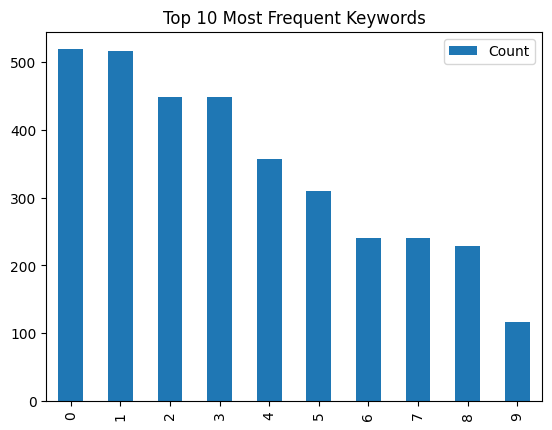

In [59]:
import matplotlib.pyplot as plt
import seaborn as sns

# Keywords의 빈도 시각화
plt.figure(figsize=(12, 6))
keyword_counts.head(10).plot(kind='bar')
plt.title('Top 10 Most Frequent Keywords')
plt.show()

In [64]:
# Uptie_Level에 따른 Effect 변화 분석
uptie_effect_grouped = expanded_df.groupby(['Uptie_Level', 'Effect']).size().reset_index(name='Count')
print(uptie_effect_grouped)

      Uptie_Level                                             Effect  Count
0               1                                       + 10% damage      1
1               1                                      + 20 % damage      1
2               1  20 % chance to Reuse Coin once . + 20 % more c...      2
3               1                           Activate keyword:retreat      2
4               1  Apply 1 Envy keyword:resultenhancement to 2 al...      1
...           ...                                                ...    ...
2649            4  keyword:discard this unit ' s Skills in descen...      1
2650            4          keyword:fullreload ( once per Encounter )      1
2651            4             keyword:reloadlament ( once per turn )      1
2652            4  keyword:reloadlament Consume 1 of keyword:bull...      1
2653            4                                  keyword:supercoin     13

[2654 rows x 3 columns]


In [61]:
keyword_counts

Keyword  Count
0                                   518
1                     laceration    516
2                         breath    448
3                      vibration    448
4                          burst    357
..                           ...    ...
256    violettakedamageup,charge      1
257       hittakedamageup,charge      1
258  burst,devyatdimensionalsack      1
259            penetratedamageup      1
260                  blooddinner      1

[261 rows x 2 columns]

<Figure size 1200x600 with 0 Axes>

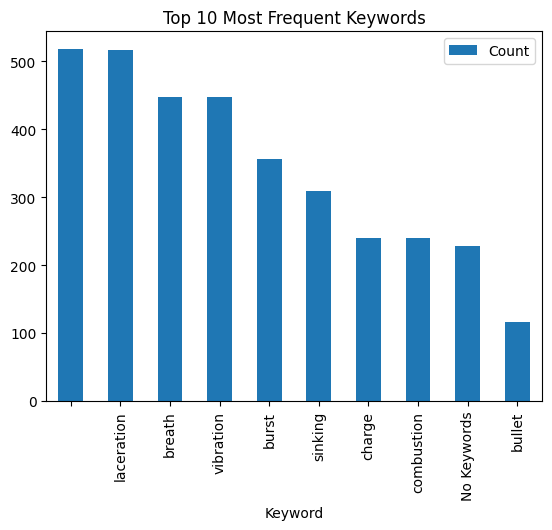

In [62]:
import matplotlib.pyplot as plt
import seaborn as sns

# Keywords의 빈도 시각화
plt.figure(figsize=(12, 6))
keyword_counts.head(10).plot(kind='bar', x='Keyword')
plt.title('Top 10 Most Frequent Keywords')
plt.show()

In [63]:
from transformers import AutoModel, AutoTokenizer
import torch

# 모델과 토크나이저 로드
model_name = "huawei-noah/TinyBERT_General_4L_312D"
model = AutoModel.from_pretrained(model_name)
tokenizer = AutoTokenizer.from_pretrained(model_name)

# 입력 텍스트 처리
input_text = "Hello, how are you?"

# 텍스트를 토큰화
inputs = tokenizer(input_text, return_tensors="pt", padding=True, truncation=True)

# 모델에 토큰화된 텍스트 입력
with torch.no_grad():  # 추론 모드
    outputs = model(**inputs)

# 마지막 히든 스테이트를 사용해 임베딩 추출
embeddings = outputs.last_hidden_state

print(embeddings)

Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.


tensor([[[-0.6031,  0.3566,  0.0645,  ..., -0.0064,  0.2260,  0.1999],
         [-0.4677, -0.2225,  0.2213,  ..., -0.6164,  0.7318, -0.0908],
         [-0.4979, -0.2012,  0.0575,  ..., -0.4393, -0.6370,  0.2486],
         ...,
         [-0.3187, -0.0887, -0.1771,  ..., -0.2057,  0.2577,  0.4425],
         [-0.5940, -0.0032, -0.3628,  ..., -0.2909,  0.4561,  0.2244],
         [-0.0437, -0.1965, -0.0011,  ..., -0.1882, -0.5084,  0.2344]]])


In [40]:
import pandas as pd
from transformers import DistilBertTokenizer, DistilBertModel
from sklearn.metrics.pairwise import cosine_similarity

# DistilBERT 모델과 토크나이저 로드
tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased')
model = DistilBertModel.from_pretrained('distilbert-base-uncased')

# 텍스트 분석 함수
def analyze_text(text):
    # 텍스트 토큰화
    inputs = tokenizer(text, return_tensors='pt')

    # 모델에 입력하여 출력 얻기
    outputs = model(**inputs)
    
    # 텍스트의 평균 임베딩 벡터 구하기
    embedding = outputs.last_hidden_state.mean(dim=1)
    
    # 텍스트 분석 결과 (여기서는 임베딩 벡터 반환)
    return embedding

# 설명 컬럼의 텍스트를 분석
expanded_df['Embedding'] = expanded_df['Explain'].apply(analyze_text)

# "No Keyword No Explain" 처리하기
expanded_df['Keyword'] = expanded_df['Keyword'].replace('No Keyword', 'No Keywords')
expanded_df['Explain'] = expanded_df['Explain'].replace('No Explain', 'No Explanation')

# 분석된 텍스트를 기반으로 감정 분석 예시 (Optional)
# 예를 들어, 각 행에 대해 감정 분석을 하고 그 결과를 추가할 수도 있습니다.
# 감정 분석을 위한 사전 훈련된 모델을 사용할 수도 있습니다.

# 예시로, 임베딩 벡터를 유사도 분석하거나 클러스터링하는 작업을 할 수 있습니다.
# 예: 두 텍스트 간의 유사도를 계산해보자

embedding1 = expanded_df['Embedding'][0].detach().numpy()
embedding2 = expanded_df['Embedding'][1].detach().numpy()

similarity = cosine_similarity(embedding1, embedding2)
print("Cosine similarity between text 1 and text 2:", similarity)

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

Cosine similarity between text 1 and text 2: [[0.9999999]]


In [41]:
expanded_df

Identity_ID Skill_Code  Uptie_Level  \
0           10101    SKILL 1            1   
1           10101    SKILL 1            2   
2           10101    SKILL 1            3   
3           10101    SKILL 1            4   
4           10101    SKILL 2            1   
...           ...        ...          ...   
4675        11210    DEFENSE            2   
4676        11210    DEFENSE            3   
4677        11210    DEFENSE            4   
4678        11210    DEFENSE            4   
4679        11210    DEFENSE            4   

                                            Effect_Data  \
0     {"[Coin 1 Heads Hit]": [], "[Heads Hit]": ["In...   
1     {"[Coin 1 Heads Hit]": [], "[Heads Hit]": ["In...   
2     {"[Coin 1 Heads Hit]": [], "[Heads Hit]": ["In...   
3     {"[Coin 1 On Hit]": [], "[On Hit]": ["Inflict ...   
4     {"[Coin 2 Heads Hit]": [], "[Heads Hit]": ["In...   
...                                                 ...   
4675  {"[Combat Start]": ["Gain 3 keyword:WornHeartG...   
4676  {"[Combat Start]": ["Gain 3 keyword:WornHeartG...   
4677  {"[Combat Start]": ["At 40 %+ HP , gain 5 keyw...   
4678  {"[Combat Start]": ["At 40 %+ HP , gain 5 keyw...   
4679  {"[Combat Start]": ["At 40 %+ HP , gain 5 keyw...   

                                     Parsed_Effect_Data       Condition  \
0     {'[Coin 1 Heads Hit]': [], '[Heads Hit]': ['In...     [Heads Hit]   
1     {'[Coin 1 Heads Hit]': [], '[Heads Hit]': ['In...     [Heads Hit]   
2     {'[Coin 1 Heads Hit]': [], '[Heads Hit]': ['In...     [Heads Hit]   
3     {'[Coin 1 On Hit]': [], '[On Hit]': ['Inflict ...        [On Hit]   
4     {'[Coin 2 Heads Hit]': [], '[Heads Hit]': ['In...     [Heads Hit]   
...                                                 ...             ...   
4675  {'[Combat Start]': ['Gain 3 keyword:WornHeartG...  [Combat Start]   
4676  {'[Combat Start]': ['Gain 3 keyword:WornHeartG...  [Combat Start]   
4677  {'[Combat Start]': ['At 40 %+ HP , gain 5 keyw...  [Combat Start]   
4678  {'[Combat Start]': ['At 40 %+ HP , gain 5 keyw...  [Combat Start]   
4679  {'[Combat Start]': ['At 40 %+ HP , gain 5 keyw...  [Combat Start]   

                                                 Effect       Keywords  \
0                             Inflict 1 keyword:sinking        sinking   
1                             Inflict 2 keyword:sinking        sinking   
2                             Inflict 2 keyword:sinking        sinking   
3                             Inflict 2 keyword:sinking        sinking   
4                     Inflict + 1 keyword:sinking Count        sinking   
...                                                 ...            ...   
4675       Gain 3 keyword:wornheartgreg (once per turn)  wornheartgreg   
4676       Gain 3 keyword:wornheartgreg (once per turn)  wornheartgreg   
4677  At 40 %+ HP , gain 5 keyword:laceration and ac...     laceration   
4678  At less than 40 % HP , consume up to 20 keywor...    blooddinner   
4679       Gain 3 keyword:wornheartgreg (once per turn)  wornheartgreg   

            Keyword                                            Explain  \
0           sinking  ['When hit by an attack, take fixed SP damage ...   
1           sinking  ['When hit by an attack, take fixed SP damage ...   
2           sinking  ['When hit by an attack, take fixed SP damage ...   
3           sinking  ['When hit by an attack, take fixed SP damage ...   
4           sinking  ['When hit by an attack, take fixed SP damage ...   
...             ...                                                ...   
4675  wornheartgreg  ['- Max Value: 10', '- Turn End: gain 1 Stack'...   
4676  wornheartgreg  ['- Max Value: 10', '- Turn End: gain 1 Stack'...   
4677     laceration  ['When tossing an attack Coin, take fixed dama...   
4678    blooddinner  ['- Max Value: 999', '- Stores all Bleed damag...   
4679  wornheartgreg  ['- Max Value: 10', '- Turn End: gain 1 Stack'...   

                                              Embedding  
0     [[tensor(0.03

In [44]:
from sklearn.cluster import KMeans
import numpy as np

# 임베딩 벡터들을 배열로 변환
embeddings_matrix = np.vstack(expanded_df['Embedding'].apply(lambda x: x.detach().numpy()))

# KMeans 군집화
kmeans = KMeans(n_clusters=4, random_state=0).fit(embeddings_matrix)
expanded_df['Cluster'] = kmeans.labels_

print(expanded_df[['Keyword', 'Explain', 'Cluster']])


            Keyword                                            Explain  \
0           sinking  ['When hit by an attack, take fixed SP damage ...   
1           sinking  ['When hit by an attack, take fixed SP damage ...   
2           sinking  ['When hit by an attack, take fixed SP damage ...   
3           sinking  ['When hit by an attack, take fixed SP damage ...   
4           sinking  ['When hit by an attack, take fixed SP damage ...   
...             ...                                                ...   
4675  wornheartgreg  ['- Max Value: 10', '- Turn End: gain 1 Stack'...   
4676  wornheartgreg  ['- Max Value: 10', '- Turn End: gain 1 Stack'...   
4677     laceration  ['When tossing an attack Coin, take fixed dama...   
4678    blooddinner  ['- Max Value: 999', '- Stores all Bleed damag...   
4679  wornheartgreg  ['- Max Value: 10', '- Turn End: gain 1 Stack'...   

      Cluster  
0           3  
1           3  
2           3  
3           3  
4           3  
...       ...  

In [46]:
keyword_groups = expanded_df.groupby('Keyword')
for keyword, group in keyword_groups:
    print(f"Keyword: {keyword}")
    print(group[['Explain']])

Keyword: No Keywords
             Explain
12    No Explanation
13    No Explanation
14    No Explanation
15    No Explanation
29    No Explanation
...              ...
4650  No Explanation
4654  No Explanation
4658  No Explanation
4664  No Explanation
4668  No Explanation

[1162 rows x 1 columns]
Keyword: aacepbbf
                                               Explain
780  ['- Panic', '- Turn Start: Gain 2 Attack Power...
Keyword: aggro
                                                Explain
234   ['In focused encounters, slots with higher Agg...
238   ['In focused encounters, slots with higher Agg...
243   ['In focused encounters, slots with higher Agg...
246   ['In focused encounters, slots with higher Agg...
248   ['In focused encounters, slots with higher Agg...
...                                                 ...
4621  ['In focused encounters, slots with higher Agg...
4627  ['In focused encounters, slots with higher Agg...
4633  ['In focused encounters, slots with higher Agg...

In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

In [7]:
identities_df = pd.read_csv('./csv/Identities.csv')
level_stats_df = pd.read_csv('./csv/level_stats_expanded.csv')
uptie_stats_df = pd.read_csv('./csv/Uptiestats.csv')
skill_crawl_analysis_df = pd.read_csv('./csv/skill_crawl_anlaysis.csv')

In [8]:
open_date = datetime.strptime("2023-02-27", "%Y-%m-%d")
identities_df['Release_Date'] = pd.to_datetime(identities_df['Release_Date'], format='%Y-%m-%d')
identities_df["Open_Day_After_Release_Date"] = (identities_df["Release_Date"] - open_date).dt.days
#identities_df['Release_Year'] = identities_df['Release_Date'].dt.year
#identities_df['Release_Month'] = identities_df['Release_Date'].dt.month
#identities_df['Release_Day'] = identities_df['Release_Date'].dt.day

In [9]:
decision_data_df = identities_df[['ID', 'Rarity', 'Release_Date']]

In [10]:
decision_data_df.rename(columns={'ID': 'Identity_ID'})

Identity_ID  Rarity Release_Date
0          10101       1   2023-02-27
1          10102       2   2023-02-27
2          10103       3   2023-02-27
3          10104       3   2023-06-15
4          10105       2   2023-09-14
..           ...     ...          ...
121        11206       3   2023-08-10
122        11207       3   2023-11-16
123        11208       2   2024-02-22
124        11209       3   2024-04-04
125        11210       3   2024-10-31

[126 rows x 3 columns]

In [11]:
reference_date = datetime.strptime("2023-02-27", "%Y-%m-%d")

# Release_Date를 datetime 형식으로 변환
decision_data_df["Release_Date"] = pd.to_datetime(decision_data_df["Release_Date"])

# 기준일로부터 지난 날짜 계산
decision_data_df["Open_After_Day"] = (decision_data_df["Release_Date"] - reference_date).dt.days

/var/folders/27/r1qdd08x0fx8nvdhy823ntqw0000gn/T/ipykernel_10884/1055979023.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  decision_data_df["Release_Date"] = pd.to_datetime(decision_data_df["Release_Date"])
/var/folders/27/r1qdd08x0fx8nvdhy823ntqw0000gn/T/ipykernel_10884/1055979023.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  decision_data_df["Open_After_Day"] = (decision_data_df["Release_Date"] - reference_date).dt.days


In [12]:
decision_data_df = decision_data_df.rename(columns={'ID': 'Identity_ID'})

In [13]:
uptie_stats_df[['MinSpeed','MaxSpeed']] = uptie_stats_df['Speed'].str.split('-', expand=True).astype(int)
uptie_stats_df = uptie_stats_df.drop(columns=['Speed'])

In [14]:
decision_level_stats_df = level_stats_df.drop(columns=['Skill_Code', 'Skill_Level'])

In [15]:
decision_level_stats_df = decision_level_stats_df.drop_duplicates(subset=['Identity_ID','Level','HP','Defense'])

In [16]:
decision_merged_data_df = (
    decision_data_df
    .merge(uptie_stats_df, left_on='Identity_ID', right_on='Identity_ID', how='left')
    .merge(level_stats_df, left_on='Identity_ID', right_on='Identity_ID', how='left')
)
decision_merged_data_df

Identity_ID  Rarity Release_Date  Open_After_Day  Uptie_Level  \
0             10101       1   2023-02-27               0            1   
1             10101       1   2023-02-27               0            1   
2             10101       1   2023-02-27               0            1   
3             10101       1   2023-02-27               0            1   
4             10101       1   2023-02-27               0            1   
...             ...     ...          ...             ...          ...   
104795        11210       3   2024-10-31             612            4   
104796        11210       3   2024-10-31             612            4   
104797        11210       3   2024-10-31             612            4   
104798        11210       3   2024-10-31             612            4   
104799        11210       3   2024-10-31             612            4   

        MinSpeed  MaxSpeed  Level   HP  Defense Skill_Code  Skill_Level  
0              4         6      1   74        1    SKILL 1            1  
1              4         6      1   74        1    SKILL 2            1  
2              4         6      1   74        1    SKILL 3            1  
3              4         6      1   74        1    DEFENSE            1  
4              4         6      2   77        1    SKILL 1            2  
...          ...       ...    ...  ...      ...        ...          ...  
104795         4         6     49  275       54    DEFENSE           54  
104796         4         6     50  279       55    SKILL 1           51  
104797         4         6     50  279       55    SKILL 2           51  
104798         4         6     50  279       55    SKILL 3           53  
104799         4         6     50  279       55    DEFENSE           55  

[104800 rows x 12 columns]

In [24]:
skill_text_anlaysis_df = identities_skills_df.copy()

In [18]:
# 결과 데이터프레임 확인
skill_crawl_analysis_df = skill_crawl_analysis_df[['Identity_ID', 'Skill_Code', 'Uptie_Level', 'Effect_Data']]

In [19]:
skill_crawl_analysis_df

Identity_ID Skill_Code  Uptie_Level  \
0           10101    SKILL 1            1   
1           10101    SKILL 1            2   
2           10101    SKILL 1            3   
3           10101    SKILL 1            4   
4           10101    SKILL 2            1   
...           ...        ...          ...   
1812        11210    SKILL 3            4   
1813        11210    DEFENSE            1   
1814        11210    DEFENSE            2   
1815        11210    DEFENSE            3   
1816        11210    DEFENSE            4   

                                            Effect_Data  
0     {"[Coin 1 Heads Hit]": ["Inflict 1 keyword:Sin...  
1     {"[Coin 1 Heads Hit]": ["Inflict 2 keyword:Sin...  
2     {"[Coin 1 Heads Hit]": ["Inflict 2 keyword:Sin...  
3     {"[Coin 1 On Hit]": ["Inflict 2 keyword:Sinkin...  
4     {"[Coin 2 Heads Hit]": ["Inflict + 1 keyword:S...  
...                                                 ...  
1812  {"[Pre Setup]": ["On Hit with this Skill: heal...  
1813  {"[Combat Start]": ["Gain 3 keyword:WornHeartG...  
1814  {"[Combat Start]": ["Gain 3 keyword:WornHeartG...  
1815  {"[Combat Start]": ["Gain 3 keyword:WornHeartG...  
1816  {"[Combat Start]": ["At 40 %+ HP , gain 5 keyw...  

[1817 rows x 4 columns]

In [12]:
keywords_df = pd.read_csv('./csv/Keywords.csv')

In [21]:
keywords_rm_dispell_df = keywords_df.copy()[["Keyword","Explain"]]

In [22]:
import ast
def parse_effect_data(effect_data):
    try:
        parsed_data = ast.literal_eval(effect_data)
        return parsed_data
    except Exception as e:
        return {}

skill_crawl_analysis_df["Parsed_Effect_Data"] = skill_crawl_analysis_df["Effect_Data"].apply(parse_effect_data)
print(skill_crawl_analysis_df[["Skill_Code", "Uptie_Level", "Parsed_Effect_Data"]])

     Skill_Code  Uptie_Level  \
0       SKILL 1            1   
1       SKILL 1            2   
2       SKILL 1            3   
3       SKILL 1            4   
4       SKILL 2            1   
...         ...          ...   
1812    SKILL 3            4   
1813    DEFENSE            1   
1814    DEFENSE            2   
1815    DEFENSE            3   
1816    DEFENSE            4   

                                     Parsed_Effect_Data  
0     {'[Coin 1 Heads Hit]': ['Inflict 1 keyword:Sin...  
1     {'[Coin 1 Heads Hit]': ['Inflict 2 keyword:Sin...  
2     {'[Coin 1 Heads Hit]': ['Inflict 2 keyword:Sin...  
3     {'[Coin 1 On Hit]': ['Inflict 2 keyword:Sinkin...  
4     {'[Coin 2 Heads Hit]': ['Inflict + 1 keyword:S...  
...                                                 ...  
1812  {'[Pre Setup]': ['On Hit with this Skill: heal...  
1813  {'[Combat Start]': ['Gain 3 keyword:WornHeartG...  
1814  {'[Combat Start]': ['Gain 3 keyword:WornHeartG...  
1815  {'[Combat Start]': ['Gain 3 k

In [26]:
import re

# 조건과 키워드 추출
def extract_conditions_and_keywords(parsed_effect_data):
    conditions_and_keywords = []
    for condition, effects in parsed_effect_data.items():
        for effect in effects:
            # Effect 문자열 내부의 keyword 값도 소문자로 변환
            effect_lowered = re.sub(r"keyword:([a-zA-Z_]+)", lambda m: f"keyword:{m.group(1).lower()}", effect)
            
            # 키워드 추출 후 소문자로 변환
            keywords = [keyword.lower() for keyword in re.findall(r"keyword:([a-zA-Z_]+)", effect)]
            
            # 최종 결과 추가
            conditions_and_keywords.append({
                "Condition": condition, 
                "Effect": effect_lowered, 
                "Keywords": keywords
            })
    return conditions_and_keywords



# 조건-키워드 데이터 확장
skill_crawl_analysis_df["Condition_Keyword_Data"] = skill_crawl_analysis_df["Parsed_Effect_Data"].apply(
    extract_conditions_and_keywords
)


skill_crawl_analysis_df

Identity_ID Skill_Code  Uptie_Level  \
0           10101    SKILL 1            1   
1           10101    SKILL 1            2   
2           10101    SKILL 1            3   
3           10101    SKILL 1            4   
4           10101    SKILL 2            1   
...           ...        ...          ...   
1812        11210    SKILL 3            4   
1813        11210    DEFENSE            1   
1814        11210    DEFENSE            2   
1815        11210    DEFENSE            3   
1816        11210    DEFENSE            4   

                                            Effect_Data  \
0     {"[Coin 1 Heads Hit]": ["Inflict 1 keyword:Sin...   
1     {"[Coin 1 Heads Hit]": ["Inflict 2 keyword:Sin...   
2     {"[Coin 1 Heads Hit]": ["Inflict 2 keyword:Sin...   
3     {"[Coin 1 On Hit]": ["Inflict 2 keyword:Sinkin...   
4     {"[Coin 2 Heads Hit]": ["Inflict + 1 keyword:S...   
...                                                 ...   
1812  {"[Pre Setup]": ["On Hit with this Skill: heal...   
1813  {"[Combat Start]": ["Gain 3 keyword:WornHeartG...   
1814  {"[Combat Start]": ["Gain 3 keyword:WornHeartG...   
1815  {"[Combat Start]": ["Gain 3 keyword:WornHeartG...   
1816  {"[Combat Start]": ["At 40 %+ HP , gain 5 keyw...   

                                     Parsed_Effect_Data  \
0     {'[Coin 1 Heads Hit]': ['Inflict 1 keyword:Sin...   
1     {'[Coin 1 Heads Hit]': ['Inflict 2 keyword:Sin...   
2     {'[Coin 1 Heads Hit]': ['Inflict 2 keyword:Sin...   
3     {'[Coin 1 On Hit]': ['Inflict 2 keyword:Sinkin...   
4     {'[Coin 2 Heads Hit]': ['Inflict + 1 keyword:S...   
...                                                 ...   
1812  {'[Pre Setup]': ['On Hit with this Skill: heal...   
1813  {'[Combat Start]': ['Gain 3 keyword:WornHeartG...   
1814  {'[Combat Start]': ['Gain 3 keyword:WornHeartG...   
1815  {'[Combat Start]': ['Gain 3 keyword:WornHeartG...   
1816  {'[Combat Start]': ['At 40 %+ HP , gain 5 keyw...   

                                 Condition_Keyword_Data  
0     [{'Condition': '[Coin 1 Heads Hit]', 'Effect':...  
1     [{'Condition': '[Coin 1 Heads Hit]', 'Effect':...  
2     [{'Condition': '[Coin 1 Heads Hit]', 'Effect':...  
3     [{'Condition': '[Coin 1 On Hit]', 'Effect': 'I...  
4     [{'Condition': '[Coin 2 Heads Hit]', 'Effect':...  
...                                                 ...  
1812  [{'Condition': '[Pre Setup]', 'Effect': 'On Hi...  
1813  [{'Condition': '[Combat Start]', 'Effect': 'Ga...  
1814  [{'Condition': '[Combat Start]', 'Effect': 'Ga...  
1815  [{'Condition': '[Combat Start]', 'Effect': 'Ga...  
1816  [{'Condition': '[Combat Start]', 'Effect': 'At...  

[1817 rows x 6 columns]

In [33]:
# Condition_Keyword_Data를 행 단위로 확장
expanded_df = skill_crawl_analysis_df.explode("Condition_Keyword_Data")

# 중첩된 딕셔너리를 개별 열로 확장
expanded_df = pd.concat(
    [
        expanded_df.drop(columns=["Condition_Keyword_Data"]),
        expanded_df["Condition_Keyword_Data"].apply(pd.Series)
    ],
    axis=1
)

# 결과 확인
print(expanded_df[["Skill_Code", "Uptie_Level", "Condition", "Effect", "Keywords"]])

# Keywords 컬럼을 리스트로 변환 (문자열일 경우에만 변환)
def convert_to_list(value):
    if isinstance(value, str):  # 문자열이면 ", "로 분할하여 리스트로 변환
        return [kw.strip() for kw in value.split(",")]
    elif isinstance(value, list):  # 이미 리스트라면 그대로 사용
        return value
    else:  # 예외 처리 (NaN 같은 경우)
        return []

expanded_df['Keywords'] = expanded_df['Keywords'].apply(convert_to_list)

# 키워드와 설명 매핑
keyword_explain_dict = dict(zip(keywords_rm_dispell_df['Keyword'], keywords_rm_dispell_df['Explain']))

# 'Effect'를 가공하여 키워드 설명 추가하는 함수
def merge_keywords_effect(row):
    effect = row['Effect']
    keywords = row['Keywords']
    
    explanations = []
    
    for keyword in keywords:
        if keyword in keyword_explain_dict:
            explanations.append(f"{keyword}: {keyword_explain_dict[keyword]}")
        else:
            explanations.append(f"{keyword}: No Explain")
    
    # 설명을 ", "로 연결하여 새로운 설명 문자열 생성
    explanation_text = "; ".join(explanations)
    
    # 기존 Effect에 설명 추가
    new_effect = f"{effect} [{explanation_text}]"
    
    return new_effect

# 'Effect' 컬럼 업데이트
expanded_df['Processed_Effect'] = expanded_df.apply(merge_keywords_effect, axis=1)

# 결과 확인
print(expanded_df[['Effect', 'Processed_Effect']])

     Skill_Code  Uptie_Level           Condition  \
0       SKILL 1            1  [Coin 1 Heads Hit]   
1       SKILL 1            2  [Coin 1 Heads Hit]   
2       SKILL 1            3  [Coin 1 Heads Hit]   
3       SKILL 1            4     [Coin 1 On Hit]   
4       SKILL 2            1  [Coin 2 Heads Hit]   
...         ...          ...                 ...   
1814    DEFENSE            2      [Combat Start]   
1815    DEFENSE            3      [Combat Start]   
1816    DEFENSE            4      [Combat Start]   
1816    DEFENSE            4      [Combat Start]   
1816    DEFENSE            4      [Combat Start]   

                                                 Effect  \
0                             Inflict 1 keyword:sinking   
1                             Inflict 2 keyword:sinking   
2                             Inflict 2 keyword:sinking   
3                             Inflict 2 keyword:sinking   
4                     Inflict + 1 keyword:sinking Count   
...                  

In [35]:
expanded_df['Condition'] = expanded_df['Condition'].fillna('No Condition')
expanded_df['Effect'] = expanded_df['Effect'].fillna('No Effect')
expanded_df['Keywords'] = expanded_df['Keywords'].fillna('No Keywords')

In [32]:
# 병합 전에 Keywords를 문자열로 변환
expanded_df["Keywords"] = expanded_df["Keywords"].apply(lambda x: ",".join(x) if isinstance(x, list) else x)
keywords_rm_dispell_df["Keyword"] = keywords_rm_dispell_df["Keyword"].apply(lambda x: x.lower() if isinstance(x, str) else x)

# 병합 수행
merged_df = expanded_df.merge(
    keywords_rm_dispell_df,
    left_on="Keywords",
    right_on="Keyword",
    how="left"
)

# Keyword와 Explain이 NaN인 경우, 'No Keyword'와 'No Explain'으로 채우기
merged_df['Keyword'] = merged_df['Keyword'].fillna('No Keyword')
merged_df['Explain'] = merged_df['Explain'].fillna('No Explain')

# 주요 열 선택
merged_result = merged_df[["Skill_Code", "Uptie_Level", "Condition", "Keywords", "Explain", "Effect"]]

# 결과 출력
print(merged_result)

In [37]:
# 리스트를 문자열로 변환
merged_df["Explain"] = merged_df["Explain"].apply(
    lambda x: " ".join(x) if isinstance(x, list) else x
)

# 변환된 결과 확인
print(merged_df[["Explain", "Effect"]])

KeyError: 'Explain'

In [72]:
# 'Explain' 컬럼이 리스트일 경우, 이를 문자열로 합치는 작업
merged_df['Explain'] = merged_df['Explain'].apply(lambda x: ' '.join(x) if isinstance(x, list) else x)

# 결과 확인
print(merged_df[['Keyword', 'Explain']].head())

   Keyword                                            Explain
0  sinking  ['When hit by an attack, take fixed SP damage ...
1  sinking  ['When hit by an attack, take fixed SP damage ...
2  sinking  ['When hit by an attack, take fixed SP damage ...
3  sinking  ['When hit by an attack, take fixed SP damage ...
4  sinking  ['When hit by an attack, take fixed SP damage ...


In [73]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5265 entries, 0 to 5264
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Identity_ID         5265 non-null   int64  
 1   Skill_Code          5265 non-null   object 
 2   Uptie_Level         5265 non-null   int64  
 3   Effect_Data         5265 non-null   object 
 4   Parsed_Effect_Data  5265 non-null   object 
 5   Condition           5265 non-null   object 
 6   Effect              5265 non-null   object 
 7   Keywords            5265 non-null   object 
 8   0                   0 non-null      float64
 9   Keyword             5265 non-null   object 
 10  Explain             5265 non-null   object 
dtypes: float64(1), int64(2), object(8)
memory usage: 452.6+ KB


In [74]:
merged_df = merged_df.drop(columns=[merged_df.columns[8]])

In [75]:
# 결과 출력
print(merged_df[['Skill_Code', 'Uptie_Level', 'Condition', 'Effect', 'Keywords', 'Keyword', 'Explain']])

     Skill_Code  Uptie_Level           Condition  \
0       SKILL 1            1  [Coin 1 Heads Hit]   
1       SKILL 1            2  [Coin 1 Heads Hit]   
2       SKILL 1            3  [Coin 1 Heads Hit]   
3       SKILL 1            4     [Coin 1 On Hit]   
4       SKILL 2            1  [Coin 2 Heads Hit]   
...         ...          ...                 ...   
5260    DEFENSE            2      [Combat Start]   
5261    DEFENSE            3      [Combat Start]   
5262    DEFENSE            4      [Combat Start]   
5263    DEFENSE            4      [Combat Start]   
5264    DEFENSE            4      [Combat Start]   

                                                 Effect  \
0                             Inflict 1 keyword:sinking   
1                             Inflict 2 keyword:sinking   
2                             Inflict 2 keyword:sinking   
3                             Inflict 2 keyword:sinking   
4                     Inflict + 1 keyword:sinking Count   
...                  

In [76]:
expanded_df = merged_df.copy()

In [77]:
# Skill_Code와 Uptie_Level에 따른 분포
print(expanded_df['Skill_Code'].value_counts())
print(expanded_df['Uptie_Level'].value_counts())

# Effect 및 Keywords에 대한 분포
print(expanded_df['Effect'].value_counts())
print(expanded_df['Keywords'].value_counts())

Skill_Code
SKILL 2           1787
SKILL 1           1279
SKILL 3           1202
DEFENSE            667
AWAKED SKILL 3     148
AWAKED DEFENSE      78
AWAKED SKILL 2      59
AWAKED SKILL 1      45
Name: count, dtype: int64
Uptie_Level
4    1872
3    1616
2     991
1     786
Name: count, dtype: int64
Effect
No Effect                                                                                                      228
Inflict 1 keyword:laceration                                                                                   153
Inflict 2 keyword:laceration                                                                                   119
Gain + 2 keyword:breath Count                                                                                  107
Inflict 1 keyword:burst                                                                                         99
                                                                                                              ... 
Gain

In [78]:
# CSV 파일로 저장
expanded_df.to_csv('./csv/expanded_df.csv', index=False, encoding='utf-8-sig')

print("클러스터링 결과가 'expanded_df.csv' 파일로 저장되었습니다.")

클러스터링 결과가 'expanded_df.csv' 파일로 저장되었습니다.


In [79]:
expanded_df = expanded_df.drop(columns=['Keywords'])

In [80]:
expanded_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5265 entries, 0 to 5264
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Identity_ID         5265 non-null   int64 
 1   Skill_Code          5265 non-null   object
 2   Uptie_Level         5265 non-null   int64 
 3   Effect_Data         5265 non-null   object
 4   Parsed_Effect_Data  5265 non-null   object
 5   Condition           5265 non-null   object
 6   Effect              5265 non-null   object
 7   Keyword             5265 non-null   object
 8   Explain             5265 non-null   object
dtypes: int64(2), object(7)
memory usage: 370.3+ KB


In [81]:
expanded_df

Identity_ID Skill_Code  Uptie_Level  \
0           10101    SKILL 1            1   
1           10101    SKILL 1            2   
2           10101    SKILL 1            3   
3           10101    SKILL 1            4   
4           10101    SKILL 2            1   
...           ...        ...          ...   
5260        11210    DEFENSE            2   
5261        11210    DEFENSE            3   
5262        11210    DEFENSE            4   
5263        11210    DEFENSE            4   
5264        11210    DEFENSE            4   

                                            Effect_Data  \
0     {"[Coin 1 Heads Hit]": ["Inflict 1 keyword:Sin...   
1     {"[Coin 1 Heads Hit]": ["Inflict 2 keyword:Sin...   
2     {"[Coin 1 Heads Hit]": ["Inflict 2 keyword:Sin...   
3     {"[Coin 1 On Hit]": ["Inflict 2 keyword:Sinkin...   
4     {"[Coin 2 Heads Hit]": ["Inflict + 1 keyword:S...   
...                                                 ...   
5260  {"[Combat Start]": ["Gain 3 keyword:WornHeartG...   
5261  {"[Combat Start]": ["Gain 3 keyword:WornHeartG...   
5262  {"[Combat Start]": ["At 40 %+ HP , gain 5 keyw...   
5263  {"[Combat Start]": ["At 40 %+ HP , gain 5 keyw...   
5264  {"[Combat Start]": ["At 40 %+ HP , gain 5 keyw...   

                                     Parsed_Effect_Data           Condition  \
0     {'[Coin 1 Heads Hit]': ['Inflict 1 keyword:Sin...  [Coin 1 Heads Hit]   
1     {'[Coin 1 Heads Hit]': ['Inflict 2 keyword:Sin...  [Coin 1 Heads Hit]   
2     {'[Coin 1 Heads Hit]': ['Inflict 2 keyword:Sin...  [Coin 1 Heads Hit]   
3     {'[Coin 1 On Hit]': ['Inflict 2 keyword:Sinkin...     [Coin 1 On Hit]   
4     {'[Coin 2 Heads Hit]': ['Inflict + 1 keyword:S...  [Coin 2 Heads Hit]   
...                                                 ...                 ...   
5260  {'[Combat Start]': ['Gain 3 keyword:WornHeartG...      [Combat Start]   
5261  {'[Combat Start]': ['Gain 3 keyword:WornHeartG...      [Combat Start]   
5262  {'[Combat Start]': ['At 40 %+ HP , gain 5 keyw...      [Combat Start]   
5263  {'[Combat Start]': ['At 40 %+ HP , gain 5 keyw...      [Combat Start]   
5264  {'[Combat Start]': ['At 40 %+ HP , gain 5 keyw...      [Combat Start]   

                                                 Effect        Keyword  \
0                             Inflict 1 keyword:sinking        sinking   
1                             Inflict 2 keyword:sinking        sinking   
2                             Inflict 2 keyword:sinking        sinking   
3                             Inflict 2 keyword:sinking        sinking   
4                     Inflict + 1 keyword:sinking Count        sinking   
...                                                 ...            ...   
5260       Gain 3 keyword:wornheartgreg (once per turn)  wornheartgreg   
5261       Gain 3 keyword:wornheartgreg (once per turn)  wornheartgreg   
5262  At 40 %+ HP , gain 5 keyword:laceration and ac...     No Keyword   
5263  At less than 40 % HP , consume up to 20 keywor...    blooddinner   
5264       Gain 3 keyword:wornheartgreg (once per turn)  wornheartgreg   

                                                Explain  
0     ['When hit by an attack, take fixed SP damage ...  
1     ['When hit by an attack, take fixed SP damage ...  
2     ['When hit by an attack, take fixed SP damage ...  
3     ['When hit by an attack, take fixed SP damage ...  
4     ['When hit by an attack, take fixed SP damage ...  
...                                                 ...  
5260  ['- Max Value: 10', '- Turn End: gain 1 Stack'...  
5261  ['- Max Value: 10', '- Turn End: gain 1 Stack'...  
5262                                         No Explain  
5263  ['- Max Value: 999', '- Stores all Bleed damag...  
5264  ['- Max Value: 10', '- Turn End: gain 1 Stack'...  

[5265 rows x 9 columns]

In [82]:
drop_effect_data_df = expanded_df.drop(columns=["Effect_Data"])

In [83]:
drop_effect_data_df

Identity_ID Skill_Code  Uptie_Level  \
0           10101    SKILL 1            1   
1           10101    SKILL 1            2   
2           10101    SKILL 1            3   
3           10101    SKILL 1            4   
4           10101    SKILL 2            1   
...           ...        ...          ...   
5260        11210    DEFENSE            2   
5261        11210    DEFENSE            3   
5262        11210    DEFENSE            4   
5263        11210    DEFENSE            4   
5264        11210    DEFENSE            4   

                                     Parsed_Effect_Data           Condition  \
0     {'[Coin 1 Heads Hit]': ['Inflict 1 keyword:Sin...  [Coin 1 Heads Hit]   
1     {'[Coin 1 Heads Hit]': ['Inflict 2 keyword:Sin...  [Coin 1 Heads Hit]   
2     {'[Coin 1 Heads Hit]': ['Inflict 2 keyword:Sin...  [Coin 1 Heads Hit]   
3     {'[Coin 1 On Hit]': ['Inflict 2 keyword:Sinkin...     [Coin 1 On Hit]   
4     {'[Coin 2 Heads Hit]': ['Inflict + 1 keyword:S...  [Coin 2 Heads Hit]   
...                                                 ...                 ...   
5260  {'[Combat Start]': ['Gain 3 keyword:WornHeartG...      [Combat Start]   
5261  {'[Combat Start]': ['Gain 3 keyword:WornHeartG...      [Combat Start]   
5262  {'[Combat Start]': ['At 40 %+ HP , gain 5 keyw...      [Combat Start]   
5263  {'[Combat Start]': ['At 40 %+ HP , gain 5 keyw...      [Combat Start]   
5264  {'[Combat Start]': ['At 40 %+ HP , gain 5 keyw...      [Combat Start]   

                                                 Effect        Keyword  \
0                             Inflict 1 keyword:sinking        sinking   
1                             Inflict 2 keyword:sinking        sinking   
2                             Inflict 2 keyword:sinking        sinking   
3                             Inflict 2 keyword:sinking        sinking   
4                     Inflict + 1 keyword:sinking Count        sinking   
...                                                 ...            ...   
5260       Gain 3 keyword:wornheartgreg (once per turn)  wornheartgreg   
5261       Gain 3 keyword:wornheartgreg (once per turn)  wornheartgreg   
5262  At 40 %+ HP , gain 5 keyword:laceration and ac...     No Keyword   
5263  At less than 40 % HP , consume up to 20 keywor...    blooddinner   
5264       Gain 3 keyword:wornheartgreg (once per turn)  wornheartgreg   

                                                Explain  
0     ['When hit by an attack, take fixed SP damage ...  
1     ['When hit by an attack, take fixed SP damage ...  
2     ['When hit by an attack, take fixed SP damage ...  
3     ['When hit by an attack, take fixed SP damage ...  
4     ['When hit by an attack, take fixed SP damage ...  
...                                                 ...  
5260  ['- Max Value: 10', '- Turn End: gain 1 Stack'...  
5261  ['- Max Value: 10', '- Turn End: gain 1 Stack'...  
5262                                         No Explain  
5263  ['- Max Value: 999', '- Stores all Bleed damag...  
5264  ['- Max Value: 10', '- Turn End: gain 1 Stack'...  

[5265 rows x 8 columns]

In [85]:
# CSV 파일로 저장
drop_effect_data_df.to_csv('./csv/drop_effect_data_df.csv', index=False, encoding='utf-8-sig')

print("클러스터링 결과가 'drop_effect_data_df.csv' 파일로 저장되었습니다.")

클러스터링 결과가 'drop_effect_data_df.csv' 파일로 저장되었습니다.


In [86]:
import pandas as pd
import json

df = pd.DataFrame(drop_effect_data_df)

# 함수 정의: 기존 Condition을 기본값으로 유지
def update_condition(row):
    parsed_effect_data = row["Parsed_Effect_Data"]
    current_condition = row["Condition"]  # 기존 Condition 값 가져오기

    # 3가지 조건만 확인
    invalid_conditions = ["[On Hit]", "[Heads Hit]", "[Tails Hit]"]
    for key in parsed_effect_data.keys():
        for invalid_condition in invalid_conditions:
            if invalid_condition in key:
                # 유효하지 않은 조건이 발견되면 첫 번째 키로 변경
                return list(parsed_effect_data.keys())[0]
    
    # 유효하지 않은 조건이 없으면 기존 Condition 반환
    return current_condition

# Condition 컬럼 업데이트
df["Condition"] = df.apply(update_condition, axis=1)

# 결과 출력
print(df)

      Identity_ID Skill_Code  Uptie_Level  \
0           10101    SKILL 1            1   
1           10101    SKILL 1            2   
2           10101    SKILL 1            3   
3           10101    SKILL 1            4   
4           10101    SKILL 2            1   
...           ...        ...          ...   
5260        11210    DEFENSE            2   
5261        11210    DEFENSE            3   
5262        11210    DEFENSE            4   
5263        11210    DEFENSE            4   
5264        11210    DEFENSE            4   

                                     Parsed_Effect_Data           Condition  \
0     {'[Coin 1 Heads Hit]': ['Inflict 1 keyword:Sin...  [Coin 1 Heads Hit]   
1     {'[Coin 1 Heads Hit]': ['Inflict 2 keyword:Sin...  [Coin 1 Heads Hit]   
2     {'[Coin 1 Heads Hit]': ['Inflict 2 keyword:Sin...  [Coin 1 Heads Hit]   
3     {'[Coin 1 On Hit]': ['Inflict 2 keyword:Sinkin...     [Coin 1 On Hit]   
4     {'[Coin 2 Heads Hit]': ['Inflict + 1 keyword:S...  [Coin 2

In [87]:
refine_df = df.copy()

In [88]:
# CSV 파일로 저장
refine_df.to_csv('./csv/refine_df.csv', index=False, encoding='utf-8-sig')

print("클러스터링 결과가 'refine_df.csv' 파일로 저장되었습니다.")

클러스터링 결과가 'refine_df.csv' 파일로 저장되었습니다.


In [89]:
drop_parsed_effect_df = refine_df.drop(columns=["Parsed_Effect_Data"])

In [91]:
# CSV 파일로 저장
drop_parsed_effect_df.to_csv('./csv/drop_parsed_effect_df.csv', index=False, encoding='utf-8-sig')

print("클러스터링 결과가 'drop_parsed_effect_df.csv' 파일로 저장되었습니다.")

클러스터링 결과가 'drop_parsed_effect_df.csv' 파일로 저장되었습니다.


In [95]:
# Skill_Code와 Uptie_Level에 따른 분포
print(drop_parsed_effect_df['Skill_Code'].value_counts())
print(drop_parsed_effect_df['Uptie_Level'].value_counts())
print(drop_parsed_effect_df['Condition'].value_counts())

# Effect 및 Keywords에 대한 분포
print(drop_parsed_effect_df['Effect'].value_counts())
print(drop_parsed_effect_df['Keyword'].value_counts())

Skill_Code
SKILL 2           1787
SKILL 1           1279
SKILL 3           1202
DEFENSE            667
AWAKED SKILL 3     148
AWAKED DEFENSE      78
AWAKED SKILL 2      59
AWAKED SKILL 1      45
Name: count, dtype: int64
Uptie_Level
4    1872
3    1616
2     991
1     786
Name: count, dtype: int64
Condition
[On Use]                              1035
[Coin 1 On Hit]                        849
[Coin 2 On Hit]                        790
[Pre Setup]                            440
[Coin 3 On Hit]                        390
[Coin 1 Heads Hit]                     253
No Condition                           228
[Coin 2 Heads Hit]                     179
[Clash Win]                            160
[Combat Start]                         139
[Coin 4 On Hit]                         92
[Coin 1]                                86
[Coin 2]                                79
[Coin 3 Heads Hit]                      55
[After Attack]                          54
[Coin 3]                                48
[On

In [3]:
drop_parsed_effect_df = pd.read_csv('./csv/drop_parsed_effect_df.csv')

In [4]:
process_identity_skills_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5265 entries, 0 to 5264
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Identity_ID  5265 non-null   int64 
 1   Skill_Code   5265 non-null   object
 2   Uptie_Level  5265 non-null   int64 
 3   Condition    5265 non-null   object
 4   Effect       5265 non-null   object
 5   Keyword      5265 non-null   object
 6   Explain      5265 non-null   object
dtypes: int64(2), object(5)
memory usage: 288.1+ KB


In [6]:
import re

# 함수 정의: Effect 컬럼의 특수문자 및 공백 정리
def clean_effect(effect):
    
    # 2. 잘못된 공백 제거 (예: " ' " → "'")
    effect = re.sub(r"\s*’\s*", "’", effect)
    
    # 2. 잘못된 공백 제거 (예: " ' " → "'")
    effect = re.sub(r"\s*'\s*", "'", effect)

    # 2. 잘못된 공백 제거 (예: " ' " → "'")
    effect = re.sub(r"\s*`\s*", "`", effect)

    # 4. 잘못된 공백 제거 (예: " ; " → "; ")
    effect = re.sub(r"\s*;\s*", "; ", effect)
    
    # 5. 단어 사이 공백 하나로 정리
    effect = re.sub(r"\s+", " ", effect)

    effect = re.sub(r"\+\s+(\d)", r"+\1", effect)

    effect = re.sub(r"(\d+)\s*\+\s*", r"\1+", effect)
    # ',' 앞뒤 공백 제거
    effect = re.sub(r"\s*,\s*", r", ", effect)

    # 숫자와 + 사이 공백 제거 (예: "6 +" -> "6+")
    effect = re.sub(r'(\d+)\s*\+', r'\1+', effect)
    # +와 알파벳 사이 공백 추가 (예: "10+Count" -> "10+ Count")
    effect = re.sub(r'(\+)([a-zA-Z])', r'\1 \2', effect)
    # , 앞뒤 공백 정리
    effect = re.sub(r'\s*,\s*', ', ', effect)

    # 숫자와 % 사이 공백 제거 (예: "40 %" -> "40%")
    effect = re.sub(r'(\d+)\s*%', r'\1%', effect)
    # (와 ) 주변의 공백 제거
    effect = re.sub(r'\s*\(\s*', r'(', effect)
    effect = re.sub(r'\s*\)\s*', r')', effect)
    # , 앞뒤 공백 정리
    effect = re.sub(r'\s*,\s*', ', ', effect)

    # 숫자와 % 사이 공백 제거 (예: "20 %" -> "20%")
    effect = re.sub(r'(\d+)\s*%', r'\1%', effect)
    # . 앞뒤의 불필요한 공백 제거 (예: "once ." -> "once.")
    effect = re.sub(r'\s+\.', r'.', effect)
    # (와 ) 주변의 공백 제거
    effect = re.sub(r'\s*\(\s*', r'(', effect)
    effect = re.sub(r'\s*\)\s*', r')', effect)
    # , 앞뒤 공백 정리
    effect = re.sub(r'\s*,\s*', ', ', effect)
    effect = re.sub(r"</?[^<>]*>", "",effect)
    
    # 6. 좌우 공백 제거
    return effect.strip()

# Effect 컬럼에 함수 적용
process_identity_skills_df["Effect"] = process_identity_skills_df["Effect"].apply(clean_effect)

In [34]:
# CSV 파일로 저장
expanded_df.to_csv('./csv/expanded_df.csv', index=False, encoding='utf-8-sig')

print("클러스터링 결과가 'expanded_df.csv' 파일로 저장되었습니다.")

클러스터링 결과가 'expanded_df.csv' 파일로 저장되었습니다.


In [39]:
expanded_df = expanded_df.drop(columns=[expanded_df.columns[8]])

In [41]:
expanded_df = expanded_df.drop(columns=["Effect_Data","Parsed_Effect_Data"])

In [43]:
expanded_df = expanded_df.drop(columns=["Effect","Keywords"])

In [49]:
process_identity_skills_df = expanded_df.copy()

In [45]:
process_identity_skills_df.to_csv('./csv/process_identity_skills_df.csv', index=False, encoding='utf-8-sig')

print("클러스터링 결과가 'process_identity_skills_df.csv' 파일로 저장되었습니다.")

클러스터링 결과가 'process_identity_skills_df.csv' 파일로 저장되었습니다.


In [51]:
process_identity_skills_df['Processed_Effect'] = process_identity_skills_df['Processed_Effect'].fillna("No Effect")

In [55]:
process_identity_skills_df.to_csv('./csv/process_identity_skills_df.csv', index=False, encoding='utf-8-sig')

print("클러스터링 결과가 'process_identity_skills_df.csv' 파일로 저장되었습니다.")

클러스터링 결과가 'process_identity_skills_df.csv' 파일로 저장되었습니다.


In [54]:
process_identity_skills_df['Processed_Effect'] = process_identity_skills_df['Processed_Effect'].replace("nan []", "No Effect")

In [58]:
process_identity_skills_df['Processed_Effect'] = process_identity_skills_df['Processed_Effect'].apply(lambda x: x.replace("[]","") if isinstance(x, str) else x)
                                                                                                      
                                                                                                      

In [61]:
process_identity_skills_df.to_csv('./csv/process_identity_skills_df.csv', index=False, encoding='utf-8-sig')

print("클러스터링 결과가 'process_identity_skills_df.csv' 파일로 저장되었습니다.")

클러스터링 결과가 'process_identity_skills_df.csv' 파일로 저장되었습니다.


In [68]:
visual_identity_skills_df = process_identity_skills_df.copy()

In [69]:
# Skill_Code와 Uptie_Level에 따른 분포
print(visual_identity_skills_df['Skill_Code'].value_counts())
print(visual_identity_skills_df['Uptie_Level'].value_counts())
print(visual_identity_skills_df['Condition'].value_counts())

# Effect 및 Keywords에 대한 분포
print(visual_identity_skills_df['Processed_Effect'].value_counts())

Skill_Code
SKILL 2           1787
SKILL 1           1279
SKILL 3           1202
DEFENSE            667
AWAKED SKILL 3     148
AWAKED DEFENSE      78
AWAKED SKILL 2      59
AWAKED SKILL 1      45
Name: count, dtype: int64
Uptie_Level
4    1872
3    1616
2     991
1     786
Name: count, dtype: int64
Condition
[On Use]                              1035
[Coin 1 On Hit]                        849
[Coin 2 On Hit]                        796
[Pre Setup]                            440
[Coin 3 On Hit]                        390
[Coin 1 Heads Hit]                     244
No Condition                           228
[Coin 2 Heads Hit]                     180
[Clash Win]                            160
[Combat Start]                         139
[Coin 4 On Hit]                         92
[Coin 1]                                86
[Coin 2]                                79
[Coin 3 Heads Hit]                      55
[After Attack]                          54
[Coin 3]                                48
[On

In [65]:
visual_identity_skills_df['Processed_Effect'] = visual_identity_skills_df['Processed_Effect'].apply(lambda x: re.sub(r"</?[^<>]*>", "", x) if isinstance(x, str) else x)

In [66]:
# Skill_Code와 Uptie_Level에 따른 분포
print(visual_identity_skills_df['Skill_Code'].value_counts())
print(visual_identity_skills_df['Uptie_Level'].value_counts())
print(visual_identity_skills_df['Condition'].value_counts())

# Effect 및 Keywords에 대한 분포
print(visual_identity_skills_df['Processed_Effect'].value_counts())

Skill_Code
SKILL 2           1787
SKILL 1           1279
SKILL 3           1202
DEFENSE            667
AWAKED SKILL 3     148
AWAKED DEFENSE      78
AWAKED SKILL 2      59
AWAKED SKILL 1      45
Name: count, dtype: int64
Uptie_Level
4    1872
3    1616
2     991
1     786
Name: count, dtype: int64
Condition
[On Use]                              1035
[Coin 1 On Hit]                        849
[Coin 2 On Hit]                        796
[Pre Setup]                            440
[Coin 3 On Hit]                        390
[Coin 1 Heads Hit]                     244
No Condition                           228
[Coin 2 Heads Hit]                     180
[Clash Win]                            160
[Combat Start]                         139
[Coin 4 On Hit]                         92
[Coin 1]                                86
[Coin 2]                                79
[Coin 3 Heads Hit]                      55
[After Attack]                          54
[Coin 3]                                48
[On

In [70]:
visual_identity_skills_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5265 entries, 0 to 1816
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Identity_ID       5265 non-null   int64 
 1   Skill_Code        5265 non-null   object
 2   Uptie_Level       5265 non-null   int64 
 3   Condition         5265 non-null   object
 4   Processed_Effect  5265 non-null   object
dtypes: int64(2), object(3)
memory usage: 246.8+ KB


In [72]:
# Condition과 Effect 간의 상관관계 분석
condition_effect_grouped = visual_identity_skills_df.groupby(['Condition', 'Processed_Effect']).size().reset_index(name='Count')
print(condition_effect_grouped.sort_values(by='Count', ascending=False).head())


            Condition                                   Processed_Effect  \
0        No Condition                                          No Effect   
1318         [On Use]  Gain +2 keyword:breath Count [breath: ['On hit...   
658   [Coin 2 On Hit]  Inflict 1 keyword:laceration [laceration: ['Wh...   
1334         [On Use]  Gain +3 keyword:aggro to this Skill Slot next ...   
282   [Coin 1 On Hit]  Gain 2 keyword:breath [breath: ['On hit, gain ...   

      Count  
0       228  
1318     78  
658      57  
1334     40  
282      37  


In [86]:
import pandas as pd
import numpy as np
import torch
from transformers import DistilBertTokenizer, DistilBertModel
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder

# DistilBERT 모델 및 토크나이저 로드
tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased')
model = DistilBertModel.from_pretrained('distilbert-base-uncased')

# 예시 데이터프레임 생성
df = visual_identity_skills_df.copy()

# 1. DistilBERT로 문장을 벡터화하는 함수
def encode_text(text):
    inputs = tokenizer(text, return_tensors="pt", padding=True, truncation=True, max_length=128)
    with torch.no_grad():
        outputs = model(**inputs)
    return outputs.last_hidden_state[:, 0, :].squeeze().numpy()  # CLS 토큰 벡터 사용

# 2. 벡터화된 데이터를 데이터프레임에 적용
df["BERT_Embedding"] = df["Processed_Effect"].apply(encode_text)

# 3. 벡터 데이터 준비
X = np.vstack(df["BERT_Embedding"].values)  # 벡터 데이터

# 4. K-means 클러스터링을 통해 군집화
n_clusters = 3  # 군집의 수 설정 (긍정, 부정, 중립과 같이 3개의 클래스 예상)
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
df["Cluster"] = kmeans.fit_predict(X)  # 각 텍스트의 클러스터 번호 예측

# 5. 군집별로 `Effect_Type` 레이블 수동 지정 (군집이 잘 나누어지면, 각 군집에 라벨을 붙입니다)
df["Effect_Type"] = df["Cluster"].map({
    0: "Positive",  # 예시: 첫 번째 군집은 Positive 효과
    1: "Negative",  # 두 번째 군집은 Negative 효과
    2: "Neutral"    # 세 번째 군집은 Neutral 효과
})

# 6. 결과 출력
print(df[["Processed_Effect", "Effect_Type"]])

                                       Processed_Effect Effect_Type
0     Inflict 1 keyword:sinking [sinking: ['When hit...     Neutral
1     Inflict 2 keyword:sinking [sinking: ['When hit...     Neutral
2     Inflict 2 keyword:sinking [sinking: ['When hit...     Neutral
3     Inflict 2 keyword:sinking [sinking: ['When hit...     Neutral
4     Inflict +1 keyword:sinking Count [sinking: ['W...     Neutral
...                                                 ...         ...
1814  Gain 3 keyword:wornheartgreg(once per turn)[wo...    Positive
1815  Gain 3 keyword:wornheartgreg(once per turn)[wo...    Positive
1816  At 40%+ HP, gain 5 keyword:laceration and acti...    Positive
1816  At less than 40% HP, consume up to 20 keyword:...    Positive
1816  Gain 3 keyword:wornheartgreg(once per turn)[wo...    Positive

[5265 rows x 2 columns]


/opt/miniconda3/lib/python3.12/site-packages/threadpoolctl.py:1214: RuntimeWarning: 
Found Intel OpenMP ('libiomp') and LLVM OpenMP ('libomp') loaded at
the same time. Both libraries are known to be incompatible and this
can cause random crashes or deadlocks on Linux when loaded in the
same Python program.
Using threadpoolctl may cause crashes or deadlocks. For more
information and possible workarounds, please see
    https://github.com/joblib/threadpoolctl/blob/master/multiple_openmp.md

  warnings.warn(msg, RuntimeWarning)


In [87]:
df.to_csv('./csv/df.csv', index=False, encoding='utf-8-sig')

print("클러스터링 결과가 'df.csv' 파일로 저장되었습니다.")

클러스터링 결과가 'df.csv' 파일로 저장되었습니다.


In [7]:
process_identity_skills_df = pd.read_csv('./csv/process_identity_skills_df.csv')

In [8]:
process_identity_skills_df

Identity_ID Skill_Code  Uptie_Level           Condition  \
0           10101    SKILL 1            1  [Coin 1 Heads Hit]   
1           10101    SKILL 1            2  [Coin 1 Heads Hit]   
2           10101    SKILL 1            3  [Coin 1 Heads Hit]   
3           10101    SKILL 1            4     [Coin 1 On Hit]   
4           10101    SKILL 2            1  [Coin 2 Heads Hit]   
...           ...        ...          ...                 ...   
5260        11210    DEFENSE            2      [Combat Start]   
5261        11210    DEFENSE            3      [Combat Start]   
5262        11210    DEFENSE            4      [Combat Start]   
5263        11210    DEFENSE            4      [Combat Start]   
5264        11210    DEFENSE            4      [Combat Start]   

                                       Processed_Effect  
0     Inflict 1 keyword:sinking [sinking: ['When hit...  
1     Inflict 2 keyword:sinking [sinking: ['When hit...  
2     Inflict 2 keyword:sinking [sinking: ['When hit...  
3     Inflict 2 keyword:sinking [sinking: ['When hit...  
4     Inflict +1 keyword:sinking Count [sinking: ['W...  
...                                                 ...  
5260  Gain 3 keyword:wornheartgreg(once per turn)[wo...  
5261  Gain 3 keyword:wornheartgreg(once per turn)[wo...  
5262  At 40%+ HP, gain 5 keyword:laceration and acti...  
5263  At less than 40% HP, consume up to 20 keyword:...  
5264  Gain 3 keyword:wornheartgreg(once per turn)[wo...  

[5265 rows x 5 columns]

In [13]:
keywords_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Keyword      120 non-null    object
 1   Explain      120 non-null    object
 2   Dispellable  68 non-null     object
dtypes: object(3)
memory usage: 2.9+ KB


In [18]:
import pandas as pd
import torch
from transformers import DistilBertTokenizer, DistilBertModel
from sklearn.metrics.pairwise import cosine_similarity

# 예시 DataFrame (입력된 DataFrame을 그대로 사용)

df = keywords_df.copy()

# DistilBERT 모델과 토크나이저 불러오기
tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased')
model = DistilBertModel.from_pretrained('distilbert-base-uncased')

# 클러스터 설명을 토크나이징하고 BERT 임베딩 벡터로 변환하는 함수
def get_bert_embedding(text):
    inputs = tokenizer(text, return_tensors="pt", truncation=True, padding=True, max_length=512)
    with torch.no_grad():
        outputs = model(**inputs)
    return outputs.last_hidden_state.mean(dim=1).squeeze().numpy()

# 각 클러스터의 설명 정의 (위에서 제공한 클러스터 설명)
clusters = {
    1: {"name": "Damage Over Time (DoT)", "explanation": "These effects deal continuous damage to the target over a set period. The damage usually scales based on the effect’s Potency (effectiveness) or a predefined value. These effects typically decrease in potency over time or after a set number of turns."},
    2: {"name": "Stack&Burst (Accumulated Damage)", "explanation": "These effects accumulate over time, with the accumulated effects reaching a threshold to trigger a burst of damage or a strong effect. The stack or count typically builds up and releases a powerful damage or effect once it reaches a certain number."},
    3: {"name": "Crowd Control (Status Effects & Disabling)", "explanation": "These effects hinder or disable the target's actions for a set period. They are often used to restrict the enemy’s mobility or actions, changing the flow of battle by temporarily rendering the target unable to act."},
    4: {"name": "Defense & Mitigation (Damage Reduction and Protection)", "explanation": "These effects reduce incoming damage or provide protective benefits, helping to shield a unit from harm. They either decrease the amount of damage taken or provide a shield that absorbs damage."},
    5: {"name": "ATK Up, Power Up (Attack and Power Buffs)", "explanation": "These effects increase the target's attack power, damage, or coin value. They are usually temporary and boost the target's offensive capabilities during their duration."},
    6: {"name": "Healing & SP Recovery (Health and SP Restoration)", "explanation": "These effects heal the target or recover their SP (Sanity Points). They help the target stay alive longer by restoring health or SP, which is crucial for sustaining abilities in battle."},
    7: {"name": "Accuracy & Critical Buffs (Accuracy and Critical Chance Buffs)", "explanation": "These effects improve the target's hit rate or critical hit chance, making their attacks more likely to land successfully and deal critical damage. This is particularly useful for enhancing offensive output in combat."},
    8: {"name": "Burst Damage & Finisher Moves (High-Damage Finishers)", "explanation": "These effects deliver a burst of significant damage, often in a single attack. These abilities are usually meant to deal decisive damage that can turn the tide of battle."}
}

# 클러스터 설명 벡터화
cluster_embeddings = {cluster_id: get_bert_embedding(info['explanation']) for cluster_id, info in clusters.items()}

# DataFrame에서 Explain 컬럼을 벡터화
df['Explain_Embedding'] = df['Explain'].apply(lambda x: get_bert_embedding(x))

# 각 Explain에 대해 코사인 유사도 계산하여 가장 유사한 클러스터를 찾는 함수
def classify_cluster(explain_embedding, cluster_embeddings):
    similarities = {cluster_id: cosine_similarity([explain_embedding], [cluster_embedding])[0][0] for cluster_id, cluster_embedding in cluster_embeddings.items()}
    best_match = max(similarities, key=similarities.get)
    return clusters[best_match]['name']

# 각 Explain에 대해 클러스터 분류
df['Cluster'] = df['Explain_Embedding'].apply(lambda x: classify_cluster(x, cluster_embeddings))

keyword_divide_df = df[['Keyword', 'Cluster', 'Explain', 'Dispellable']]

keyword_divide_df.to_csv('./csv/keyword_divide_df.csv', index=False, encoding='utf-8-sig')

print("클러스터링 결과가 'keyword_divide_df.csv' 파일로 저장되었습니다.")


클러스터링 결과가 'keyword_divide_df.csv' 파일로 저장되었습니다.


In [44]:
import pandas as pd
import torch
import numpy as np
from transformers import DistilBertTokenizer, DistilBertModel
from sklearn.metrics.pairwise import cosine_similarity

df = keywords_df.copy()
# DistilBERT 모델과 토크나이저 불러오기
tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased')
model = DistilBertModel.from_pretrained('distilbert-base-uncased')

# 텍스트를 BERT 임베딩 벡터로 변환하는 함수
def get_bert_embedding(text):
    inputs = tokenizer(text, return_tensors="pt", truncation=True, padding=True, max_length=512)
    with torch.no_grad():
        outputs = model(**inputs)
    return outputs.last_hidden_state.mean(dim=1).squeeze().numpy()

# Buf와 Not Buf에 해당하는 기준 문장 정의
buf_examples = [
    "This effect increases/more/enhance/gain offense, attack, power, defense, damage, critical damage, speed, level or other positive attributes.", 
    "A buff provides beneficial effects such as increased damage, defense, healing, or resistance.", 
    "These effects enhance the target's abilities, making them stronger in battle.",
    "Effects that increase attack, power, defense, damage, critical damage, speed, level or provide beneficial boosts."
]

not_buf_examples = [
    "This effect decreases/less/reduce/lose offense ,attack, power, defense, damage, critical damage, speed, level weakening the target’s strength.",
    "Reduces the enemy’s offensive capability.",
    "Effects that reduce attack power, inflict status conditions, or weaken the target."   
]

# Buf 기준 문장과 Not Buf 기준 문장 설정
buf_keywords = ["Attack UP", "Power Up", "Healing", "SP Recovery", "Defense", "Critical Up", "Accuracy Up", "DamageUp", "DmgUp", "AttackUp", "Up"]
not_buf_keywords = ["Attack Down", "Debuff", "Weaken", "Blind", "Stun", "Seal", "Curse", "Fear", "DamageDown", "DmgDown", "AttackDown", "Down"]

# 기준 벡터 생성 (각 예제들의 평균 벡터 사용)
buf_embeddings = [get_bert_embedding(text) for text in buf_examples]
not_buf_embeddings = [get_bert_embedding(text) for text in not_buf_examples]

buf_vector = sum(buf_embeddings) / len(buf_embeddings)
not_buf_vector = sum(not_buf_embeddings) / len(not_buf_embeddings)

buf_keyword_vector = np.mean([get_bert_embedding(k) for k in buf_keywords], axis=0)
not_buf_keyword_vector = np.mean([get_bert_embedding(k) for k in not_buf_keywords], axis=0)

# 최종 기준 벡터 생성 (설명 + 키워드 평균)
buf_final_vector = np.mean([buf_vector, buf_keyword_vector], axis=0)
not_buf_final_vector = np.mean([not_buf_vector, not_buf_keyword_vector], axis=0)

# Buf 여부를 판단하는 함수 (Keyword + Explain 반영)
def classify_buf(keyword_embedding, explain_embedding, buf_vector, not_buf_vector):
    combined_embedding = np.mean([keyword_embedding, explain_embedding], axis=0)

    buf_sim = cosine_similarity([combined_embedding], [buf_vector])[0][0]
    not_buf_sim = cosine_similarity([combined_embedding], [not_buf_vector])[0][0]

    return "Buf" if buf_sim > not_buf_sim else "Not Buf"

# DataFrame 처리
df['Keyword_Embedding'] = df['Keyword'].apply(lambda x: get_bert_embedding(x))
df['Explain_Embedding'] = df['Explain'].apply(lambda x: get_bert_embedding(x))

# 최종 분류 적용
df['Buf_Status'] = df.apply(
    lambda row: classify_buf(row['Keyword_Embedding'], row['Explain_Embedding'], buf_final_vector, not_buf_final_vector), 
    axis=1
)

# 최종 데이터 프레임 정리
buf_classification_df = df[['Keyword', 'Buf_Status', 'Explain', 'Dispellable']]

buf_classification_df.to_csv('./csv/buf_classification_df.csv', index=False, encoding='utf-8-sig')

print("클러스터링 결과가 'buf_classification_df.csv' 파일로 저장되었습니다.")

클러스터링 결과가 'buf_classification_df.csv' 파일로 저장되었습니다.


In [6]:
import pandas as pd
import torch
from transformers import DistilBertTokenizer, DistilBertModel
from sklearn.metrics.pairwise import cosine_similarity

# 예시 DataFrame (입력된 DataFrame을 그대로 사용)

df = keywords_df.copy()

# DistilBERT 모델과 토크나이저 불러오기
tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased')
model = DistilBertModel.from_pretrained('distilbert-base-uncased')

# 클러스터 설명을 토크나이징하고 BERT 임베딩 벡터로 변환하는 함수
def get_bert_embedding(text):
    inputs = tokenizer(text, return_tensors="pt", truncation=True, padding=True, max_length=512)
    with torch.no_grad():
        outputs = model(**inputs)
    return outputs.last_hidden_state.mean(dim=1).squeeze().numpy()

# 각 클러스터의 설명 정의 (위에서 제공한 클러스터 설명)
clusters = {
    1: {"name": "Damage Over Time (DoT)", "explanation": "These effects deal continuous damage to the target over a set period. The damage usually scales based on the effect’s Potency (effectiveness) or a predefined value. These effects typically decrease in potency over time or after a set number of turns."},
    2: {"name": "Stack&Burst (Accumulated Damage)", "explanation": "These effects accumulate over time, with the accumulated effects reaching a threshold to trigger a burst of damage or a strong effect. The stack or count typically builds up and releases a powerful damage or effect once it reaches a certain number."},
    3: {"name": "Crowd Control (Status Effects & Disabling)", "explanation": "These effects hinder or disable the target's actions for a set period. They are often used to restrict the enemy’s mobility or actions, changing the flow of battle by temporarily rendering the target unable to act."},
    4: {"name": "Defense & Mitigation (Damage Reduction and Protection)", "explanation": "These effects reduce incoming damage or provide protective benefits, helping to shield a unit from harm. They either decrease the amount of damage taken or provide a shield that absorbs damage."},
    5: {"name": "ATK Up, Power Up (Attack and Power Buffs)", "explanation": "These effects increase the target's attack power, damage, or coin value. They are usually temporary and boost the target's offensive capabilities during their duration."},
    6: {"name": "Healing & SP Recovery (Health and SP Restoration)", "explanation": "These effects heal the target or recover their SP (Sanity Points). They help the target stay alive longer by restoring health or SP, which is crucial for sustaining abilities in battle."},
    7: {"name": "Accuracy & Critical Buffs (Accuracy and Critical Chance Buffs)", "explanation": "These effects improve the target's hit rate or critical hit chance, making their attacks more likely to land successfully and deal critical damage. This is particularly useful for enhancing offensive output in combat."},
    8: {"name": "Burst Damage & Finisher Moves (High-Damage Finishers)", "explanation": "These effects deliver a burst of significant damage, often in a single attack. These abilities are usually meant to deal decisive damage that can turn the tide of battle."}
}

# 클러스터 설명 벡터화
cluster_embeddings = {cluster_id: get_bert_embedding(info['explanation']) for cluster_id, info in clusters.items()}

# DataFrame에서 Explain 컬럼을 벡터화
df['Explain_Embedding'] = df['Explain'].apply(lambda x: get_bert_embedding(x))

# 각 Explain에 대해 코사인 유사도 계산하여 가장 유사한 클러스터를 찾는 함수
def classify_cluster(explain_embedding, cluster_embeddings):
    similarities = {cluster_id: cosine_similarity([explain_embedding], [cluster_embedding])[0][0] for cluster_id, cluster_embedding in cluster_embeddings.items()}
    best_match = max(similarities, key=similarities.get)
    return clusters[best_match]['name']

# 각 Explain에 대해 클러스터 분류
df['Cluster'] = df['Explain_Embedding'].apply(lambda x: classify_cluster(x, cluster_embeddings))

keyword_divide_df = df[['Keyword', 'Cluster', 'Explain', 'Dispellable']]

keyword_divide_df.to_csv('./csv/keyword_divide_df.csv', index=False, encoding='utf-8-sig')

print("클러스터링 결과가 'keyword_divide_df.csv' 파일로 저장되었습니다.")

tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/481 [00:00<?, ?B/s]

The tokenizer class you load from this checkpoint is not the same type as the class this function is called from. It may result in unexpected tokenization. 
The tokenizer class you load from this checkpoint is 'RobertaTokenizer'. 
The class this function is called from is 'DistilBertTokenizer'.


TypeError: stat: path should be string, bytes, os.PathLike or integer, not NoneType

In [7]:
import pandas as pd
import torch
from transformers import AutoTokenizer, AutoModel
from sklearn.metrics.pairwise import cosine_similarity

# 예시 DataFrame (입력된 DataFrame을 그대로 사용)

df = keywords_df.copy()

# DistilBERT 모델과 토크나이저 불러오기
model_name = "roberta-base"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModel.from_pretrained(model_name)

# 클러스터 설명을 토크나이징하고 BERT 임베딩 벡터로 변환하는 함수
def get_bert_embedding(text):
    inputs = tokenizer(text, return_tensors="pt", truncation=True, padding=True, max_length=512)
    with torch.no_grad():
        outputs = model(**inputs)
    return outputs.last_hidden_state.mean(dim=1).squeeze().numpy()

# 각 클러스터의 설명 정의 (위에서 제공한 클러스터 설명)
clusters = {
    1: {"name": "Damage Over Time (DoT)", "explanation": "These effects deal continuous damage to the target over a set period. The damage usually scales based on the effect’s Potency (effectiveness) or a predefined value. These effects typically decrease in potency over time or after a set number of turns."},
    2: {"name": "Stack&Burst (Accumulated Damage)", "explanation": "These effects accumulate over time, with the accumulated effects reaching a threshold to trigger a burst of damage or a strong effect. The stack or count typically builds up and releases a powerful damage or effect once it reaches a certain number."},
    3: {"name": "Crowd Control (Status Effects & Disabling)", "explanation": "These effects hinder or disable the target's actions for a set period. They are often used to restrict the enemy’s mobility or actions, changing the flow of battle by temporarily rendering the target unable to act."},
    4: {"name": "Defense & Mitigation (Damage Reduction and Protection)", "explanation": "These effects reduce incoming damage or provide protective benefits, helping to shield a unit from harm. They either decrease the amount of damage taken or provide a shield that absorbs damage."},
    5: {"name": "ATK Up, Power Up (Attack and Power Buffs)", "explanation": "These effects increase the target's attack power, damage, or coin value. They are usually temporary and boost the target's offensive capabilities during their duration."},
    6: {"name": "Healing & SP Recovery (Health and SP Restoration)", "explanation": "These effects heal the target or recover their SP (Sanity Points). They help the target stay alive longer by restoring health or SP, which is crucial for sustaining abilities in battle."},
    7: {"name": "Accuracy & Critical Buffs (Accuracy and Critical Chance Buffs)", "explanation": "These effects improve the target's hit rate or critical hit chance, making their attacks more likely to land successfully and deal critical damage. This is particularly useful for enhancing offensive output in combat."},
    8: {"name": "Burst Damage & Finisher Moves (High-Damage Finishers)", "explanation": "These effects deliver a burst of significant damage, often in a single attack. These abilities are usually meant to deal decisive damage that can turn the tide of battle."}
}

# 클러스터 설명 벡터화
cluster_embeddings = {cluster_id: get_bert_embedding(info['explanation']) for cluster_id, info in clusters.items()}

# DataFrame에서 Explain 컬럼을 벡터화
df['Explain_Embedding'] = df['Explain'].apply(lambda x: get_bert_embedding(x))

# 각 Explain에 대해 코사인 유사도 계산하여 가장 유사한 클러스터를 찾는 함수
def classify_cluster(explain_embedding, cluster_embeddings):
    similarities = {cluster_id: cosine_similarity([explain_embedding], [cluster_embedding])[0][0] for cluster_id, cluster_embedding in cluster_embeddings.items()}
    best_match = max(similarities, key=similarities.get)
    return clusters[best_match]['name']

# 각 Explain에 대해 클러스터 분류
df['Cluster'] = df['Explain_Embedding'].apply(lambda x: classify_cluster(x, cluster_embeddings))

keyword_divide_df = df[['Keyword', 'Cluster', 'Explain', 'Dispellable']]

keyword_divide_df.to_csv('./csv/roberta_keyword_divide_df.csv', index=False, encoding='utf-8-sig')

print("클러스터링 결과가 'roberta_keyword_divide_df.csv' 파일로 저장되었습니다.")

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/499M [00:00<?, ?B/s]

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-base and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


클러스터링 결과가 'roberta_keyword_divide_df.csv' 파일로 저장되었습니다.


In [12]:
import pandas as pd
import torch
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from torch.nn.functional import softmax

# 데이터 로드
df = keywords_df.copy()

# RoBERTa 문장쌍 분류 모델 및 토크나이저 로드
model_name = "roberta-base"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name, num_labels=8)

# 클러스터 설명 정의
clusters = {
    1: {"name": "Damage Over Time (DoT)", "explanation": "These effects deal continuous damage to the target over a set period."},
    2: {"name": "Stack&Burst (Accumulated Damage)", "explanation": "These effects accumulate over time and trigger a burst of damage or a strong effect."},
    3: {"name": "Crowd Control (Status Effects & Disabling)", "explanation": "These effects hinder or disable the target's actions for a set period."},
    4: {"name": "Defense & Mitigation (Damage Reduction and Protection)", "explanation": "These effects reduce incoming damage or provide protective benefits."},
    5: {"name": "ATK Up, Power Up (Attack and Power Buffs)", "explanation": "These effects increase the target's attack power, damage, or coin value."},
    6: {"name": "Healing & SP Recovery (Health and SP Restoration)", "explanation": "These effects heal the target or recover their SP (Sanity Points)."},
    7: {"name": "Accuracy & Critical Buffs (Accuracy and Critical Chance Buffs)", "explanation": "These effects improve the target's hit rate or critical hit chance."},
    8: {"name": "Burst Damage & Finisher Moves (High-Damage Finishers)", "explanation": "These effects deliver a burst of significant damage in a single attack."}
}

# 문장쌍 입력을 처리하고 분류하는 함수
def classify_cluster(explain_text):
    inputs = tokenizer(
        [explain_text] * len(clusters),  # 입력 문장
        [cluster['explanation'] for cluster in clusters.values()],  # 비교할 클러스터 설명들
        return_tensors="pt",
        truncation=True,
        padding=True,
        max_length=512,
    )
    with torch.no_grad():
        outputs = model(**inputs).logits
        probs = softmax(outputs, dim=1)
        best_match_idx = torch.argmax(probs[:, 0]).item()
    return clusters[best_match_idx + 1]['name']  # 1부터 시작하는 클러스터 ID 매칭

# 각 Explain에 대해 클러스터 분류
df['Cluster'] = df['Explain'].apply(classify_cluster)

# 결과 저장
keyword_divide_df = df[['Keyword', 'Cluster', 'Explain', 'Dispellable']]
keyword_divide_df.to_csv('./csv/roberta_sentence_pair_df.csv', index=False, encoding='utf-8-sig')

print("문장쌍 분석을 통한 클러스터링 결과가 'roberta_sentence_pair_df.csv' 파일로 저장되었습니다.")

Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


문장쌍 분석을 통한 클러스터링 결과가 'roberta_sentence_pair_df.csv' 파일로 저장되었습니다.


In [4]:
import pandas as pd
import ast
import re

# Step 1: Load the CSV files
keyword_df = pd.read_csv('./csv/keyword_divide_df.csv')
skills_df = pd.read_csv('./csv/process_identity_skills_df.csv')

# Step 2: Create a dictionary from the keyword_df for easy lookup
keyword_info = {}
for idx, row in keyword_df.iterrows():
    keyword_lower = row['Keyword'].lower()
    keyword_info[keyword_lower] = {
        'Cluster': row['Cluster'],
        'Explain': ast.literal_eval(row['Explain']),
        'Dispellable': row['Dispellable']
    }

# 정규 표현식 패턴
pattern = r'keyword:([a-zA-Z0-9]+)'

# keyword:뒤의 배열을 추출하는 함수
def extract_keywords_and_effects(text):
    # 정규 표현식을 사용하여 모든 keyword를 추출
    matches = re.findall(pattern, text)
    
    # 추출된 결과를 딕셔너리 형태로 저장
    keyword_effects = {}
    for match in matches:
        keyword = match
        # 키워드에 대한 설명을 keyword_info에서 가져옴
        effect_data = keyword_info.get(keyword, {})
        
        # 키워드와 그에 대한 설명을 dictionary 형태로 저장
        if effect_data:
            keyword_effects[keyword] = {
                "keyword": keyword,
                "effect_type": effect_data["Cluster"],
                "explain": effect_data["Explain"]
            }
    
    return keyword_effects

# Step 3: Process the skills data and restructure the 'Inflict' effects
def restructure_effects(skill_info):
    # Extract the skill description (e.g., Inflict 2 Potency for 1 of the following effects...)
    effects_str = skill_info['Processed_Effect']

    keywords = extract_keywords_and_effects(effects_str)
    
    # Create the new effect format
    for keyword, data in keywords.items():
        if keyword in effects_str:
            # Replace the old keyword:xxx with the new format
            effect_format = f'{data}'  # Format the effect with keyword, type, and explanation
            effects_str = effects_str.replace(f'keyword:{keyword}', effect_format)
    
    # Return the restructured skill string
    return effects_str

# Step 4: Apply the restructuring to all skills and create the new CSV
def restructure_skills(skills_df):
    new_skills = []
    for idx, row in skills_df.iterrows():
        new_skill = row.copy()
        new_skill['Processed_Effect'] = restructure_effects(row)  # Apply restructuring
        new_skills.append(new_skill)
    
    # Create a new DataFrame with the updated skill descriptions
    new_skills_df = pd.DataFrame(new_skills)
    return new_skills_df

# Step 5: Apply the function to restructure the skills
new_skills_df = restructure_skills(skills_df)

# Step 6: Save the new skills dataframe to a CSV file
new_skills_df.to_csv('./csv/restructured_skills.csv', index=False)

print(new_skills_df.head())  # Print the first few rows of the restructured skills dataframe


   Identity_ID Skill_Code  Uptie_Level           Condition  \
0        10101    SKILL 1            1  [Coin 1 Heads Hit]   
1        10101    SKILL 1            2  [Coin 1 Heads Hit]   
2        10101    SKILL 1            3  [Coin 1 Heads Hit]   
3        10101    SKILL 1            4     [Coin 1 On Hit]   
4        10101    SKILL 2            1  [Coin 2 Heads Hit]   

                                    Processed_Effect  
0  Inflict 1 {'keyword': 'sinking', 'effect_type'...  
1  Inflict 2 {'keyword': 'sinking', 'effect_type'...  
2  Inflict 2 {'keyword': 'sinking', 'effect_type'...  
3  Inflict 2 {'keyword': 'sinking', 'effect_type'...  
4  Inflict +1 {'keyword': 'sinking', 'effect_type...  


In [23]:
import pandas as pd
import re

# Step 1: Load the CSV files
skills_df = pd.read_csv('./csv/process_identity_skills_df.csv')

# Step 2: 정규 표현식 패턴을 정의하여 불필요한 부분을 제거하는 함수
def clean_effects(effects_str):
    # 효과 설명에서 `[`와 `]`로 둘러싸인 부분을 제거
    clean_str = re.sub(r'\[.*\]', '', effects_str)
    
    return clean_str

# Step 3: Process the skills data
def clean_skills(skills_df):
    new_skills = []
    for idx, row in skills_df.iterrows():
        new_skill = row.copy()
        # 효과에서 뒤에 불필요한 부분을 제거
        new_skill['Processed_Effect'] = clean_effects(row['Processed_Effect'])
        new_skills.append(new_skill)
    
    # 새로운 DataFrame을 생성하여 반환
    new_skills_df = pd.DataFrame(new_skills)
    return new_skills_df

# Step 4: 효과가 정리된 데이터를 저장
new_skills_df = clean_skills(skills_df)
new_skills_df.to_csv('./csv/cleaned_skills.csv', index=False)

print(new_skills_df.head())  # 결과 확인

   Identity_ID Skill_Code  Uptie_Level           Condition  \
0        10101    SKILL 1            1  [Coin 1 Heads Hit]   
1        10101    SKILL 1            2  [Coin 1 Heads Hit]   
2        10101    SKILL 1            3  [Coin 1 Heads Hit]   
3        10101    SKILL 1            4     [Coin 1 On Hit]   
4        10101    SKILL 2            1  [Coin 2 Heads Hit]   

                    Processed_Effect  
0         Inflict 1 keyword:sinking   
1         Inflict 2 keyword:sinking   
2         Inflict 2 keyword:sinking   
3         Inflict 2 keyword:sinking   
4  Inflict +1 keyword:sinking Count   


In [25]:
import pandas as pd
import ast
import re

# Step 1: Load the cleaned CSV file
skills_df = pd.read_csv('./csv/cleaned_skills.csv')

# Step 2: Load the keyword data for lookup
keyword_df = pd.read_csv('./csv/keyword_divide_df.csv')

# Step 3: Create a dictionary for keyword lookup
keyword_info = {}
for idx, row in keyword_df.iterrows():
    keyword_info[row['Keyword']] = {
        'Cluster': row['Cluster'],
        'Explain': ast.literal_eval(row['Explain']),
        'Dispellable': row['Dispellable']
    }

# Step 4: 정규 표현식 패턴을 정의하여 `keyword:XXX`를 추출하는 함수
def extract_keywords(effects_str):
    # keyword: 뒤에 있는 키워드들을 추출하는 정규 표현식
    return re.findall(r'keyword:([a-zA-Z0-9]+)', effects_str)

# Step 5: 키워드에 해당하는 클러스터와 설명을 추가하는 함수
def add_keyword_info(effects_str):
    # 키워드를 추출
    keywords = extract_keywords(effects_str)
    
    for keyword in keywords:
        if keyword in keyword_info:
            # 키워드 정보 얻기
            effect_data = keyword_info[keyword]
            # 새로운 형식으로 효과를 추가
            keyword_format = f'{keyword}{{"keyword":"{keyword}","effect_type":"{effect_data["Cluster"]}","explain":{effect_data["Explain"]}}}'
            # 기존 효과 문자열에서 keyword 부분을 새 형식으로 교체
            effects_str = effects_str.replace(f'keyword:{keyword}', keyword_format)
    
    return effects_str

# Step 6: Process the skills data and add keyword information
def process_skills(skills_df):
    new_skills = []
    for idx, row in skills_df.iterrows():
        new_skill = row.copy()
        # 효과에서 키워드 정보 추가
        new_skill['Processed_Effect'] = add_keyword_info(row['Processed_Effect'])
        new_skills.append(new_skill)
    
    # 새로운 DataFrame을 생성하여 반환
    new_skills_df = pd.DataFrame(new_skills)
    return new_skills_df

# Step 7: Process and save the updated skills data
new_skills_df = process_skills(skills_df)
new_skills_df.to_csv('./csv/updated_skills.csv', index=False)

print(new_skills_df.head())  # 결과 확인


=== Processing Skill 1/5265 ===

[DEBUG] Original Processed_Effect: Inflict 1 keyword:sinking 
[DEBUG] Extracted keywords from 'Inflict 1 keyword:sinking ': ['sinking']
[DEBUG] Transformed Processed_Effect: Inflict 1 keyword:sinking 

=== Processing Skill 2/5265 ===

[DEBUG] Original Processed_Effect: Inflict 2 keyword:sinking 
[DEBUG] Extracted keywords from 'Inflict 2 keyword:sinking ': ['sinking']
[DEBUG] Transformed Processed_Effect: Inflict 2 keyword:sinking 

=== Processing Skill 3/5265 ===

[DEBUG] Original Processed_Effect: Inflict 2 keyword:sinking 
[DEBUG] Extracted keywords from 'Inflict 2 keyword:sinking ': ['sinking']
[DEBUG] Transformed Processed_Effect: Inflict 2 keyword:sinking 

=== Processing Skill 4/5265 ===

[DEBUG] Original Processed_Effect: Inflict 2 keyword:sinking 
[DEBUG] Extracted keywords from 'Inflict 2 keyword:sinking ': ['sinking']
[DEBUG] Transformed Processed_Effect: Inflict 2 keyword:sinking 

=== Processing Skill 5/5265 ===

[DEBUG] Original Processed_

In [31]:
import pandas as pd
import ast
import re

# Step 1: Load the cleaned CSV file
skills_df = pd.read_csv('./csv/cleaned_skills.csv')

# Step 2: Load the keyword data for lookup
keyword_df = pd.read_csv('./csv/keyword_divide_df.csv')

# Step 3: Create a dictionary for keyword lookup
keyword_info = {}
for idx, row in keyword_df.iterrows():
    keyword_lower = row['Keyword'].lower()
    keyword_info[keyword_lower] = {
        'Cluster': row['Cluster'],
        'Explain': ast.literal_eval(row['Explain']),
        'Dispellable': row['Dispellable']
    }

# Step 4: 정규 표현식 패턴을 정의하여 `keyword:XXX`를 추출하는 함수
def extract_keywords(effects_str):
    # keyword: 뒤에 있는 키워드들을 추출하는 정규 표현식
    return re.findall(r'keyword:([a-zA-Z0-9]+)', effects_str)

# Step 5: 키워드에 해당하는 클러스터와 설명을 추가하는 함수
def add_keyword_info(effects_str):
    # 키워드를 추출
    keywords = extract_keywords(effects_str)
    
    for keyword in keywords:
        if keyword in keyword_info:
            # 키워드 정보 얻기
            effect_data = keyword_info[keyword]
            # 새로운 형식으로 효과를 추가
            keyword_format = f'{keyword}{{"keyword":"{keyword}","effect_type":"{effect_data["Cluster"]}","explain":{effect_data["Explain"]}}}'
            # 기존 효과 문자열에서 keyword 부분을 새 형식으로 교체
            effects_str = effects_str.replace(f'keyword:{keyword}', keyword_format).strip()
    
    return effects_str

# Step 6: Process the skills data and add keyword information
def process_skills(skills_df):
    new_skills = []
    for idx, row in skills_df.iterrows():
        new_skill = row.copy()
        # 효과에서 키워드 정보 추가
        new_skill['Processed_Effect'] = add_keyword_info(row['Processed_Effect'])
        new_skills.append(new_skill)
    
    # 새로운 DataFrame을 생성하여 반환
    new_skills_df = pd.DataFrame(new_skills)
    return new_skills_df

# Step 7: Process and save the updated skills data
new_skills_df = process_skills(skills_df)
new_skills_df.to_csv('./csv/updated_skills.csv', index=False)

print(new_skills_df.head())  # 결과 확인


   Identity_ID Skill_Code  Uptie_Level           Condition  \
0        10101    SKILL 1            1  [Coin 1 Heads Hit]   
1        10101    SKILL 1            2  [Coin 1 Heads Hit]   
2        10101    SKILL 1            3  [Coin 1 Heads Hit]   
3        10101    SKILL 1            4     [Coin 1 On Hit]   
4        10101    SKILL 2            1  [Coin 2 Heads Hit]   

                                    Processed_Effect  
0  Inflict 1 sinking{"keyword":"sinking","effect_...  
1  Inflict 2 sinking{"keyword":"sinking","effect_...  
2  Inflict 2 sinking{"keyword":"sinking","effect_...  
3  Inflict 2 sinking{"keyword":"sinking","effect_...  
4  Inflict +1 sinking{"keyword":"sinking","effect...  


In [35]:
import csv
from transformers import pipeline

# 1️⃣ T5 모델 로드 (요약에 적합)
summarizer = pipeline("summarization", model="t5-small")

def generate_keywords(text):
    """T5 모델을 사용해 초단어 요약 수행"""
    summary = summarizer(text, max_length=5, min_length=2, do_sample=False)
    return summary[0]['summary_text']

# 2️⃣ CSV 파일 읽기 (updated_skills.csv)
input_csv = "./csv/updated_skills.csv"
character_skills = {}

# CSV 파일에서 데이터를 읽어와 character_skills 딕셔너리에 저장
with open(input_csv, mode="r", encoding="utf-8") as file:
    reader = csv.DictReader(file)
    
    for row in reader:
        identity_id = row["Identity_ID"]
        skill_code = row["Skill_Code"]
        uptie_level = row["Uptie_Level"]
        condition = row["Condition"]
        effect = row["Processed_Effect"]
        
        # Processed_Effect를 요약하여 저장
        summarized_effect = generate_keywords(effect)
        
        if identity_id not in character_skills:
            character_skills[identity_id] = []
        
        # 요약된 Processed_Effect 데이터를 character_skills에 추가
        character_skills[identity_id].append({
            "Skill_Code": skill_code,
            "Uptie_Level": uptie_level,
            "Condition": condition,
            "Effect": summarized_effect  # 요약된 효과 저장
        })

# 3️⃣ 결과 저장할 리스트
updated_skills = []

# 각 인격에 대해 요약된 스킬과 성향 추론
for identity_id, skills in character_skills.items():
    skill_summaries = []
    
    # 각 스킬에 대해 요약된 효과 저장
    for skill in skills:
        skill_summaries.append(skill["Effect"])
    
    # 성향 추론: 요약된 효과들로부터 성향을 추론
    personality_summary = " ".join(skill_summaries)  # 요약된 효과들을 하나의 문장으로 결합
    personality_summary = generate_keywords(personality_summary)  # 성향 요약
    
    # 결과 리스트에 저장
    updated_skills.append([identity_id, ", ".join(skill_summaries), personality_summary])

# 4️⃣ 결과를 CSV 파일로 저장
output_csv = "./csv/updated_skills_with_summary.csv"

with open(output_csv, mode="w", newline="", encoding="utf-8") as file:
    writer = csv.writer(file)
    writer.writerow(["Identity_ID", "Skill_Summary", "Personality_Summary"])  # 헤더 추가
    writer.writerows(updated_skills)  # 데이터 저장

print(f"✅ 스킬 효과 요약 완료! 결과가 {output_csv}에 저장되었습니다.")


Device set to use mps:0
Token indices sequence length is longer than the specified maximum sequence length for this model (709 > 512). Running this sequence through the model will result in indexing errors


KeyboardInterrupt: 

In [36]:
import csv
from transformers import pipeline
import concurrent.futures

# 1️⃣ T5 모델 로드 (요약에 적합)
summarizer = pipeline("summarization", model="t5-small")

def simplify_text(text):
    """긴 문장에서 불필요한 단어나 의미없는 부분을 제거하고 핵심 내용만 유지"""
    stopwords = ["and", "the", "of", "a", "to", "in", "with", "for", "on", "by"]
    words = text.split()
    filtered_words = [word for word in words if word.lower() not in stopwords]
    simplified_text = " ".join(filtered_words)
    return simplified_text

def generate_keywords(text):
    """T5 모델을 사용해 초단어 요약 수행"""
    simplified_text = simplify_text(text)
    
    if len(simplified_text) > 512:
        simplified_text = simplified_text[:512]
    
    summary = summarizer(simplified_text, max_length=5, min_length=2, do_sample=False)
    return summary[0]['summary_text']

def process_skill_effect(row):
    """각 스킬에 대해 요약을 처리하는 함수"""
    effect = row["Processed_Effect"]
    summarized_effect = generate_keywords(effect)
    return {
        "Identity_ID": row["Identity_ID"],
        "Skill_Code": row["Skill_Code"],
        "Uptie_Level": row["Uptie_Level"],
        "Condition": row["Condition"],
        "Summarized_Effect": summarized_effect
    }

# 2️⃣ CSV 파일 읽기 (updated_skills.csv)
input_csv = "./csv/updated_skills.csv"
character_skills = []

with open(input_csv, mode="r", encoding="utf-8") as file:
    reader = csv.DictReader(file)
    rows = list(reader)  # 모든 행을 미리 읽어오기

# 3️⃣ 병렬 처리로 각 스킬에 대한 요약 처리
with concurrent.futures.ThreadPoolExecutor() as executor:
    # 각 행에 대해 병렬로 처리하여 요약 생성
    results = list(executor.map(process_skill_effect, rows))

# 4️⃣ 결과 저장할 리스트
updated_skills = []

# 결과를 리스트에 저장
for result in results:
    updated_skills.append([
        result["Identity_ID"], 
        result["Skill_Code"], 
        result["Uptie_Level"], 
        result["Condition"], 
        result["Summarized_Effect"]
    ])

# 5️⃣ 결과를 CSV 파일로 저장
output_csv = "./csv/updated_skills_with_summary.csv"

with open(output_csv, mode="w", newline="", encoding="utf-8") as file:
    writer = csv.writer(file)
    writer.writerow(["Identity_ID", "Skill_Code", "Uptie_Level", "Condition", "Summarized_Effect"])  # 헤더 추가
    writer.writerows(updated_skills)  # 데이터 저장

print(f"✅ 스킬 효과 요약 완료! 결과가 {output_csv}에 저장되었습니다.")

Device set to use mps:0


✅ 스킬 효과 요약 완료! 결과가 ./csv/updated_skills_with_summary.csv에 저장되었습니다.


In [42]:
import csv
from transformers import pipeline
import spacy
import concurrent.futures

# 1️⃣ T5 모델 로드 (요약에 적합)
summarizer = pipeline("summarization", model="t5-small")

# 2️⃣ spaCy 모델 로드 (명사와 형용사 추출)
nlp = spacy.load("en_core_web_sm")

def extract_nouns_and_adjectives(text):
    """주어진 텍스트에서 명사와 형용사를 추출"""
    doc = nlp(text)
    extracted_keywords = [token.text for token in doc if token.pos_ in ["NOUN", "ADJ"]]  # 명사(NOUN)와 형용사(ADJ)
    return " ".join(extracted_keywords)

def generate_keywords(text):
    """T5 모델을 사용해 초단어 요약 수행"""
    # 명사와 형용사만 추출
    simplified_text = extract_nouns_and_adjectives(text)

    input_length = len(text.split())
    max_lengh = min(5, input_length)
    
    # 텍스트가 너무 길면 자르기
    if len(simplified_text) > 512:
        simplified_text = simplified_text[:512]
    
    # 요약 생성
    summary = summarizer(simplified_text, max_length=max_lengh, min_length=2, do_sample=False)
    return summary[0]['summary_text']

def process_skill_effect(row):
    """각 스킬에 대해 요약을 처리하는 함수"""
    effect = row["Processed_Effect"]
    summarized_effect = generate_keywords(effect)
    return {
        "Identity_ID": row["Identity_ID"],
        "Skill_Code": row["Skill_Code"],
        "Uptie_Level": row["Uptie_Level"],
        "Condition": row["Condition"],
        "Summarized_Effect": summarized_effect
    }

# 3️⃣ CSV 파일 읽기 (updated_skills.csv)
input_csv = "./csv/updated_skills.csv"
character_skills = []

with open(input_csv, mode="r", encoding="utf-8") as file:
    reader = csv.DictReader(file)
    rows = list(reader)  # 모든 행을 미리 읽어오기

# 4️⃣ 병렬 처리로 각 스킬에 대한 요약 처리
with concurrent.futures.ThreadPoolExecutor() as executor:
    # 각 행에 대해 병렬로 처리하여 요약 생성
    results = list(executor.map(process_skill_effect, rows))

# 5️⃣ 결과 저장할 리스트
updated_skills = []

# 결과를 리스트에 저장
for result in results:
    updated_skills.append([
        result["Identity_ID"], 
        result["Skill_Code"], 
        result["Uptie_Level"], 
        result["Condition"], 
        result["Summarized_Effect"]
    ])

# 6️⃣ 결과를 CSV 파일로 저장
output_csv = "./csv/identity_skill_summary.csv"

with open(output_csv, mode="w", newline="", encoding="utf-8") as file:
    writer = csv.writer(file)
    writer.writerow(["Identity_ID", "Skill_Code", "Uptie_Level", "Condition", "Summarized_Effect"])  # 헤더 추가
    writer.writerows(updated_skills)  # 데이터 저장

print(f"✅ 스킬 효과 요약 완료! 결과가 {output_csv}에 저장되었습니다.")


Device set to use mps:0
Your max_length is set to 5, but your input_length is only 4. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=2)
Your max_length is set to 5, but your input_length is only 4. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=2)
Your max_length is set to 5, but your input_length is only 3. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=1)
Your max_length is set to 5, but your input_length is only 3. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length

KeyboardInterrupt: 

In [40]:
!python -m spacy download en_core_web_sm

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 11.4 MB/s eta 0:00:00a 0:00:01

[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: pip install --upgrade pip
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [45]:
import csv
from transformers import pipeline
import spacy
import concurrent.futures

# 1️⃣ T5 모델 로드 (요약에 적합)
summarizer = pipeline("summarization", model="t5-small")

# 2️⃣ spaCy 모델 로드 (명사와 형용사 추출)
nlp = spacy.load("en_core_web_sm")

def extract_nouns_and_adjectives(text):
    """주어진 텍스트에서 명사와 형용사를 추출"""
    doc = nlp(text)
    extracted_keywords = [token.text for token in doc if token.pos_ in ["NOUN", "ADJ"]]  # 명사(NOUN)와 형용사(ADJ)
    return " ".join(extracted_keywords)

def generate_keywords(text):
    """T5 모델을 사용해 초단어 요약 수행"""
    # 명사와 형용사만 추출
    simplified_text = extract_nouns_and_adjectives(text)
    
    # 텍스트가 너무 길면 자르기
    if len(simplified_text) > 512:
        simplified_text = simplified_text[:512]

    input_length = len(text.split())
    
    # 요약 생성
    summary = summarizer(simplified_text, max_length=50, min_length=2, do_sample=False)
    summarized_text = summary[0]['summary_text']

    doc = nlp(summarized_text)
    keywords = [token.text for token in doc if token.pos_ in ['NOUN', 'ADJ', 'VERB']]
    return keywords

def process_skill_effect(row):
    """각 스킬에 대해 요약을 처리하는 함수"""
    effect = row["Processed_Effect"]
    summarized_effect = generate_keywords(effect)
    return {
        "Identity_ID": row["Identity_ID"],
        "Skill_Code": row["Skill_Code"],
        "Uptie_Level": row["Uptie_Level"],
        "Condition": row["Condition"],
        "Summarized_Effect": summarized_effect
    }

# 3️⃣ CSV 파일 읽기 (updated_skills.csv)
input_csv = "./csv/updated_skills.csv"
character_skills = []

with open(input_csv, mode="r", encoding="utf-8") as file:
    reader = csv.DictReader(file)
    rows = list(reader)  # 모든 행을 미리 읽어오기

# 4️⃣ 병렬 처리로 각 스킬에 대한 요약 처리
with concurrent.futures.ThreadPoolExecutor() as executor:
    # 각 행에 대해 병렬로 처리하여 요약 생성
    results = list(executor.map(process_skill_effect, rows))

# 5️⃣ 결과 저장할 리스트
updated_skills = []

# 결과를 리스트에 저장
for result in results:
    updated_skills.append([
        result["Identity_ID"], 
        result["Skill_Code"], 
        result["Uptie_Level"], 
        result["Condition"], 
        result["Summarized_Effect"]
    ])

# 6️⃣ 결과를 CSV 파일로 저장
output_csv = "./csv/identity_skill_summary.csv"

with open(output_csv, mode="w", newline="", encoding="utf-8") as file:
    writer = csv.writer(file)
    writer.writerow(["Identity_ID", "Skill_Code", "Uptie_Level", "Condition", "Summarized_Effect"])  # 헤더 추가
    writer.writerows(updated_skills)  # 데이터 저장

print(f"✅ 스킬 효과 요약 완료! 결과가 {output_csv}에 저장되었습니다.")


Device set to use mps:0
Your max_length is set to 50, but your input_length is only 15. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=7)
Your max_length is set to 50, but your input_length is only 43. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=21)
Your max_length is set to 50, but your input_length is only 43. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=21)
Your max_length is set to 50, but your input_length is only 15. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', 

✅ 스킬 효과 요약 완료! 결과가 ./csv/identity_skill_summary.csv에 저장되었습니다.


In [ ]:
import pandas as pd
import ast
import re

# Step 1: Load the cleaned CSV file
skills_df = pd.read_csv('./csv/cleaned_skills.csv')

# Step 2: Load the keyword data for lookup
keyword_df = pd.read_csv('./keyword_summary/keyword_collect_summary_df.csv')

# Step 3: Create a dictionary for keyword lookup
keyword_info = {}
for idx, row in keyword_df.iterrows():
    keyword_lower = row['Keyword'].lower()
    keyword_info[keyword_lower] = {
        #'Cluster': row['Cluster'],
        'Summary': ast.literal_eval(row['summary'])
    }

# Step 4: 정규 표현식 패턴을 정의하여 `keyword:XXX`를 추출하는 함수
def extract_keywords(effects_str):
    # keyword: 뒤에 있는 키워드들을 추출하는 정규 표현식
    return re.findall(r'keyword:([a-zA-Z0-9]+)', effects_str)

# Step 5: 키워드에 해당하는 클러스터와 설명을 추가하는 함수
def add_keyword_info(effects_str):
    # 키워드를 추출
    keywords = extract_keywords(effects_str)
    
    for keyword in keywords:
        if keyword in keyword_info:
            effect_data = keyword_info[keyword]["Summary"]
            effects_str = re.sub(rf'keyword:{keyword}|[{keyword}]', effect_data.strip(), effects_str)
    return effects_str

# Step 6: Process the skills data and add keyword information
def process_skills(skills_df):
    new_skills = []
    for idx, row in skills_df.iterrows():
        new_skill = row.copy()
        # 효과에서 키워드 정보 추가
        new_skill['Processedc_Effect'] = add_keyword_info(row['Processed_Effect'])
        new_skills.append(new_skill)
    
    # 새로운 DataFrame을 생성하여 반환
    new_skills_df = pd.DataFrame(new_skills)
    return new_skills_df

# Step 7: Process and save the updated skills data
new_skills_df = process_skills(skills_df)
new_skills_df.to_csv('./csv/updated_skills_summary.csv', index=False)

print(new_skills_df.head())  # 결과 확인

In [3]:
import pandas as pd
import ast
import re

# Step 1: Load the cleaned CSV file
skills_df = pd.read_csv('./csv/cleaned_skills.csv')

# Step 2: Load the keyword data for lookup
keyword_df = pd.read_csv('./keyword_summary/keyword_collect_summary_df.csv')

# Step 3: Create a dictionary for keyword lookup
keyword_info = {}
for idx, row in keyword_df.iterrows():
    keyword_lower = row['Keyword'].lower()
    keyword_info[keyword_lower] = {
        'Summary': ast.literal_eval(row['summary'])
    }

# Step 4: 정규 표현식 패턴을 정의하여 `keyword:XXX`를 추출하는 함수
def extract_keywords(effects_str):
    # keyword: 뒤에 있는 키워드들을 추출하는 정규 표현식
    return re.findall(r'keyword:([a-zA-Z0-9]+)', effects_str)

# Step 5: 키워드에 해당하는 클러스터와 설명을 추가하는 함수
def add_keyword_info(effects_str):
    # 키워드를 추출
    keywords = extract_keywords(effects_str)
    
    for keyword in keywords:
        if keyword in keyword_info:
            # 키워드 정보 얻기
            effect_data = keyword_info[keyword]
            # 새로운 형식으로 효과를 추가
            keyword_format = f'{keyword}{{{effect_data["Summary"]}}}'
            # 기존 효과 문자열에서 keyword 부분을 새 형식으로 교체
            effects_str = effects_str.replace(f'{keyword}', keyword_format).strip()
    
    return effects_str

# Step 6: Process the skills data and add keyword information
def process_skills(skills_df):
    new_skills = []
    for idx, row in skills_df.iterrows():
        new_skill = row.copy()
        # 효과에서 키워드 정보 추가
        new_skill['Processed_Effect'] = add_keyword_info(row['Processed_Effect'])
        new_skills.append(new_skill)
    
    # 새로운 DataFrame을 생성하여 반환
    new_skills_df = pd.DataFrame(new_skills)
    return new_skills_df

# 변환 함수 정의
def clean_effects(text):
    if pd.isna(text):  # NaN 방지
        return ""
    
    # 1. "keyword:" 삭제
    text = re.sub(r'keyword:', '', text)
    
    # 2. {} -> () 변환
    text = re.sub(r'\{(.*?)\}', r'(\1)', text)
    
    return text

# Step 7: Process and save the updated skills data
new_skills_df = process_skills(skills_df)
# 데이터 변환 적용
new_skills_df["Processed_Effect"] = new_skills_df["Processed_Effect"].apply(clean_effects)
new_skills_df.to_csv('./csv/updated_skills_summary.csv', index=False)
print(new_skills_df.head())  # 결과 확인

   Identity_ID Skill_Code  Uptie_Level           Condition  \
0        10101    SKILL 1            1  [Coin 1 Heads Hit]   
1        10101    SKILL 1            2  [Coin 1 Heads Hit]   
2        10101    SKILL 1            3  [Coin 1 Heads Hit]   
3        10101    SKILL 1            4     [Coin 1 On Hit]   
4        10101    SKILL 2            1  [Coin 2 Heads Hit]   

                                    Processed_Effect  
0  Inflict 1 sinking('When hit by an attack, take...  
1  Inflict 2 sinking('When hit by an attack, take...  
2  Inflict 2 sinking('When hit by an attack, take...  
3  Inflict 2 sinking('When hit by an attack, take...  
4  Inflict +1 sinking('When hit by an attack, tak...  


In [5]:
import pandas as pd
from collections import defaultdict

# CSV 파일 불러오기
df = pd.read_csv("./csv/updated_skills_summary.csv")

# 중복 제거를 위한 딕셔너리 구조 (Key: Identity_ID, Skill_Code, Condition, Processed_Effect)
skill_dict = defaultdict(lambda: defaultdict(set))

# 데이터 정리 (Uptie_Level 별 공통 효과 저장)
for _, row in df.iterrows():
    key = (row["Identity_ID"], row["Skill_Code"], row["Condition"], row["Processed_Effect"])
    skill_dict[key]["Uptie_Levels"].add(row["Uptie_Level"])

# 결과 저장할 리스트
compressed_data = []

# 압축된 데이터 변환
for (Identity_ID, Skill_Code, Condition, Processed_Effect), data in skill_dict.items():
    levels = sorted(data["Uptie_Levels"])
    
    # 연속된 Uptie_Level 범위 찾기
    level_ranges = []
    start = prev = levels[0]

    for level in levels[1:]:
        if level == prev + 1:
            prev = level
        else:
            level_ranges.append((start, prev))
            start = prev = level
    level_ranges.append((start, prev))

    # Uptie_Level을 범위 문자열로 변환
    uptie_level_str = ",".join([f"{s}~{e}" if s != e else f"{s}" for s, e in level_ranges])

    # 압축된 데이터 저장
    compressed_data.append([Identity_ID, Skill_Code, uptie_level_str, Condition, Processed_Effect])

# 데이터프레임으로 변환 후 저장
compressed_df = pd.DataFrame(compressed_data, columns=["Identity_ID", "Skill_Code", "Uptie_Level", "Condition", "Processed_Effect"])
compressed_df.to_csv("./csv/compressed_skill_data.csv", index=False)

print("✅ 압축된 데이터가 'compressed_skill_data.csv' 파일로 저장되었습니다.")


✅ 압축된 데이터가 'compressed_skill_data.csv' 파일로 저장되었습니다.


In [11]:
import pandas as pd
from collections import defaultdict

# CSV 파일 불러오기
df = pd.read_csv("./csv/compressed_skill_data.csv")

# 중복 제거를 위한 딕셔너리 구조 (Key: Identity_ID, Skill_Code, Uptie_Level, Processed_Effect)
skill_dict = defaultdict(lambda: defaultdict(set))  # set으로 초기화

# 데이터 정리 (Condition을 그룹화)
for _, row in df.iterrows():
    key = (row["Identity_ID"], row["Skill_Code"], row["Uptie_Level"], row["Processed_Effect"])
    skill_dict[key]["Conditions"].add(row["Condition"])

# 결과 저장할 리스트
compressed_data = []

# 압축된 데이터 변환
for (Identity_ID, Skill_Code, Uptie_Level, Processed_Effect), data in skill_dict.items():
    conditions = sorted(data["Conditions"])  # 조건을 정렬하여 통일된 표현 유지
    condition_str = f"{', '.join(conditions)}"  # 리스트 형태로 변환
    compressed_data.append([Identity_ID, Skill_Code, Uptie_Level, condition_str, Processed_Effect])

# 데이터프레임 변환 후 CSV 저장
compressed_df = pd.DataFrame(compressed_data, columns=["Identity_ID", "Skill_Code", "Uptie_Level", "Condition", "Processed_Effect"])
compressed_df.to_csv("./csv/compressed_condition_skill_data.csv", index=False)

print("✅ 병합된 데이터가 'compressed_skill_data.csv' 파일로 저장되었습니다.")

✅ 병합된 데이터가 'compressed_skill_data.csv' 파일로 저장되었습니다.


In [10]:
import pandas as pd
from collections import defaultdict

# CSV 파일 불러오기
df = pd.read_csv("skill_data.csv")

# 중복 제거를 위한 딕셔너리 구조 (Key: Identity_ID, Skill_Code, Uptie_Level, Processed_Effect)
skill_dict = defaultdict(lambda: defaultdict(set))  # set으로 초기화

# 데이터 정리 (Condition을 그룹화)
for _, row in df.iterrows():
    key = (row["Identity_ID"], row["Skill_Code"], row["Uptie_Level"], row["Processed_Effect"])
    skill_dict[key]["Conditions"].add(row["Condition"])

# 결과 저장할 리스트
compressed_data = []

# 압축된 데이터 변환
for (Identity_ID, Skill_Code, Uptie_Level, Processed_Effect), data in skill_dict.items():
    conditions = sorted(data["Conditions"])  # 조건을 정렬하여 통일된 표현 유지
    condition_str = f"{', '.join(conditions)}"  # 리스트 형태로 변환
    compressed_data.append([Identity_ID, Skill_Code, Uptie_Level, condition_str, Processed_Effect])

# 데이터프레임 변환 후 CSV 저장
compressed_df = pd.DataFrame(compressed_data, columns=["Identity_ID", "Skill_Code", "Uptie_Level", "Condition", "Processed_Effect"])
compressed_df.to_csv("compressed_skill_data.csv", index=False)

print("✅ 병합된 데이터가 'compressed_skill_data.csv' 파일로 저장되었습니다.")

FileNotFoundError: [Errno 2] No such file or directory: 'skill_data.csv'